<a id='top'></a>

# StatsBomb Data Parsing and Engineering
##### Notebook to parse and engineer the JSON data from the [StatsBomb Open Data GitHub repository](https://github.com/statsbomb/open-data) using [pandas](http://pandas.pydata.org/), to create datasets ready for visualisation in [Tableau](https://public.tableau.com/profile/edd.webster) and further analysis in a [PowerPoint slide deck]().

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 29/10/2021<br>
Notebook last updated: 04/11/2021

![StatsBomb](../../img/logos/stats-bomb-logo.png)

![title](../../img/club_badges/parma_badge_banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), [Data Engineering](#section4), [Data Aggregation](#section5), and [Subsetted DataFrames](#section6) sections.

___


## <a id='import_libraries'>Introduction</a>
This notebook parses pubicly available [StatsBomb](https://statsbomb.com/) Event data, using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/2_data_parsing/StatsBomb%20Parsing%20and%20Data%20Engineering%202018%20FIFA%20World%20Cup.ipynb).

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Read in the Datasets](#section3.2)<br>
      3.    [Join the Datasets](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
      2.    [Sort the DataFrame](#section4.2)<br>
      3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
      4.    [Determine Each Player's Total Minutes Played](#section4.4)<br>
      5.    [Isolate In-Play Events](#section4.5)<br>
      6.    [Break Down All location Attributes](#section4.6)<br>
      7.    [Create New Attributes](#section4.7)<br>
      8.    [Fill Null Values](#section4.8)<br>
      9.    [Export Events Dataset](#section4.9)<br>
5.    [Aggregated Data](#section5)<br>
      1.    [Groupby and Aggregate by Player and Match](#section5.1)<br>
      2.    [Groupby and Aggregate by Player for the Entire Tournament](#section5.2)<br>
6.    [Subset Data](#section6)<br>
      1.    [Passing Matrix Data](#section6.1)<br>
      2.    [Passing Network Data](#section6.2)<br>
      3.    [...](#section6.3)<br>
7.    [Summary](#section7)<br>
8.    [Next Steps](#section8)<br>
9.    [References](#section9)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing; and
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Downloading and processing data
import tqdm
from tqdm import tqdm
import requests 

# Working with JSON
import json
import codecs
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno 

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
from rfpimp import *


# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
 
from imblearn.over_sampling import SMOTENC


from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import brier_score_loss

from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

import pickle
from sklearn.metrics import plot_confusion_matrix 
import scikitplot as skplt

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2


### Defined Variables

In [4]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [5]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_sb = os.path.join(base_dir, 'data', 'sb')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')

### Create Directory Structure

In [6]:
# make the directory structure
for folder in ['combined', 'competitions', 'events', 'tactics', 'lineups']:
    path = os.path.join(data_dir_sb, 'raw', folder)
    if not os.path.exists(path):
        os.mkdir(path)

### Custom Functions

In [7]:
# Define custom functions for used in the notebook

## Function to read JSON files that also handles the encoding of special characters e.g. accents in names of players and teams
def read_json_file(filename):
    with open(filename, 'rb') as json_file:
        return BytesIO(json_file.read()).getvalue().decode('unicode_escape')

    
## Function to flatten pandas DataFrames with nested JSON columns. Source: https://stackoverflow.com/questions/39899005/how-to-flatten-a-pandas-dataframe-with-some-columns-as-json
def flatten_nested_json_df(df):

    df = df.reset_index()

    print(f"original shape: {df.shape}")
    print(f"original columns: {df.columns}")


    # search for columns to explode/flatten
    s = (df.applymap(type) == list).all()
    list_columns = s[s].index.tolist()

    s = (df.applymap(type) == dict).all()
    dict_columns = s[s].index.tolist()

    print(f"lists: {list_columns}, dicts: {dict_columns}")
    while len(list_columns) > 0 or len(dict_columns) > 0:
        new_columns = []

        for col in dict_columns:
            print(f"flattening: {col}")
            # explode dictionaries horizontally, adding new columns
            horiz_exploded = pd.json_normalize(df[col]).add_prefix(f'{col}.')
            horiz_exploded.index = df.index
            df = pd.concat([df, horiz_exploded], axis=1).drop(columns=[col])
            new_columns.extend(horiz_exploded.columns) # inplace

        for col in list_columns:
            print(f"exploding: {col}")
            # explode lists vertically, adding new columns
            df = df.drop(columns=[col]).join(df[col].explode().to_frame())
            new_columns.append(col)

        # check if there are still dict o list fields to flatten
        s = (df[new_columns].applymap(type) == list).all()
        list_columns = s[s].index.tolist()

        s = (df[new_columns].applymap(type) == dict).all()
        dict_columns = s[s].index.tolist()

        print(f"lists: {list_columns}, dicts: {dict_columns}")

    print(f"final shape: {df.shape}")
    print(f"final columns: {df.columns}")
    return df

In [8]:
# Create two functions to read the season data for getting match_ids, and then read the match data

## 
def load_file(season_id, getter="remote", path = None):
    resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/43/{season_id}.json")
    season_dict = json.loads(resp.text)
    season_df = json_normalize(season_dict, sep="_")
    return season_dict, season_df

## 
def load_match_file(match_id, getter="remote", path = None):
    resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")
    match_dict = json.loads(resp.text)
    df = json_normalize(match_dict, sep="_")
    return match_dict, df

### Notebook Settings

In [9]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. Notebook Brief</a>
>As part of the Aston Villa Data Scientist presentation, I am required to present a data analysis project on one of the following topics:
>1.    An example of processing and generating insights from football-related data to respond to a challenge of your choice in one of the following fields:
>      *    Performance Analysis & Coaching
>      *    Scouting & Recruitment
>      *    Sports Science & Medicine
>2.    A hypothetical data science road map for the first six months that highlight potential quick wins, assuming that data science initiatives are in their infancy.
>3.    Considerations on your preferred/suggested technical infrastructure to efficiently spread data-driven decision-making across football departments.
>
>This notebook focuses on point 1, specifically Scouting & Recruitment, with the following hypothetical task: 
>*    Aston Villa are looking to sign a ball-playing centre back that fits within their progressive playing style. As part of their recruitment strategy, the Football Research department require data-driven identification of the top three ball-playing centre backs from the [2018 FIFA World Cup](https://www.fifa.com/worldcup/archive/russia2018).
>*    Of these three recommendations:
>     +    At least one should be a player aged 23 or younger.
>     +    Due to budgetary restrictions, one player should come from a domestic team playing outside the Big 5* European leagues.
>*    This task requires [StatsBomb](https://statsbomb.com/)’s [Open Data](https://github.com/statsbomb/open-data) from the 2018 FIFA World Cup via GitHub: github.com/statsbomb/open-data.
>*    Important considerations when providing recommendations:
>     +    Identification of relevant position specific metrics/KPI's, 
>     +    The attainability of any potential targets given the club's budget and standing;
>     +    Whether a potential recruit may be undervalued;
>     +    How far you expect a young player's performances to improve as they gain experience; and
>     +    How the performance of a player playing in a lower-level might translate to a Premier League team like Aston Villa.
>*    The final recommendations should be made using data analysis and visualisation, to clearly communicate the decision making process.


<br>

**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>

#### <a id='#section3.1.1'>3.1.1. About StatsBomb</a>
[StatsBomb](https://statsbomb.com/) are a football analytics and data company.

![title](../../img/logos/stats-bomb-logo.png)

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

#### <a id='#section3.1.2'>3.1.2. About the StatsBomb publicly available data</a>
The complete data set contains:
- 7 competitions;
- 879 matches;
- 3,161,917 events; and
- z players.

The datasets we will be using are:
- competitions;
- matches;
- events;
- lineups; and
- tactics;

The data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

### <a id='#section3.2'>3.2. Downloading the Data</a>

In [10]:
# Include code here for downloading the data

In [11]:
"""
season_dict, season_df = load_file('3', getter="remote")    
match_id_list = season_df.match_id.tolist() 
"""

'\nseason_dict, season_df = load_file(\'3\', getter="remote")    \nmatch_id_list = season_df.match_id.tolist() \n'

In [12]:
"""
matches = []

for i in tqdm.tqdm(range(len(match_id_list)),desc='Loading all Matches'):
    match_dict, df = load_match_file(match_id_list[i], getter="remote")
    df['match_id'] = match_id_list[i]
    df['season_id'] = '3'
    matches.append(df)
masterdf = pd.concat(matches)
"""

'\nmatches = []\n\nfor i in tqdm.tqdm(range(len(match_id_list)),desc=\'Loading all Matches\'):\n    match_dict, df = load_match_file(match_id_list[i], getter="remote")\n    df[\'match_id\'] = match_id_list[i]\n    df[\'season_id\'] = \'3\'\n    matches.append(df)\nmasterdf = pd.concat(matches)\n'

### <a id='#section3.3'>3.3. Reading In and Parsing the Data</a>
The following cells read the the `JSON` files into a `DataFrame` object with some basic Data Engineering to flatten the data and select only the columns of interest, to ensure the notebook doesn't crash on a standard laptop.

#### <a id='#section3.3.1.'>3.3.1. Competitions</a>

##### Data dictionary

In [13]:
# ADD MARKDOWN TABLE OF DATA HERE

##### Read in JSON files

In [14]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_sb, 'raw', 'competitions/*')))

['../../data/sb/raw/competitions/competitions_wc2018.csv', '../../data/sb/raw/competitions/competitions.csv']


In [15]:
# Read in exported CSV file if exists, if not, read in JSON file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'competitions', 'competitions_wc2018.csv')):
    json_competitions = read_json_file(os.path.join(data_dir_sb, 'open-data', 'data', 'competitions.json'))
    df_competitions_flat = pd.read_json(json_competitions)
else:
    df_competitions_flat = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'competitions', 'competitions_wc2018.csv'))    
    
# Display DataFrame
df_competitions_flat

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-10-25T12:33:27.855343,2020-10-25T12:33:27.855343
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [16]:
df_competitions_flat.shape

(37, 8)

##### Identify 2018 FIFA World Cup

In [17]:
# Filter DataFrame for rows where 'competition_name' is equal to 'FIFA World Cup'
df_competitions_flat_wc2018 = df_competitions_flat.loc[df_competitions_flat['competition_name'] == 'FIFA World Cup']

In [18]:
df_competitions_flat_wc2018

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
17,43,3,International,FIFA World Cup,male,2018,2020-10-25T14:03:50.263266,2020-10-25T14:03:50.263266


##### Identify Competitions of Interest by ID

In [19]:
# FA Women's Super League has competition ID 37
competition_id = 43

For our analysis, we want just the 2018 FIFA World Cup which has the competition_id - `43`.

##### Export DataFrame

In [20]:
# Export DataFrame as a CSV file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'competitions', 'competitions_wc2018.csv')):
    df_competitions_flat.to_csv(os.path.join(data_dir_sb, 'raw', 'competitions', 'competitions_wc2018.csv'), index=None, header=True)
else:
    pass

#### <a id='#section3.3.2.'>3.3.2. Matches</a>

##### Data Dictionary

In [21]:
# ADD MARKDOWN TABLE OF DATA HERE

##### Define competitions
The following cell lists the competitions to be included in the dataset. Dataset includes data for seven different competitions - 5 domestic and 2 international.

In [22]:
# Define a list to select only the competitions of interest. 

# Define list of competitions
lst_competitions = [#2,     # Premier League
                    #11,    # La Liga
                    #16,    # Champions League
                    #37,    # FA Women's Super League
                    43,    # FIFA World Cup
                    #49,    # NWSL
                    #72,    # Women's World Cup
                   ]

# Flatmap all competition IDs to use all available competitions
#lst_competitions = df_competitions['competition_id'].unique().tolist()

# Display list of competitions
lst_competitions

[43]

In [23]:
len(lst_competitions)

1

##### Read in JSON files

In [24]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_sb, 'raw', 'matches/*')))

['../../data/sb/raw/matches/matches.csv', '../../data/sb/raw/matches/matches_wc2018.csv']


In [25]:
# Temporary solution because the loop below doesn't work

# Read in exported CSV file if exists, if not, read in JSON file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv')):
    
    ## Import all StatsBomb JSON Match data for the World Cup 2018
    with open(data_dir_sb + '/open-data/data/matches/' + str(competition_id) + '/3.json') as f:
        json_sb_match_data_wc_2018 = json.load(f)

    ## Flatten the JSON Events data
    df_matches_flat = json_normalize(json_sb_match_data_wc_2018)

    # Flatten the nested columns
    #df_matches_flat = flatten_nested_json_df(df_matches_flat)

    # Rename columns
    #df_matches_flat.columns = df_matches_flat.columns.str.replace('[.]', '_')    # commented out for now
    
else:    
    df_matches_flat = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv'))
    
    
# Display DataFrame
df_matches_flat.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,7581,2018-07-01,20:00:00.000,1,1,available,2020-07-29T05:00,4,43,International,FIFA World Cup,3,2018,785,Croatia,male,NaN,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",776,Denmark,male,NaN,61,Denmark,"[{'id': 641, 'name': 'Åge Fridtjof Hareide', '...",1.0.2,33,Round of 16,4263.0,Stadion Nizhny Novgorod,188.0,Russia,730.0,N. Pitana,NaN,NaN
1,7549,2018-06-22,17:00:00.000,2,0,available,2020-07-29T05:00,2,43,International,FIFA World Cup,3,2018,775,Nigeria,male,Group D,166,Nigeria,"[{'id': 636, 'name': 'Gernot Rohr', 'nickname'...",793,Iceland,male,Group D,104,Iceland,"[{'id': 648, 'name': 'Heimir Hallgrímsson', 'n...",1.0.2,10,Group Stage,4257.0,Volgograd Arena,188.0,Russia,739.0,M. Conger,NaN,NaN
2,7555,2018-06-24,20:00:00.000,0,3,available,2020-07-29T05:00,2,43,International,FIFA World Cup,3,2018,789,Poland,male,Group H,182,Poland,"[{'id': 542, 'name': 'Adam Nawałka', 'nickname...",769,Colombia,male,Group H,49,Colombia,"[{'id': 634, 'name': 'José Néstor Pekerman', '...",1.0.2,10,Group Stage,4258.0,Kazan' Arena (Kazan'),188.0,Russia,740.0,C. Ramos,147.0,Mexico
3,7529,2018-06-16,21:00:00.000,2,0,available,2020-07-29T05:00,1,43,International,FIFA World Cup,3,2018,785,Croatia,male,Group D,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",775,Nigeria,male,Group D,166,Nigeria,"[{'id': 636, 'name': 'Gernot Rohr', 'nickname'...",1.0.2,10,Group Stage,4260.0,Stadion Kaliningrad,255.0,International,738.0,Sandro Ricci,NaN,NaN
4,7548,2018-06-22,14:00:00.000,2,0,available,2020-07-29T05:00,2,43,International,FIFA World Cup,3,2018,781,Brazil,male,Group E,31,Brazil,"[{'id': 547, 'name': 'Adenor Leonardo Bacchi',...",795,Costa Rica,male,Group E,54,Costa Rica,"[{'id': 646, 'name': 'Óscar Antonio Ramírez He...",1.0.2,10,Group Stage,4726.0,Saint-Petersburg Stadium,255.0,International,287.0,B. Kuipers,160.0,Netherlands


In [26]:
"""
# Read in exported CSV file if exists, if not, read in JSON file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv')):
    # Loop through the competition files for the selected competition(s)
    # Take the separate JSON files each representing a match for the selected competition(s).
    # The file is called {match_id}.json.
    # Read the corresponding JSON matches files using the auxillary function
    # Read JSON file as a pandas DataFrame
    # Append the DataFrames to a list
    # Finally, concatenate all the separate DataFrames into one DataFrame

    ## Create empty list for DataFrames
    dfs_matches = []

    ## Loop through the competition files for the selected competition(s) and append DataFrame to dfs_matches list
    for competition_id in lst_competitions:
        filepath_competition = data_dir_sb + 'open-data/data/matches/' + str(competition_id)
        filepath_matches = (glob.glob(filepath_competition + '/*.json'))
        for filepath_match in filepath_matches:
            df_match = pd.read_json(filepath_match)
            dfs_matches.append(df_match)

    ## Concatenate DataFrames to one DataFrame
    df_matches = pd.concat(dfs_matches)
    
    # Flatten the nested columns
    df_matches_flat = flatten_nested_json_df(df_matches)
    
    ## Rename columns
    #df_matches_flat.columns = df_matches_flat.columns.str.replace('[.]', '_')    # commented out for now
    
else:    
    df_matches_flat = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv'))
    
    
# Display DataFrame
df_matches_flat.head()
"""

"\n# Read in exported CSV file if exists, if not, read in JSON file\nif not os.path.exists(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv')):\n    # Loop through the competition files for the selected competition(s)\n    # Take the separate JSON files each representing a match for the selected competition(s).\n    # The file is called {match_id}.json.\n    # Read the corresponding JSON matches files using the auxillary function\n    # Read JSON file as a pandas DataFrame\n    # Append the DataFrames to a list\n    # Finally, concatenate all the separate DataFrames into one DataFrame\n\n    ## Create empty list for DataFrames\n    dfs_matches = []\n\n    ## Loop through the competition files for the selected competition(s) and append DataFrame to dfs_matches list\n    for competition_id in lst_competitions:\n        filepath_competition = data_dir_sb + 'open-data/data/matches/' + str(competition_id)\n        filepath_matches = (glob.glob(filepath_competition + '/*.json'

In [27]:
df_matches_flat.shape

(64, 38)

##### Convert `match_id` column to list
List used as reference of matches to parse for Events, Lineups, and Tactics data - iteration through list comprehension.

In [28]:
df_matches_flat.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,7581,2018-07-01,20:00:00.000,1,1,available,2020-07-29T05:00,4,43,International,FIFA World Cup,3,2018,785,Croatia,male,NaN,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",776,Denmark,male,NaN,61,Denmark,"[{'id': 641, 'name': 'Åge Fridtjof Hareide', '...",1.0.2,33,Round of 16,4263.0,Stadion Nizhny Novgorod,188.0,Russia,730.0,N. Pitana,NaN,NaN
1,7549,2018-06-22,17:00:00.000,2,0,available,2020-07-29T05:00,2,43,International,FIFA World Cup,3,2018,775,Nigeria,male,Group D,166,Nigeria,"[{'id': 636, 'name': 'Gernot Rohr', 'nickname'...",793,Iceland,male,Group D,104,Iceland,"[{'id': 648, 'name': 'Heimir Hallgrímsson', 'n...",1.0.2,10,Group Stage,4257.0,Volgograd Arena,188.0,Russia,739.0,M. Conger,NaN,NaN
2,7555,2018-06-24,20:00:00.000,0,3,available,2020-07-29T05:00,2,43,International,FIFA World Cup,3,2018,789,Poland,male,Group H,182,Poland,"[{'id': 542, 'name': 'Adam Nawałka', 'nickname...",769,Colombia,male,Group H,49,Colombia,"[{'id': 634, 'name': 'José Néstor Pekerman', '...",1.0.2,10,Group Stage,4258.0,Kazan' Arena (Kazan'),188.0,Russia,740.0,C. Ramos,147.0,Mexico
3,7529,2018-06-16,21:00:00.000,2,0,available,2020-07-29T05:00,1,43,International,FIFA World Cup,3,2018,785,Croatia,male,Group D,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",775,Nigeria,male,Group D,166,Nigeria,"[{'id': 636, 'name': 'Gernot Rohr', 'nickname'...",1.0.2,10,Group Stage,4260.0,Stadion Kaliningrad,255.0,International,738.0,Sandro Ricci,NaN,NaN
4,7548,2018-06-22,14:00:00.000,2,0,available,2020-07-29T05:00,2,43,International,FIFA World Cup,3,2018,781,Brazil,male,Group E,31,Brazil,"[{'id': 547, 'name': 'Adenor Leonardo Bacchi',...",795,Costa Rica,male,Group E,54,Costa Rica,"[{'id': 646, 'name': 'Óscar Antonio Ramírez He...",1.0.2,10,Group Stage,4726.0,Saint-Petersburg Stadium,255.0,International,287.0,B. Kuipers,160.0,Netherlands


In [29]:
# Flatmap all competition IDs to use all available competitions
lst_matches = df_matches_flat['match_id'].tolist()

# Display list of competitions
lst_matches

[7581,
 7549,
 7555,
 7529,
 7548,
 7534,
 7562,
 7565,
 7571,
 7569,
 7568,
 7530,
 7558,
 7583,
 8652,
 7547,
 7535,
 7546,
 7584,
 7536,
 7545,
 7580,
 8650,
 8649,
 8658,
 7561,
 7539,
 7563,
 7578,
 7531,
 7582,
 7552,
 7532,
 7544,
 7553,
 7560,
 7533,
 7564,
 7556,
 7559,
 7579,
 7572,
 7577,
 7543,
 7525,
 7538,
 7576,
 7542,
 7566,
 7557,
 7554,
 7570,
 7585,
 7586,
 8656,
 8651,
 7567,
 7541,
 8655,
 8657,
 7540,
 7551,
 7550,
 7537]

In [30]:
len(lst_matches)

64

##### Export DataFrame

In [31]:
# Export DataFrame as a CSV file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv')):
    df_matches_flat.to_csv(os.path.join(data_dir_sb, 'raw', 'matches', 'matches_wc2018.csv'), index=None, header=True)
else:
    pass

#### <a id='#section3.3.3.'>3.3.3. Events</a>

##### Data dictionary

The [StatsBomb](https://statsbomb.com/) dataset has one hundred and fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `id`    | `object`
| `index`    | `object`
| `period`    | `object`
| `timestamp`    | `object`
| `minute`    | `object`
| `second`    | `object`
| `possession`    | `object`
| `duration`    | `object`
| `type.id`    | `object`
| `type.name`    | `object`
| `possession_team.id`    | `object`
| `possession_team.name`    | `object`
| `play_pattern.id`    | `object`
| `play_pattern.name`    | `object`
| `team.id`    | `object`
| `team.name`    | `object`
| `tactics.formation`    | `object`
| `tactics.lineup`    | `object`
| `related_events`    | `object`
| `location`    | `object`
| `player.id`    | `object`
| `player.name`    | `object`
| `position.id`    | `object`
| `position.name`    | `object`
| `pass.recipient.id`    | `object`
| `pass.recipient.name`    | `object`
| `pass.length`    | `object`
| `pass.angle`    | `object`
| `pass.height.id`    | `object`
| `pass.height.name`    | `object`
| `pass.end_location`    | `object`
| `pass.type.id`    | `object`
| `pass.type.name`    | `object`
| `pass.body_part.id`    | `object`
| `pass.body_part.name`    | `object`
| `carry.end_location`    | `object`
| `under_pressure`    | `object`
| `duel.type.id`    | `object`
| `duel.type.name`    | `object`
| `out`    | `object`
| `miscontrol.aerial_won`    | `object`
| `pass.outcome.id`    | `object`
| `pass.outcome.name`    | `object`
| `ball_receipt.outcome.id`    | `object`
| `ball_receipt.outcome.name`    | `object`
| `pass.aerial_won`    | `object`
| `counterpress`    | `object`
| `off_camera`    | `object`
| `dribble.outcome.id`    | `object`
| `dribble.outcome.name`    | `object`
| `dribble.overrun`    | `object`
| `ball_recovery.offensive`    | `object`
| `shot.statsbomb_xg`    | `object`
| `shot.end_location`    | `object`
| `shot.outcome.id`    | `object`
| `shot.outcome.name`    | `object`
| `shot.type.id`    | `object`
| `shot.type.name`    | `object`
| `shot.body_part.id`    | `object`
| `shot.body_part.name`    | `object`
| `shot.technique.id`    | `object`
| `shot.technique.name`    | `object`
| `shot.freeze_frame`    | `object`
| `goalkeeper.end_location`    | `object`
| `goalkeeper.type.id`    | `object`
| `goalkeeper.type.name`    | `object`
| `goalkeeper.position.id`    | `object`
| `goalkeeper.position.name`    | `object`
| `pass.straight`    | `object`
| `pass.technique.id`    | `object`
| `pass.technique.name`    | `object`
| `clearance.head`    | `object`
| `clearance.body_part.id`    | `object`
| `clearance.body_part.name`    | `object`
| `pass.switch`    | `object`
| `duel.outcome.id`    | `object`
| `duel.outcome.name`    | `object`
| `foul_committed.advantage`    | `object`
| `foul_won.advantage`    | `object`
| `pass.cross`    | `object`
| `pass.assisted_shot_id`    | `object`
| `pass.shot_assist`    | `object`
| `shot.one_on_one`    | `object`
| `shot.key_pass_id`    | `object`
| `goalkeeper.body_part.id`    | `object`
| `goalkeeper.body_part.name`    | `object`
| `goalkeeper.technique.id`    | `object`
| `goalkeeper.technique.name`    | `object`
| `goalkeeper.outcome.id`    | `object`
| `goalkeeper.outcome.name`    | `object`
| `clearance.aerial_won`    | `object`
| `foul_committed.card.id`    | `object`
| `foul_committed.card.name`    | `object`
| `foul_won.defensive`    | `object`
| `clearance.right_foot`    | `object`
| `shot.first_time`    | `object`
| `pass.through_ball`    | `object`
| `interception.outcome.id`    | `object`
| `interception.outcome.name`    | `object`
| `clearance.left_foot`    | `object`
| `ball_recovery.recovery_failure`    | `object`
| `shot.aerial_won`    | `object`
| `pass.goal_assist`    | `object`
| `pass.cut_back`    | `object`
| `pass.deflected`    | `object`
| `clearance.other`    | `object`
| `pass.outswinging`    | `object`
| `substitution.outcome.id`    | `object`
| `substitution.outcome.name`    | `object`
| `substitution.replacement.id`    | `object`
| `substitution.replacement.name`    | `object`
| `block.deflection`    | `object`
| `block.offensive`    | `object`
| `injury_stoppage.in_chain`    | `object`

For a full list of definitions, see the official documentation [[link](https://statsbomb.com/stat-definitions/)].

##### Read in JSON files

In [32]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_sb, 'raw', 'events/*')))

['../../data/sb/raw/events/events.csv', '../../data/sb/raw/events/events_2018.csv']


In [33]:
# Read in exported CSV file if exists, if not, read in JSON file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'events', 'events_wc2018.csv')):
    # Loop through the matches files for the selected match(es)
    # Take the separate JSON file each representing theevents match for the selected matches.
    # The file is called {match_id}.json.
    # Read the corresponding JSON matches files using the auxillary function
    # Read JSON file as a pandas DataFrame
    # Append the DataFrames to a list
    # Finally, concatenate all the separate DataFrames into one DataFrame

    ## Create empty list for DataFrames
    dfs_events = []

    ## Loop through event files for the selected matches and append DataFrame to dfs_events list
    for match_id in lst_matches:
        with open(data_dir_sb + '/open-data/data/events/' + str(match_id) + '.json') as f:
            event = json.load(f)
           #match_id = str(match_id)
            df_event_flat = json_normalize(event)
            df_event_flat['match_id'] = match_id
            dfs_events.append(df_event_flat)    

    ## Concatenate DataFrames to one DataFrame
    df_events = pd.concat(dfs_events)
    
    # Flatten the nested columns
    df_events_flat = flatten_nested_json_df(df_events)
    
    ## Rename columns
    #df_events_flat.columns = df_events_flat.columns.str.replace('[.]', '_')    
    
else:    
    df_events_flat = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'events', 'events_wc2018.csv'))
    
    
# Display DataFrame
df_events_flat.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


original shape: (227886, 123)
original columns: Index(['level_0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type.id',
       ...
       'injury_stoppage.in_chain', 'shot.one_on_one', 'block.save_block',
       'pass.miscommunication', 'bad_behaviour.card.id',
       'bad_behaviour.card.name', 'shot.open_goal', 'shot.deflected',
       'shot.redirect', 'shot.follows_dribble'],
      dtype='object', length=123)
lists: [], dicts: []
final shape: (227886, 123)
final columns: Index(['level_0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type.id',
       ...
       'injury_stoppage.in_chain', 'shot.one_on_one', 'block.save_block',
       'pass.miscommunication', 'bad_behaviour.card.id',
       'bad_behaviour.card.name', 'shot.open_goal', 'shot.deflected',
       'shot.redirect', 'shot.follows_dribble'],
      dtype='object', length=123)


,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,pass.aerial_won,duel.type.id,duel.type.name,ball_receipt.outcome.id,ball_receipt.outcome.name,pass.switch,pass.assisted_shot_id,pass.goal_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.outcome.id,shot.outcome.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.technique.id,goalkeeper.technique.name,shot.first_time,counterpress,foul_committed.offensive,foul_won.defensive,pass.cross,goalkeeper.end_location,clearance.aerial_won,dribble.outcome.id,dribble.outcome.name,duel.outcome.id,duel.outcome.name,pass.deflected,block.offensive,block.deflection,dribble.overrun,pass.shot_assist,interception.outcome.id,interception.outcome.name,miscontrol.aerial_won,ball_recovery.recovery_failure,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,shot.aerial_won,pass.backheel,50_50.outcome.id,50_50.outcome.name,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,pass.through_ball,pass.technique.id,pass.technique.name,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,foul_won.penalty,match_id,pass.cut_back,injury_stoppage.in_chain,shot.one_on_one,block.save_block,pass.miscommunication,bad_behaviour.card.id,bad_behaviour.card.name,shot.open_goal,shot.deflected,shot.redirect,shot.follows_dribble
0,0,0aa135b8-37b4-4482-adc7-f02e85a19bec,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,785,Croatia,1,Regular Play,785,Croatia,4141.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,086b7750-936b-4ffd-9a00-bfd72c7a0f26,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,785,Croatia,1,Regular Play,776,Denmark,4411.0,"[{'player': {'id': 3815, 'name': 'Kasper Schme...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,53f0c3f9-129e-47b5-ba77-ae9d214df56f,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,785,Croatia,1,Regular Play,785,Croatia,NaN,NaN,[49233ae2-594f-43c9-a58c-a6a0b8f99ee2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49233ae2-594f-43c9-a58c-a6a0b8f99ee2,4,1,00:00

In [34]:
df_events_flat.shape

(227886, 123)

##### Export DataFrame

In [35]:
# Export DataFrame as a CSV file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'events', 'events_2018.csv')):
    df_events_flat.to_csv(os.path.join(data_dir_sb, 'raw', 'events', 'events_2018.csv'), index=None, header=True)
else:
    pass

##### View all formations

In [36]:
# Flatmap all formations
lst_formation = df_events_flat['tactics.formation'].tolist()

# Display list of competitions
lst_formation

[4141.0,
 4411.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

#### <a id='#section3.3.3.'>3.3.4. Lineups</a>

##### Data dictionary

In [37]:
# ADD MARKDOWN TABLE OF DATA HERE

##### Read in JSON files

In [38]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_sb, 'raw', 'lineups/*')))

['../../data/sb/raw/lineups/lineups_wc2018.csv', '../../data/sb/raw/lineups/lineups.csv']


In [39]:
# Read in exported CSV file if exists, if not, read in JSON file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'lineups', 'lineups_wc2018.csv')):
    # Loop through the competition files for the selected competition(s)
    # Take the separate JSON files each representing a match for the selected competition(s).
    # The file is called {match_id}.json.
    # Read the corresponding JSON matches files using the auxillary function
    # Read JSON file as a pandas DataFrame
    # Append the DataFrames to a list
    # Finally, concatenate all the separate DataFrames into one DataFrame

    ## Create empty list for DataFrames
    dfs_lineups = []

    ## Loop through event files for the selected matches and append DataFrame to dfs_lineups list
    for match_id in lst_matches:
        with open(data_dir_sb + '/open-data/data/lineups/' + str(match_id) + '.json') as f:
            lineup = json.load(f)
           #match_id = str(match_id)
            df_lineups_flat = json_normalize(lineup)
            df_lineups_flat['match_id'] = match_id
            dfs_lineups.append(df_lineups_flat)    

    ## Concatenate DataFrames to one DataFrame
    df_lineups = pd.concat(dfs_lineups)

    # Flatten the nested columns
    df_lineups_flat = flatten_nested_json_df(df_lineups)
    
    ## Rename columns
    #df_lineups_flat.columns = df_lineups_flat.columns.str.replace('[.]', '_')    # commented out for now
    
else:    
    df_lineups_flat = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'lineups', 'lineups_wc2018.csv'))
    
    
# Display DataFrame
df_lineups_flat.head()

,index,team_id,team_name,match_id,lineup.player_id,lineup.player_name,lineup.player_nickname,lineup.jersey_number,lineup.country.id,lineup.country.name
0,0,776,Denmark,7581,3027,Mathias Jattah-Njie Jørgensen,Zanka,13,61,Denmark
1,0,776,Denmark,7581,3043,Christian Dannemann Eriksen,Christian Eriksen,10,61,Denmark
2,0,776,Denmark,7581,3815,Kasper Schmeichel,NaN,1,61,Denmark
3,0,776,Denmark,7581,3959,Andreas Christensen,NaN,6,61,Denmark
4,0,776,Denmark,7581,4447,Martin Braithwaite Christensen,Martin Braithwaite,11,61,Denmark


In [40]:
df_lineups_flat.shape

(2034, 10)

##### Export DataFrame

In [41]:
# Export DataFrame as a CSV file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'lineups', 'lineups_wc2018.csv')):
    df_lineups_flat.to_csv(os.path.join(data_dir_sb, 'raw', 'lineups', 'lineups_wc2018.csv'), index=None, header=True)
else:
    pass

### <a id='#section3.4'>3.4. Join the Datasets</a>
The final step of the data parsing is to join the `Matches` DataFrame and the `Competition` DataFrames to the `Events` DataFrame. The `Events` data is the base DataFrame in which we join the other tables via `match_id` and `competition.competition_id`.

In [42]:
# Read in exported CSV file if exists, if not, merge the individual DataFrames
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'combined', 'combined_wc2018.csv')):
    
    # Join the Matches DataFrame to the Events DataFrame
    df_events_matches = pd.merge(df_events_flat, df_matches_flat, left_on=['match_id'], right_on=['match_id'])

    # Join the Competitions DataFrame to the Events-Matches DataFrame
    df_events_matches_competitions = pd.merge(df_events_matches, df_competitions_flat, left_on=['competition.competition_id', 'season.season_id'], right_on=['competition_id', 'season_id'])
    
else:    
    df_events_matches_competitions = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'combined', 'combined_wc2018.csv'))
    
    
# Display DataFrame
df_events_matches_competitions.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (47,63,72,76,81,82,83,84,88,90,91,92,93,96,97,103,104,106,108,109,110,112,113,114,115,116,118,119,120,121,122,138,145,153,155,157,159) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,pass.aerial_won,duel.type.id,duel.type.name,ball_receipt.outcome.id,ball_receipt.outcome.name,pass.switch,pass.assisted_shot_id,pass.goal_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.outcome.id,shot.outcome.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.technique.id,goalkeeper.technique.name,shot.first_time,counterpress,foul_committed.offensive,foul_won.defensive,pass.cross,goalkeeper.end_location,clearance.aerial_won,dribble.outcome.id,dribble.outcome.name,duel.outcome.id,duel.outcome.name,pass.deflected,block.offensive,block.deflection,dribble.overrun,pass.shot_assist,interception.outcome.id,interception.outcome.name,miscontrol.aerial_won,ball_recovery.recovery_failure,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,shot.aerial_won,pass.backheel,50_50.outcome.id,50_50.outcome.name,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,pass.through_ball,pass.technique.id,pass.technique.name,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,foul_won.penalty,match_id,pass.cut_back,injury_stoppage.in_chain,shot.one_on_one,block.save_block,pass.miscommunication,bad_behaviour.card.id,bad_behaviour.card.name,shot.open_goal,shot.deflected,shot.redirect,shot.follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,0,0aa135b8-37b4-4482-adc7-f02e85a19bec,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,785,Croatia,1,Regular Play,785,Croatia,4141.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01,20:00:00.000,1,1,available,2020-07-29T05:00,4,43,International,FIFA World Cup,3,2018,785,Croatia,male,NaN,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",776,Denmark,male,NaN,61,Denmark,"[{'id': 641, 'name': 'Åge Fridtjof Hareide', '...",1.0.2,33,Round of 16,4263.0,Stadion Nizhny Novgorod,188.0,Russia,730.0,N. Pitana,NaN,NaN,43,3,International,FIFA World Cup,male,2018,20

In [43]:
df_events_matches_competitions.shape

(227886, 168)

##### Export DataFrame

In [44]:
# Export DataFrame as a CSV file
if not os.path.exists(os.path.join(data_dir_sb, 'raw', 'combined', 'combined_wc2018.csv')):
    df_events_matches_competitions.to_csv(os.path.join(data_dir_sb, 'raw', 'combined', 'combined_wc2018.csv'), index=None, header=True)
else:
    pass

### <a id='#section3.5'>3.5. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [45]:
# Display the first five rows of the DataFrame, df_events_matches_competitions
df_events_matches_competitions.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,pass.aerial_won,duel.type.id,duel.type.name,ball_receipt.outcome.id,ball_receipt.outcome.name,pass.switch,pass.assisted_shot_id,pass.goal_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.outcome.id,shot.outcome.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.technique.id,goalkeeper.technique.name,shot.first_time,counterpress,foul_committed.offensive,foul_won.defensive,pass.cross,goalkeeper.end_location,clearance.aerial_won,dribble.outcome.id,dribble.outcome.name,duel.outcome.id,duel.outcome.name,pass.deflected,block.offensive,block.deflection,dribble.overrun,pass.shot_assist,interception.outcome.id,interception.outcome.name,miscontrol.aerial_won,ball_recovery.recovery_failure,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,shot.aerial_won,pass.backheel,50_50.outcome.id,50_50.outcome.name,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,pass.through_ball,pass.technique.id,pass.technique.name,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,foul_won.penalty,match_id,pass.cut_back,injury_stoppage.in_chain,shot.one_on_one,block.save_block,pass.miscommunication,bad_behaviour.card.id,bad_behaviour.card.name,shot.open_goal,shot.deflected,shot.redirect,shot.follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,0,0aa135b8-37b4-4482-adc7-f02e85a19bec,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,785,Croatia,1,Regular Play,785,Croatia,4141.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01,20:00:00.000,1,1,available,2020-07-29T05:00,4,43,International,FIFA World Cup,3,2018,785,Croatia,male,NaN,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",776,Denmark,male,NaN,61,Denmark,"[{'id': 641, 'name': 'Åge Fridtjof Hareide', '...",1.0.2,33,Round of 16,4263.0,Stadion Nizhny Novgorod,188.0,Russia,730.0,N. Pitana,NaN,NaN,43,3,International,FIFA World Cup,male,2018,20

In [46]:
# Display the last five rows of the DataFrame, df_events_matches_competitions
df_events_matches_competitions.tail()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,pass.aerial_won,duel.type.id,duel.type.name,ball_receipt.outcome.id,ball_receipt.outcome.name,pass.switch,pass.assisted_shot_id,pass.goal_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.outcome.id,shot.outcome.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.technique.id,goalkeeper.technique.name,shot.first_time,counterpress,foul_committed.offensive,foul_won.defensive,pass.cross,goalkeeper.end_location,clearance.aerial_won,dribble.outcome.id,dribble.outcome.name,duel.outcome.id,duel.outcome.name,pass.deflected,block.offensive,block.deflection,dribble.overrun,pass.shot_assist,interception.outcome.id,interception.outcome.name,miscontrol.aerial_won,ball_recovery.recovery_failure,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,shot.aerial_won,pass.backheel,50_50.outcome.id,50_50.outcome.name,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,pass.through_ball,pass.technique.id,pass.technique.name,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,foul_won.penalty,match_id,pass.cut_back,injury_stoppage.in_chain,shot.one_on_one,block.save_block,pass.miscommunication,bad_behaviour.card.id,bad_behaviour.card.name,shot.open_goal,shot.deflected,shot.redirect,shot.follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
227881,3545,811fde39-ca0a-4b50-9e93-73518b894ab0,3546,2,00:48:55.253,93,55,169,0.667,43,Carry,777,Tunisia,4,From Throw In,768,England,NaN,NaN,"['b90898db-1dd6-4ea9-bd19-f879bca67173', 'fec4...","[81.0, 72.0]",3308.0,Kieran Trippier,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[82.0, 72.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-18,20:00:00.000,1,2,available,2020-07-29T05:00,1,43,International,FIFA World Cup,3,2018,777,Tunisia,male,Group G,232,Tunisia,"[{'id': 557, 'name': 'Nabil Maâloul', 'nicknam...",768,England,male,Group G,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",1.0.2,10,Group Stage,4257.0,Volgograd Arena,188.0,Russia,175.0,W. Rold

In [47]:
# Print the shape of the DataFrame, df_events_matches_competitions
print(df_events_matches_competitions.shape)

(227886, 168)


In [280]:
# Print the column names of the DataFrame, df_events_matches_competitions
print(df_events_matches_competitions.columns)

Index(['level_0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type_id',
       ...
       'referee_country_name', 'competition_id', 'season_id', 'country_name',
       'competition_name', 'competition_gender', 'season_name',
       'match_updated', 'match_available', 'Full_Fixture_Date'],
      dtype='object', length=169)


The joined dataset has forty features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [49]:
# Data types of the features of the raw DataFrame, df_events_matches_competitions
df_events_matches_competitions.dtypes

level_0                int64
id                    object
index                  int64
period                 int64
timestamp             object
                       ...  
competition_name      object
competition_gender    object
season_name            int64
match_updated         object
match_available       object
Length: 168, dtype: object

In [282]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_events_matches_competitions.dtypes)

level_0                             int64
id                                 object
index                               int64
period                              int64
timestamp                          object
minute                              int64
second                              int64
possession                          int64
duration                          float64
type_id                             int64
type_name                          object
possession_team_id                  int64
possession_team_name               object
play_pattern_id                     int64
play_pattern_name                  object
team_id                             int64
team_name                          object
tactics_formation                 float64
tactics_lineup                     object
related_events                     object
location                           object
player_id                         float64
player_name                        object
position_id                       

Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [50]:
# Counts of missing values
null_value_stats = df_events_matches_competitions.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

duration                 84963
tactics.formation       227642
tactics.lineup          227642
related_events           11167
location                  3810
                         ...  
stadium.country.name      7140
referee.id                7140
referee.name              7140
referee.country.id      103266
referee.country.name    103266
Length: 116, dtype: int64

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
The next ext step is to wrangle the dataset to into a format that’s suitable for analysis, through the creation of bespoke in-possession and out-of-possession metrics.

This section is broken down into the following subsections:

4.1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
4.2.    [Sort the DataFrame](#section4.2)<br>
4.3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
4.4.    [Determine Each Player's Total Minutes Played](#section4.4)<br>
4.5.    [Isolate In-Play Events](#section4.5)<br>
4.6.    [Break Down All location Attributes](#section4.6)<br>
4.7.    [Create New Attributes](#section4.7)<br>
4.8.    [Fill Null Values](#section4.8)<br>
4.9.    [Export Events Dataset](#section4.9)<br>

### <a id='#section4.1'>4.1. Assign Raw DataFrame to Engineered DataFrame</a>

In [51]:
# Assign Raw DataFrame to Engineered DataFrame
df_sb_events = df_events_matches_competitions

### <a id='#section4.2'>4.2. Remove dots (.) from column names</a>

In [52]:
df_sb_events.columns = df_sb_events.columns.str.replace('[.]', '_')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### <a id='#section4.3'>4.3. Sort DataFrame</a>

In [53]:
# Sort DataFrame into correct order of events

## Create a 'Full_Fixture Data' attribute from the date, teams, and goals scored
df_sb_events['Full_Fixture_Date'] = df_sb_events['match_date'].astype(str) + ' ' + df_sb_events['home_team_home_team_name'].astype(str)  + ' ' + df_sb_events['home_score'].astype(str) + ' ' + ' vs. ' + ' ' + df_sb_events['away_score'].astype(str) + ' ' + df_sb_events['away_team_away_team_name'].astype(str)

## Sort the DataFrame by the newly created 'Full_Fixture_Date' attribute
df_sb_events = df_sb_events.sort_values(['Full_Fixture_Date', 'match_date', 'timestamp'], ascending=[True, True, True])

### <a id='#section4.4'>4.4. Determine Each Player's Most Frequent Playing Position</a>
A player's dominant position is determined as the most frequent position in which the player is playing in the Events data i.e. the highest count of Events in that position. 

The following determined positions will be used as the player's primary position

In [256]:
# Determine Each Player's Most Frequent Playing Position

## Groupby and Aggregate by player name and position
df_sb_player_positions = (df_sb_events
                              .groupby(['player_name', 'team_name', 'position_name'])
                              .agg({'type_name': 'count'})
                              .reset_index()
                         )

## Rename columns after groupby and aggregation
df_sb_player_positions.columns = ['player_name', 'team_name', 'primary_position_name', 'count']

## Drop level
#df_sb_player_positions.columns = df_sb_player_positions.columns.droplevel(level=0)

## Reset index
df_sb_player_positions = df_sb_player_positions.reset_index()

## Sort by 'mins_total' decending
df_sb_player_positions = df_sb_player_positions.sort_values(['player_name', 'count'], ascending=[True, False])

## Groupby position and drop the counts
df_sb_player_positions = (df_sb_player_positions
                              .groupby(['player_name', 'team_name']).head(1)
                              .drop(['index', 'count'], axis=1)
                         )

## Display DataFrame
df_sb_player_positions.head(5)

,player_name,team_name,primary_position_name
0,Aaron Mooy,Australia,Left Center Midfield
2,Abdalla Mahmoud El Said Bekhit,Egypt,Center Attacking Midfield
5,Abdiel Arroyo Molinar,Panama,Left Center Midfield
7,Abdullah Ibrahim Al Maiouf,Saudi Arabia,Goalkeeper
8,Abdullah Ibrahim Otayf,Saudi Arabia,Center Defensive Midfield


In [141]:
# Show an example of a player that played various positions ioncluding left center back - Éver Banega
df_sb_player_positions[df_sb_player_positions['player_name'] == 'Éver Maximiliano David Banega']

,player_name,primary_position_name
1212,Éver Maximiliano David Banega,Left Center Midfield


Aggregate the positions into Goalkeepers, Defenders, Midfielders, and Forwards.

In [142]:
# Show all unique values for position
df_sb_events['position_name'].unique()

array(['Center Defensive Midfield', 'Left Center Back',
       'Right Center Back', 'Left Center Midfield', 'Left Back',
       'Left Midfield', 'Right Midfield', 'Center Attacking Midfield',
       'Center Forward', 'Right Center Midfield', 'Right Back',
       'Goalkeeper', 'Right Center Forward', 'Left Wing',
       'Left Center Forward', 'Right Wing', 'Center Back',
       'Left Wing Back', 'Right Wing Back', 'Secondary Striker',
       'Right Defensive Midfield', 'Left Defensive Midfield',
       'Left Attacking Midfield', 'Right Attacking Midfield',
       'Center Midfield'], dtype=object)

In [566]:
# Map a defined dictionary of grouped positions, per specific position

## Define a dictionary of positions
dict_positions_grouped = {'Goalkeeper': 'Goalkeeper',
                          'Left Center Back': 'Defender',
                          'Center Back': 'Defender',
                          'Right Center Back': 'Defender',
                          'Left Back': 'Defender',
                          'Right Back': 'Defender',
                          'Left Wing Back': 'Defender',
                          'Right Wing Back': 'Defender',
                          'Left Defensive Midfield': 'Midfield',
                          'Center Defensive Midfield': 'Midfield',
                          'Right Defensive Midfield': 'Midfield',
                          'Left Center Midfield': 'Midfield',
                          'Center Midfield': 'Midfield',
                          'Right Center Midfield': 'Midfield',
                          'Left Midfield': 'Midfield',
                          'Right Midfield': 'Midfield',
                          'Left Attacking Midfield': 'Midfield',
                          'Right Attacking Midfield': 'Midfield',
                          'Center Attacking Midfield': 'Midfield',
                          'Left Center Forward': 'Forward',
                          'Center Forward': 'Forward',
                          'Right Center Forward': 'Forward',
                          'Left Wing': 'Forward',
                          'Right Wing': 'Forward',
                          'Secondary Striker': 'Forward'
                         }

## Map grouped positions to DataFrame
df_sb_player_positions['primary_position_name_grouped'] = df_sb_player_positions['primary_position_name'].map(dict_positions_grouped)

In [567]:
# Show all unique values for position
df_sb_events['position_name_grouped'].unique()

array(['Midfield', 'Defender', 'Forward', 'Goalkeeper'], dtype=object)

Finally, create an `outfield_goalkeeper` attribute.

In [568]:
# Separate Goalkeepers and Outfielders
df_sb_player_positions['outfielder_goalkeeper'] = np.where(df_sb_player_positions['primary_position_name'].isnull(), np.nan, (np.where(df_sb_player_positions['primary_position_name'] == 'Goalkeeper', 'Goalkeeper', 'Outfielder')))

In [570]:
# Export DataFrame as a CSV file
if not os.path.exists(os.path.join(data_dir_sb, 'engineered', 'combined', 'wc2018', 'sb_events_grouped_position.csv')):
    df_sb_player_positions.to_csv(os.path.join(data_dir_sb, 'engineered', 'combined', 'wc2018', 'sb_events_grouped_position.csv'), index=None, header=True)
else:
    pass

### <a id='#section4.5'>4.5. Determine Each Player's Total Minutes</a>

In [117]:
# Determine Each Player's Total Minutes Played

## Groupby and Aggregate by player name and position
df_sb_player_minutes = (df_sb_events
                            .groupby(['player_name', 'Full_Fixture_Date'])
                            .agg({'minute': ['min', 'max']})
                       )

## Drop level
df_sb_player_minutes.columns = df_sb_player_minutes.columns.droplevel(level=0)

## Reset index
df_sb_player_minutes = df_sb_player_minutes.reset_index()


## Reset 'min_start'
df_sb_player_minutes['min'] = np.where(df_sb_player_minutes['min'] <= 5, 0, df_sb_player_minutes['min']) 

## Determine the total minutes played per match
df_sb_player_minutes['mins_total'] = df_sb_player_minutes['max'] - df_sb_player_minutes['min'] 

## Sum the total minutes played
df_sb_player_minutes = (df_sb_player_minutes
                            .groupby(['player_name'])
                            .agg({'mins_total': ['sum']})
                       )

## Reset index
df_sb_player_minutes = df_sb_player_minutes.reset_index()

## Rename columns after groupby and aggregation
df_sb_player_minutes.columns = ['player_name', 'mins_total']

## Sort by 'mins_total' decending
df_sb_player_minutes = df_sb_player_minutes.sort_values(['mins_total'], ascending=[False])

## Display DataFrame
df_sb_player_minutes.head(5)

,player_name,mins_total
267,Jordan Pickford,699
331,Luka Modrić,680
205,Harry Maguire,653
259,John Stones,649
231,Ivan Rakitić,639


### <a id='#section4.6'>4.6. Import Player Valuation Data</a>
Data scraped from TransferMarkt.

In [603]:
df_sb_market_value = pd.read_csv(os.path.join(data_dir_sb, 'engineered', 'combined', 'wc2018', 'sb_events_grouped_market_value.csv'))

In [604]:
## Display DataFrame
df_sb_market_value.head(5)

,player_name,team_name,primary_position_name,primary_position_name_grouped,outfielder_goalkeeper,age,dob,pob,cob,second_citizenship,current_club,current_club_country,height,foot,market_value_euros,market_value_pounds,joined,age_when_joining,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent
0,Aaron Mooy,Australia,Left Center Midfield,Midfield,Outfielder,30.0,1990-09-15,Sydney,Australia,Netherlands,shanghai port,china,174.0,right,8500000.0,7650000.0,2020-09-01,29.0,0.0,2023-07-31,2.0,NaN,NaN,NaN,NaN,ICM Stellar Sports
1,Abdalla Mahmoud El Said Bekhit,Egypt,Center Attacking Midfield,Midfield,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdiel Arroyo Molinar,Panama,Left Center Midfield,Midfield,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdullah Ibrahim Al Maiouf,Saudi Arabia,Goalkeeper,Goalkeeper,Goalkeeper,34.0,1987-01-23,Al-Riyadh,Saudi Arabia,NaN,al-hilal riyadh,saudi arabia,187.0,right,100000.0,90000.0,2016-07-12,29.0,5.0,2023-06-30,1.0,NaN,NaN,NaN,NaN,NaN
4,Abdullah Ibrahim Otayf,Saudi Arabia,Center Defensive Midfield,Midfield,Outfielder,28.0,1992-08-03,NaN,Saudi Arabia,NaN,al-hilal riyadh,saudi arabia,177.0,right,500000.0,450000.0,2013-02-11,20.0,8.0,2023-06-30,1.0,NaN,NaN,NaN,NaN,NaN


In [605]:
df_sb_market_value = df_sb_market_value.drop(['team_name', 'primary_position_name', 'primary_position_name_grouped', 'outfielder_goalkeeper'], axis=1)

In [606]:
df_sb_market_value.shape

(600, 22)

### <a id='#section4.7'>4.7. Break Down All `location` Attributes</a>
Separate all location attributes for X, Y (and sometimes Z) coordinates

In [61]:
# Display all location columns
for col in df_sb_events.columns:
    if 'location' in col:
        print(col)

location
pass_end_location
carry_end_location
shot_end_location
goalkeeper_end_location


There are the following five 'location' attributes:
- `location`
- `pass.end_location`
- `carry.end_location`
- `shot.end_location`
- `goalkeeper.end_location`

From reviewing the official documentation [[link](https://statsbomb.com/stat-definitions/)], the five attributes have the following dimensionality:
- `location` [x, y]
- `pass.end_location` [x, y]
- `carry.end_location` [x, y]
- `shot.end_location` [x, y, z]
- `goalkeeper.end_location` [x, y]

In [62]:
"""
# CURRENTLY NOT WORKING, NEED TO FIX

# Normalize 'shot.freeze_frame' attribute - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame

## explode all columns with lists of dicts
df_sb_events_normalize = df_sb_events.apply(lambda x: x.explode()).reset_index(drop=True)

## list of columns with dicts
cols_to_normalize = ['shot.freeze_frame']

## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix
normalized = list()

for col in cols_to_normalize:
    d = pd.json_normalize(df_sb_events_normalize[col], sep='_')
    d.columns = [f'{col}_{v}' for v in d.columns]
    normalized.append(d.copy())

## combine df with the normalized columns
df_sb_events_normalize = pd.concat([df_sb_events_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)

## display(df_lineup_select_normalize)
df_sb_events_normalize.head(30)
"""

"\n# CURRENTLY NOT WORKING, NEED TO FIX\n\n# Normalize 'shot.freeze_frame' attribute - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame\n\n## explode all columns with lists of dicts\ndf_sb_events_normalize = df_sb_events.apply(lambda x: x.explode()).reset_index(drop=True)\n\n## list of columns with dicts\ncols_to_normalize = ['shot.freeze_frame']\n\n## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix\nnormalized = list()\n\nfor col in cols_to_normalize:\n    d = pd.json_normalize(df_sb_events_normalize[col], sep='_')\n    d.columns = [f'{col}_{v}' for v in d.columns]\n    normalized.append(d.copy())\n\n## combine df with the normalized columns\ndf_sb_events_normalize = pd.concat([df_sb_events_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)\n\n## display(df_lineup_select_normalize)\ndf_sb_events_normalize.head(30)\n"

In [63]:
#

##
df_sb_events['location'] = df_sb_events['location'].astype(str)
df_sb_events['pass_end_location'] = df_sb_events['pass_end_location'].astype(str)
df_sb_events['carry_end_location'] = df_sb_events['carry_end_location'].astype(str)
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].astype(str)
df_sb_events['goalkeeper_end_location'] = df_sb_events['goalkeeper_end_location'].astype(str)
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].astype(str)

##
df_sb_events['location'] = df_sb_events['location'].str.replace('[','')
df_sb_events['pass_end_location'] = df_sb_events['pass_end_location'].str.replace('[','')
df_sb_events['carry_end_location'] = df_sb_events['carry_end_location'].str.replace('[','')
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].str.replace('[','')
df_sb_events['goalkeeper_end_location'] = df_sb_events['goalkeeper_end_location'].str.replace('[','')

##
df_sb_events['location'] = df_sb_events['location'].str.replace(']','')
df_sb_events['pass_end_location'] = df_sb_events['pass_end_location'].str.replace(']','')
df_sb_events['carry_end_location'] = df_sb_events['carry_end_location'].str.replace(']','')
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].str.replace(']','')
df_sb_events['goalkeeper_end_location'] = df_sb_events['goalkeeper_end_location'].str.replace(']','')

##
df_sb_events['location_x'], df_sb_events['location_y'] = df_sb_events['location'].str.split(',', 1).str
df_sb_events['pass_end_location_x'], df_sb_events['pass_end_location_y'] = df_sb_events['pass_end_location'].str.split(',', 1).str
df_sb_events['carry_end_location_x'], df_sb_events['carry_end_location_y'] = df_sb_events['carry_end_location'].str.split(',', 1).str
df_sb_events['shot_end_location_x'], df_sb_events['shot_end_location_y'], df_sb_events['shot_end_location_z'] = df_sb_events['shot_end_location'].str.split(',', 3).str[0:3].str
df_sb_events['goalkeeper_end_location_x'], df_sb_events['goalkeeper_end_location_y'] = df_sb_events['goalkeeper_end_location'].str.split(',', 1).str

## Convert to float
df_sb_events['location_x'] = df_sb_events['location_x'].astype(float)
df_sb_events['location_y'] = df_sb_events['location_y'].astype(float)
df_sb_events['pass_end_location_x'] = df_sb_events['pass_end_location_x'].astype(float)
df_sb_events['pass_end_location_y'] = df_sb_events['pass_end_location_y'].astype(float)
df_sb_events['carry_end_location_x'] = df_sb_events['carry_end_location_x'].astype(float)
df_sb_events['carry_end_location_y'] = df_sb_events['carry_end_location_y'].astype(float)
df_sb_events['shot_end_location_x'] = df_sb_events['shot_end_location_x'].astype(float)
df_sb_events['shot_end_location_y'] = df_sb_events['shot_end_location_y'].astype(float)
df_sb_events['goalkeeper_end_location_x'] = df_sb_events['goalkeeper_end_location_x'].astype(float)
df_sb_events['goalkeeper_end_location_y'] = df_sb_events['goalkeeper_end_location_y'].astype(float)

## Display DataFrame
df_sb_events.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in 

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,under_pressure,carry_end_location,pass_outcome_id,pass_outcome_name,pass_aerial_won,duel_type_id,duel_type_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_technique_id,goalkeeper_technique_name,shot_first_time,counterpress,foul_committed_offensive,foul_won_defensive,pass_cross,goalkeeper_end_location,clearance_aerial_won,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_deflected,block_offensive,block_deflection,dribble_overrun,pass_shot_assist,interception_outcome_id,interception_outcome_name,miscontrol_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,shot_aerial_won,pass_backheel,50_50_outcome_id,50_50_outcome_name,ball_recovery_offensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_type_id,foul_committed_type_name,pass_through_ball,pass_technique_id,pass_technique_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,match_id,pass_cut_back,injury_stoppage_in_chain,shot_one_on_one,block_save_block,pass_miscommunication,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,shot_deflected,shot_redirect,shot_follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available,Full_Fixture_Date,position_name_grouped,outfielder_goalkeeper,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y
156469,0,ab337c37-6686-492c-8220-ad108f5977f5,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,796,Russia,1,Regular Play,796,Russia,451.0,"[{'player': {'id': 5172, 'name': 'Igor Akinfee...",NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-14,17:00:00.000,5,0,available,2020-07-29T05:00,1,43,International,FIFA World Cup,3,2018,796,Russia,male,Group A

In [64]:
df_sb_events.shape

(227886, 182)

### <a id='#section4.8'>4.8. Create New Attributes</a>

Baseline attributes required for determining in-possession and out-of-possession metrics in later section:
*    **Team**: the team or in this case, the country that the player is playing for;
*    **Opponent**: the team or in this case, the country that the player is playing against;
*    **Minutes played**: the number of minutes played; and
*    **Games played**: the total number of matches played (for the aggregated version only).

In [66]:
#
df_sb_events['Team'] = np.where(df_sb_events['team_name'] == df_sb_events['home_team_home_team_name'], df_sb_events['home_team_home_team_name'], df_sb_events['away_team_away_team_name'])
df_sb_events['Opponent'] = np.where(df_sb_events['team_name'] == df_sb_events['away_team_away_team_name'], df_sb_events['home_team_home_team_name'], df_sb_events['away_team_away_team_name'])
df_sb_events['next_event'] = df_sb_events['type_name'].shift(-1)
df_sb_events['previous_event'] = df_sb_events['type_name'].shift(+1)
df_sb_events['next_team_possession'] = df_sb_events['possession_team_name'].shift(-1)
df_sb_events['previous_team_possession'] = df_sb_events['possession_team_name'].shift(+1)
df_sb_events['possession_retained'] = np.where((df_sb_events['possession_team_name'] == df_sb_events['next_team_possession']), 1, 0)
df_sb_events['endloc_x'] = np.where(df_sb_events['type_name'] == 'Pass', df_sb_events['pass_end_location_x'], np.where(df_sb_events['type_name'] == 'Carry', df_sb_events['carry_end_location_x'], df_sb_events['location_x']))
df_sb_events['endloc_y'] = np.where(df_sb_events['type_name'] == 'Pass', df_sb_events['pass_end_location_y'], np.where(df_sb_events['type_name'] == 'Carry', df_sb_events['carry_end_location_y'], df_sb_events['location_y']))
df_sb_events['dist1'] = np.sqrt((df_sb_events['location_x'] - 120)**2 + (df_sb_events['location_y'] - 40)**2)
df_sb_events['dist2'] = np.sqrt((df_sb_events['endloc_x'] - 120)**2 + (df_sb_events['endloc_y'] - 40)**2)
df_sb_events['diffdist'] = df_sb_events['dist1'] - df_sb_events['dist2']

# Display DataFrame
df_sb_events.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,under_pressure,carry_end_location,pass_outcome_id,pass_outcome_name,pass_aerial_won,duel_type_id,duel_type_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_technique_id,goalkeeper_technique_name,shot_first_time,counterpress,foul_committed_offensive,foul_won_defensive,pass_cross,goalkeeper_end_location,clearance_aerial_won,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_deflected,block_offensive,block_deflection,dribble_overrun,pass_shot_assist,interception_outcome_id,interception_outcome_name,miscontrol_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,shot_aerial_won,pass_backheel,50_50_outcome_id,50_50_outcome_name,ball_recovery_offensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_type_id,foul_committed_type_name,pass_through_ball,pass_technique_id,pass_technique_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,match_id,pass_cut_back,injury_stoppage_in_chain,shot_one_on_one,block_save_block,pass_miscommunication,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,shot_deflected,shot_redirect,shot_follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available,Full_Fixture_Date,position_name_grouped,outfielder_goalkeeper,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y,Team,Opponent,next_event,previous_event,next_team_possession,previous_team_possession,possession_retained,endloc_x,endloc_y,dist1,dist2,diffdist
156469,0,ab337c37-6686-492c-8220-ad108f5977f5,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,796,Russia,1,Regular Play,796,Russia,451.0,"[{'player': {'id': 5172, 'name': 'Igor Akinfee...",NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7525,NaN,NaN,NaN,NaN,Na

### <a id='#section4.9'>4.9. Create In-Posession Metrics</a>

The in- possession metrics (passes and carries) that are created in the following section include following:
*    **Open Play Passes p90**: the number of attempted passes in open play, per 90 minutes;
*    **Pass Completion %**: the number of completed passes divded by the number of attempted passes;
*    **Being Pressured Change in Pass %**: How does passing % change when under pressure? This is calculated as Pressured Pass % minus Pass %
*    **Deep Progressions p90**: the number of passes and dribbles/carries into the opposition final third, p90
*    **xGBuildup p90**: xG Chain is the total xG of every possession the player is involved in. xG build up is the same minus shots and key passes. To determine this: 1.Find all the possessions each player is involved in, 2.Find all the shots within those possessions, 3.Sum their xG (you might take the highest xG per possession, or you might treat the shots as dependent events), and 4.Assign that sum to each player, however involved they were.
*    **Carries p90**: the number of carries, defined as when a player controls the ball at their feet while moving or standing still, p90;
*    **Carry %**: percentage of a player's Carries that were successful; and
*    **Carry Length p90**: average Carry length, p90.

Progressive passes and carries are defined as actions that move the ball closer to the goal by 25% or that get the ball into the box.

In [67]:
# Create in-possession metrics

## Define masks
pass_mask = df_sb_events['type_name'] == 'Pass'
success_mask = df_sb_events.pass_outcome_name.isna()
openplay_mask = df_sb_events['pass_type_name'].isna()
shortpass_mask = (df_sb_events.pass_length >= 5) & (df_sb_events.pass_length < 15)
mediumpass_mask = (df_sb_events.pass_length >= 15) & (df_sb_events.pass_length < 30)
longpass_mask = (df_sb_events.pass_length >= 30)
finalthird_mask = (df_sb_events.endloc_x > 80) & (df_sb_events.location_x <= 80)
penaltyarea_mask = (df_sb_events.endloc_x > 102) & (np.abs(df_sb_events.endloc_y - 40) < 22)
pressure_mask = df_sb_events.under_pressure==True
throughball_mask = df_sb_events.pass_through_ball == True 
switch_mask = df_sb_events.pass_switch == True 
cross_mask = df_sb_events.pass_cross == True
dist_mask = (df_sb_events['dist1'] - df_sb_events['dist2'])/df_sb_events['dist1'] > 0.25
box_mask = ~(df_sb_events.location_x > 102) & (np.abs(df_sb_events.location_y - 40) < 22)
prog_mask = dist_mask | (box_mask & penaltyarea_mask)
carry_mask = df_sb_events.type_name == 'Carry'


## Apply defined _masks

### Passes
df_sb_events['Passes'] = np.where(pass_mask, 1, 0)
df_sb_events['Successful Passes'] = np.where(pass_mask & success_mask, 1, 0)
df_sb_events['Short Passes'] = np.where(pass_mask & shortpass_mask, 1, 0)
df_sb_events['Successful Short Passes'] = np.where((df_sb_events['Short Passes']==1) & success_mask, 1, 0)
df_sb_events['Medium Passes'] = np.where(pass_mask & mediumpass_mask, 1, 0)
df_sb_events['Successful Medium Passes'] = np.where((df_sb_events['Medium Passes']==1) & success_mask, 1, 0)
df_sb_events['Long Passes'] = np.where(pass_mask & longpass_mask, 1, 0)
df_sb_events['Successful Long Passes'] = np.where((df_sb_events['Long Passes']==1) & success_mask, 1, 0)
df_sb_events['Final Third Passes'] = np.where(pass_mask & finalthird_mask & openplay_mask, 1, 0)
df_sb_events['Successful Final Third Passes'] = np.where((df_sb_events['Final Third Passes']==1) & success_mask, 1, 0)
df_sb_events['Penalty Area Passes'] = np.where(pass_mask & penaltyarea_mask & openplay_mask, 1, 0)
df_sb_events['Successful Penalty Area Passes'] = np.where((df_sb_events['Penalty Area Passes']==1) & success_mask, 1, 0)
df_sb_events['Under Pressure Passes'] = np.where(pass_mask & pressure_mask, 1, 0)
df_sb_events['Successful Under Pressure Passes'] = np.where(pass_mask & pressure_mask & success_mask, 1, 0)
df_sb_events['Throughballs'] = np.where(throughball_mask, 1, 0)
df_sb_events['Successful Throughballs'] = np.where(throughball_mask & success_mask, 1, 0)
df_sb_events['Switches'] = np.where(switch_mask, 1, 0)
df_sb_events['Successful Switches'] = np.where(switch_mask & success_mask, 1, 0)
df_sb_events['Crosses'] = np.where(cross_mask, 1, 0)
df_sb_events['Successful Crosses'] = np.where(cross_mask & success_mask, 1, 0)
df_sb_events['Penalty Area Crosses'] = np.where(cross_mask & penaltyarea_mask & openplay_mask, 1, 0)
df_sb_events['Successful Penalty Area Crosses'] = np.where(cross_mask & penaltyarea_mask & openplay_mask & success_mask,
                                                 1,0)
### Progressive Passes
df_sb_events['Progressive Passes'] = np.where(pass_mask & prog_mask, 1, 0)
df_sb_events['Successful Progressive Passes'] = np.where(pass_mask & prog_mask & success_mask, 1, 0)
df_sb_events['Pass Progressive Distance'] = np.where(pass_mask & (df_sb_events.diffdist > 0), df_sb_events.diffdist, 0)

### Carries
df_sb_events['Carries'] = np.where(carry_mask, 1, 0)
df_sb_events['Final Third Carries'] = np.where(carry_mask & finalthird_mask, 1, 0)
df_sb_events['Progressive Carries'] = np.where(carry_mask & prog_mask, 1, 0)
df_sb_events['Carry Distance'] = np.where(carry_mask, np.sqrt((df_sb_events.location_x - df_sb_events.endloc_x)**2 + (df_sb_events.location_y -df_sb_events.endloc_y)**2),0)
df_sb_events['Carry Progressive Distance'] = np.where(carry_mask & (df_sb_events.diffdist > 0), df_sb_events.diffdist, 0)


## Display DataFrame
df_sb_events.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,under_pressure,carry_end_location,pass_outcome_id,pass_outcome_name,pass_aerial_won,duel_type_id,duel_type_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_technique_id,goalkeeper_technique_name,shot_first_time,counterpress,foul_committed_offensive,foul_won_defensive,pass_cross,goalkeeper_end_location,clearance_aerial_won,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_deflected,block_offensive,block_deflection,dribble_overrun,pass_shot_assist,interception_outcome_id,interception_outcome_name,miscontrol_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,shot_aerial_won,pass_backheel,50_50_outcome_id,50_50_outcome_name,ball_recovery_offensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_type_id,foul_committed_type_name,pass_through_ball,pass_technique_id,pass_technique_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,match_id,pass_cut_back,injury_stoppage_in_chain,shot_one_on_one,block_save_block,pass_miscommunication,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,shot_deflected,shot_redirect,shot_follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available,Full_Fixture_Date,position_name_grouped,outfielder_goalkeeper,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y,Team,Opponent,next_event,previous_event,next_team_possession,previous_team_possession,possession_retained,endloc_x,endloc_y,dist1,dist2,diffdist,Passes,Successful Passes,Short Passes,Successful Short Passes,Medium Passes,Successful Medium Passes,Long Passes,Successful Long Passes,Final Third Passes,Successful Final Third Passes,Penalty Area Passes,Successful Penalty Area Passes,Under Pressure Passes,Successful Under Pressure Passes,Throughballs,Successful Throughballs,Switches,Successful Switches,Crosses,Successful Crosses,Penalty Area Crosses,Successful Penalty Area Crosses,Progressive Passes,Successful Progressive Passes,Pass Progressive Distance,Carries,Final Third Carries,Progressive Carries,Carry Distance,C

Now that the in-possession stats for passing and dribbling have been created, the next stage is to aggregate this stats.

In [173]:
#

##
dict_onball_agg = {'Passes':'sum',
                   'Successful Passes':'sum',
                   'Short Passes':'sum', 
                   'Successful Short Passes':'sum',
                   'Medium Passes':'sum', 
                   'Successful Medium Passes':'sum',
                   'Long Passes':'sum', 
                   'Successful Long Passes':'sum',
                   'Final Third Passes':'sum',
                   'Successful Final Third Passes':'sum',
                   'Penalty Area Passes':'sum',
                   'Successful Penalty Area Passes':'sum',
                   'Under Pressure Passes':'sum',
                   'Successful Under Pressure Passes':'sum',
                   'Throughballs':'sum',
                   'Successful Throughballs':'sum',
                   'Switches':'sum',
                   'Successful Switches':'sum',
                   'Crosses':'sum',
                   'Successful Crosses':'sum',
                   'Penalty Area Crosses':'sum',
                   'Successful Penalty Area Crosses':'sum',
                   'Progressive Passes':'sum',
                   'Successful Progressive Passes':'sum',
                   'pass_length':'sum',
                   'Pass Progressive Distance':'sum',
                   'Carries':'sum',
                   'Final Third Carries':'sum',
                   'Progressive Carries':'sum',
                   'Carry Distance':'sum',
                   'Carry Progressive Distance':'sum'
                  }

##
df_sb_events_grouped_passing_carrying_carrying = df_sb_events.groupby('player_name').agg(dict_onball_agg).reset_index()

##
df_sb_events_grouped_passing_carrying_carrying.rename(columns={'pass_length':'Total Pass Length'}, errors='raise', inplace=True)

## Display DataFrame
df_sb_events_grouped_passing_carrying_carrying.head()

,player_name,Passes,Successful Passes,Short Passes,Successful Short Passes,Medium Passes,Successful Medium Passes,Long Passes,Successful Long Passes,Final Third Passes,Successful Final Third Passes,Penalty Area Passes,Successful Penalty Area Passes,Under Pressure Passes,Successful Under Pressure Passes,Throughballs,Successful Throughballs,Switches,Successful Switches,Crosses,Successful Crosses,Penalty Area Crosses,Successful Penalty Area Crosses,Progressive Passes,Successful Progressive Passes,Total Pass Length,Pass Progressive Distance,Carries,Final Third Carries,Progressive Carries,Carry Distance,Carry Progressive Distance
0,Aaron Mooy,184,155,85,75,68,62,24,13,16,12,6,2,48,44,0,0,3,1,2,0,2,0,22,10,3306.789159,901.724977,0,0,0,0.0,0.0
1,Abdalla Mahmoud El Said Bekhit,138,105,68,57,48,38,16,7,19,12,12,3,40,32,0,0,2,1,2,0,2,0,28,10,2425.623193,963.987310,0,0,0,0.0,0.0
2,Abdiel Arroyo Molinar,5,4,2,2,1,1,2,1,0,0,3,2,4,3,0,0,0,0,0,0,0,0,3,2,92.607308,55.055909,0,0,0,0.0,0.0
3,Abdullah Ibrahim Al Maiouf,29,13,0,0,5,5,24,8,3,0,0,0,2,1,0,0,6,3,0,0,0,0,21,5,1596.932603,1107.092997,0,0,0,0.0,0.0
4,Abdullah Ibrahim Otayf,252,228,120,116,83,76,34,23,31,25,4,2,55,49,0,0,7,4,0,0,0,0,24,14,4432.249416,1448.197420,0,0,0,0.0,0.0


### <a id='#section4.10'>4.10. Determine Expected Threat</a>

The

In [69]:
touchbasedactions = ['Pass',
                     'Carry',
                     'Dribble',
                     'Foul Won',
                     'Interception',
                     'Duel',
                     '50/50',
                     'Ball Recovery',
                     'Dispossessed',
                     'Block',
                     'Clearance',
                     'Miscontrol',
                     'Goal Keeper',
                     'Shot'
                    ]

df_sb_events['isTouch'] = np.where(df_sb_events.type_name.isin(touchbasedactions), 1, 0)

df_sb_events = df_sb_events[(df_sb_events.isTouch==1)].reset_index(drop=True)

binx = [10*i for i in range(13)]
biny = [10*i for i in range(9)]

for cols in ['location_x','endloc_x']:
    s = pd.cut(df_sb_events[cols], bins=binx, include_lowest=True)
    df_sb_events['zone_'+cols] = pd.Series(data=pd.IntervalIndex(s).right, index = s.index)/10
    
for cols in ['location_y','endloc_y']:
    s = pd.cut(df_sb_events[cols], bins=biny, include_lowest=True)
    df_sb_events['zone_'+cols] = pd.Series(data=pd.IntervalIndex(s).right, index = s.index)/10

df_sb_events['zone_start'] = df_sb_events['zone_location_x'] + (df_sb_events['zone_location_y']-1)*12
df_sb_events['zone_end'] = df_sb_events['zone_endloc_x'] + (df_sb_events['zone_endloc_y']-1)*12

xtd = np.array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ]]).flatten()

startXTdf_sb_events = pd.DataFrame(data=xtd,columns=['xT_start'])
startXTdf_sb_events['zone_start'] = [i+1 for i in range(96)]
endXTdf_sb_events = pd.DataFrame(data=xtd,columns=['xT_end'])
endXTdf_sb_events['zone_end'] = [i+1 for i in range(96)]

df_sb_events = df_sb_events.merge(startXTdf_sb_events, on=['zone_start'], how='left')
df_sb_events = df_sb_events.merge(endXTdf_sb_events, on=['zone_end'], how='left')
df_sb_events['xT'] = df_sb_events['xT_end'] - df_sb_events['xT_start']

Now that the xT have been created, the next stage is to aggregate these stats per player.

In [70]:
df_sb_events['xT'] = np.where(df_sb_events.type_name.isin(['Pass','Carry']) & df_sb_events.pass_outcome_name.isna(),df_sb_events.xT,0)

df_sb_events['xT Facilitated'] = np.where(df_sb_events.team_name==df_sb_events.team_name.shift(-1), df_sb_events.xT.shift(-1).fillna(value=0), 0)

df_sb_events_grouped_xt = (df_sb_events
                               .groupby('player_name')
                               .agg({'xT':'sum',
                                     'xT Facilitated':'sum'
                                    }
                                   ).reset_index()
                          )

## Display DataFrame
df_sb_events_grouped_xt

,player_name,xT,xT Facilitated
0,Aaron Mooy,1.383681,0.094279
1,Abdalla Mahmoud El Said Bekhit,0.766249,0.179232
2,Abdiel Arroyo Molinar,0.273524,0.009963
3,Abdullah Ibrahim Al Maiouf,0.047125,0.001606
4,Abdullah Ibrahim Otayf,0.419859,0.451364
...,...,...,...
597,İlkay Gündoğan,0.026801,0.195384
598,Łukasz Fabiański,0.024161,0.098081
599,Łukasz Piszczek,0.950605,0.366293
600,Łukasz Teodorczyk,-0.000934,-0.008584


### <a id='#section4.11'>4.11. Determine xGChain and xGBuildup</a>

The

In [71]:
def player_xgc(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    typemask = gamedf.type_name == 'Shot'
    openplay = gamedf.shot_type_name == 'Open Play'
    sameteam = gamedf.team_name == gamedf.possession_team_name
    gamedf['OPS'] = np.where(typemask & openplay & sameteam,1,0)
    gamedf['oneminusxG'] = 1.0 - gamedf['shot_statsbomb_xg']
    aggdict = {'OPS':'sum','oneminusxG':np.prod}
    grouped = gamedf[gamedf.OPS==1].groupby(['team_name','possession']).agg(aggdict).reset_index()
    grouped['oneminusxG'] = 1.0 - grouped['oneminusxG']
    grouped.rename(columns={'oneminusxG':'xGCond'},inplace=True)
    grouped.drop(columns='OPS',inplace=True)
    gamedf = gamedf.merge(grouped,how='left')
    gamedf['xGCond'].fillna(value=0,inplace=True)
    gamedf['xGCond'] = np.where(gamedf.type_name.isin(['Pass','Carry']),gamedf.xGCond,0)
    groupdf = gamedf.groupby(['player_name','possession']).agg({'xGCond':'mean'}).reset_index()
    return groupdf

def player_xgb(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    typemask = gamedf.type_name == 'Shot'
    openplay = gamedf.shot_type_name == 'Open Play'
    sameteam = gamedf.team_name == gamedf.possession_team_name
    gamedf['OPS'] = np.where(typemask & openplay & sameteam,1,0)
    gamedf['oneminusxG'] = 1.0 - gamedf['shot_statsbomb_xg']
    aggdict = {'OPS':'sum','oneminusxG':np.prod}
    grouped = gamedf[gamedf.OPS==1].groupby(['team_name','possession']).agg(aggdict).reset_index()
    grouped['oneminusxG'] = 1.0 - grouped['oneminusxG']
    grouped.rename(columns={'oneminusxG':'xGCond'},inplace=True)
    grouped.drop(columns='OPS',inplace=True)
    gamedf = gamedf.merge(grouped,how='left')
    gamedf['xGCond'].fillna(value=0,inplace=True)
    gamedf['xGCond'] = np.where(gamedf.type_name.isin(['Pass','Carry']),gamedf.xGCond,0)
    gamedf.loc[(gamedf.pass_shot_assist==True)|(gamedf.pass_goal_assist==True),
               'xGCond'] = 0
    groupdf = gamedf.groupby(['player_name','possession']).agg({'xGCond':'mean'}).reset_index()
    return groupdf

In [72]:
xgcdfs = []
xgbdfs = []

df = df_sb_events

for g in tqdm(df.match_id.unique(), desc='Reading Games'):
    xgcdfs.append(player_xgc(g))
    xgbdfs.append(player_xgb(g))
    
xgcdf = pd.concat(xgcdfs, ignore_index=True)
xgbdf = pd.concat(xgbdfs, ignore_index=True)

Reading Games: 100%|██████████| 64/64 [00:18<00:00,  3.44it/s]


In [73]:
xgbdf.rename(columns={'xGCond':'xGBuildup'}, inplace=True)
xgcdf.rename(columns={'xGCond':'xGChain'}, inplace=True)

df_sb_events_grouped_xgbuildup = xgbdf.groupby('player_name').xGBuildup.sum().reset_index()
df_sb_events_grouped_xgchain = xgcdf.groupby('player_name').xGChain.sum().reset_index()
len(df_sb_events_grouped_xgbuildup), len(df_sb_events_grouped_xgchain)

(602, 602)

Combine xGChain and xGBuildup

In [75]:
df_sb_events_grouped_xg = df_sb_events_grouped_xgbuildup.merge(df_sb_events_grouped_xgchain, how='left')
len(df_sb_events_grouped_xg)

602

In [76]:
## Display DataFrame
df_sb_events_grouped_xg

,player_name,xGBuildup,xGChain
0,Aaron Mooy,0.803381,1.376454
1,Abdalla Mahmoud El Said Bekhit,1.136077,1.288046
2,Abdiel Arroyo Molinar,0.063533,0.414725
3,Abdullah Ibrahim Al Maiouf,0.048179,0.048179
4,Abdullah Ibrahim Otayf,0.440519,0.464768
...,...,...,...
597,İlkay Gündoğan,0.467852,0.504764
598,Łukasz Fabiański,0.035246,0.035246
599,Łukasz Piszczek,0.611944,0.791405
600,Łukasz Teodorczyk,0.075395,0.075395


### <a id='#section4.12'>4.12. Determine Out-of-Possession Metrics</a>
Determine all out-of-possession metrics including dribbles, turnovers and pressures, the latter using the in-possession sequences determined in the previous section.

Defensive metrics are possession-adjusted to mitigate the possession-heavy style effects of certain teams.

The out-of-possession metrics (tackles, interceptions, turnovers, and pressures) that are created in the following section include following:
*    **Tackles & Dribbles Past p90**: ...
*    **Dribblers tackled %**: the number of dribblers tackled divided by dribblers tackled plus times dribbled past;
*    **Aerial Wins %**: the percentage of aerial battles won divided by total aerial battles;
*    **Aerial Wins p90**: the number of aerial duels a player wins, per 90 minutes;
*    **Fouls p90**: the number of fouls per 90 minutes
*    **Pressures p90**: the number of times applying pressure to opposing player who is receiving, carrying or releasing the ball
*    **Pressured Long Balls**: 
*    **Unpressured Long Balls**: the number of completed long balls while not under pressure per 90.
*    **Tackles p90**: the number of tackles per 90 minutes (ideally this would be pAdj Tackles, the number of tackles adjusted proportionally to the possession volume of a team. Unfortunately, in the time available for this task, this is difficult to determine);
*    **Interceptions**: the number of interceptions per 90 minutes (ideally this would be pAdj Interceptions, the number of interceptions adjusted proportionally to the possession volume of a team. Unfortunately, in the time available for this task, this is difficult to determine); 
*    **Average Defensive Action Distance**: the average distance from the goal line that the player successfully makes a defensive action;
*    **Clearances p90**: the number of times a player makes a clearance or plays a long ball while under pressure, per 90 minutes;
*    **Blocks p90**: the number of blocks, per 90 minutes. A 'block' is defined as blocking the ball by standing in its path; and
*    **Blocks/Shot p90**: the number of blocks made per shot faced, per 90 minutes. 

In [77]:

defenders = df_sb_events[df_sb_events.position_name.isin(['Left Center Back', 'Right Center Back', 'Center Back'])].player_name.unique()

print("Initial number : "+str(len(defenders)))

flagnames = ['Francisco Javier Calvo Quesada',
             'Joshua Kimmich',
             'Luis Carlos Tejada Hansell',
             'Michael Lang',
             'Nicolás Alejandro Tagliafico',
             'Gabriel Iván Mercado',
             'Hörður Björgvin Magnússon',
             'Birkir Már Sævarsson',
             'Fedor Kudryashov',
             'Éver Maximiliano David Banega',
             'Edson Omar Álvarez Velázquez',
             'Marcus Rashford',
             'İlkay Gündoğan',
             'Dylan Bronn'
            ]

print("Suspicious cases : "+str(len(flagnames)))

defenders = list(set(defenders) - set(flagnames))

print("Final number :"+str(len(defenders)))

Initial number : 116
Suspicious cases : 14
Final number :102


In [78]:
def game_poss(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    team1 = gamedf.team_name[0]
    team2 = gamedf.team_name[1]
    gamedf['time_seconds'] = gamedf['minute']*60 + gamedf['second']
    gamedf['Successful Pressures'] = 0
    passes1 = len(gamedf[(gamedf.team_name==team1)&(gamedf.type_name=='Pass')]) 
    passes2 = len(gamedf[(gamedf.team_name==team2)&(gamedf.type_name=='Pass')]) 
    poss1 = round(passes1*100/(passes1+passes2))
    poss2 = 100 - poss1
    tacklemask = gamedf.duel_type_name=='Tackle'
    tacklesuccess = gamedf.duel_outcome_name.isin(['Success In Play', 'Won',
       'Success Out'])
    interceptmask = gamedf.type_name == 'Interception'
    interceptsuccess = gamedf.interception_outcome_name.isin(['Success In Play', 'Won',
       'Success Out'])
    dribbled_past = gamedf.type_name == 'Dribbled Past'
    fouls = gamedf.type_name == 'Foul Committed'
    aerialL = gamedf.duel_type_name=='Aerial Lost'
    aerialW = gamedf.pass_aerial_won.notna() | gamedf.shot_aerial_won.notna() | \
                gamedf.clearance_aerial_won.notna() | gamedf.miscontrol_aerial_won.notna() 
    blocks = gamedf.type_name == 'Block'
    passblock = gamedf.block_offensive.isna() & gamedf.block_deflection.isna() &\
                gamedf.block_save_block.isna()
    pressures = gamedf.type_name=='Pressure'
    pressuredf = gamedf[pressures]
    for indx in list(pressuredf.index):
        t = pressuredf['time_seconds'][indx]
        possession_team_name = pressuredf['possession_team_name'][indx]
        
        if t+5>=gamedf.time_seconds.max():
            t_end = gamedf.time_seconds.max()
        else:
            t_end = t+5
        
        index_after_five_seconds = list(gamedf[(gamedf.time_seconds>=t) & 
                                               (gamedf.time_seconds<=t_end)].index)
        possession_teams = gamedf['possession_team_name'][index_after_five_seconds].unique().tolist()
                
        if len(possession_teams) == 2:
            gamedf.loc[indx,'Successful Pressures'] = 1
    successful_dribbles = gamedf.dribble_outcome_name == 'Complete'
    failed_dribbles = gamedf.dribble_outcome_name == 'Incomplete'
    miscontrols = gamedf.type_name == 'Miscontrol'
    dispossessions = gamedf.type_name == 'Dispossessed'

    gamedf['Tackles'] = np.where(tacklemask, 1, 0)
    gamedf['Tackles Won'] = np.where(tacklesuccess, 1, 0)
    gamedf['Interceptions'] = np.where(interceptmask, 1, 0)
    gamedf['Interceptions Won'] = np.where(interceptsuccess, 1, 0)
    gamedf['Dribbled Past'] = np.where(dribbled_past,1,0)
    gamedf['Fouls'] = np.where(fouls,1,0)
    gamedf['Aerial Challenges Lost'] = np.where(aerialL,1,0)
    gamedf['Aerial Challenges Won'] = np.where(aerialW,1,0)
    gamedf['Blocks'] = np.where(blocks,1,0)
    gamedf['Blocked Passes'] = np.where(blocks & passblock,1,0)
    gamedf['Pressures'] = np.where(pressures,1,0)
    gamedf['Successful Dribbles'] = np.where(successful_dribbles,1,0)
    gamedf['Failed Dribbles'] = np.where(failed_dribbles,1,0)
    gamedf['Miscontrols'] = np.where(miscontrols,1,0)
    gamedf['Dispossessions'] = np.where(dispossessions,1,0)
    gamedf['Ball Recovery'] = np.where(gamedf.type_name=='Ball Recovery',1,0)
    gamedf['Clearances'] = np.where(gamedf.type_name=='Clearance',1,0)

    aggdict = {'Tackles':'sum', 'Tackles Won':'sum','Interceptions':'sum',
               'Interceptions Won':'sum','Dribbled Past':'sum','Fouls':'sum',
               'Aerial Challenges Lost':'sum','Aerial Challenges Won':'sum',
               'Blocks':'sum','Blocked Passes':'sum','Pressures':'sum',
               'Successful Pressures':'sum','Successful Dribbles':'sum',
               'Failed Dribbles':'sum','Miscontrols':'sum','Dispossessions':'sum',
               'Ball Recovery':'sum','Clearances':'sum'}

    groupedstats = gamedf.groupby(['player_name','team_name']).agg(aggdict).reset_index()
    groupedstats = groupedstats.sort_values(by=['team_name','Successful Pressures'],
                                            ascending=False).reset_index(drop=True)
   #groupedstats.rename(columns={"player_name": "name","team_name":'team'}, errors="raise",inplace=True)
    groupedstats['Possession %'] = np.where(groupedstats.team_name==team1,poss1,poss2) 
    groupedstats['True Tackles'] = groupedstats['Tackles'] + groupedstats['Fouls'] + \
                                    groupedstats['Dribbled Past']
    groupedstats['True Tackle Win%'] = groupedstats['Tackles']*100/groupedstats['True Tackles']
    groupedstats['True Interceptions'] = groupedstats['Interceptions'] + \
                                groupedstats['Blocked Passes']
    groupedstats['Defensive Acts'] = groupedstats['Tackles'] + groupedstats['Interceptions'] + \
                                     groupedstats['Clearances'] + groupedstats['Ball Recovery'] + \
                                     groupedstats['Blocks']
    return groupedstats

In [79]:
groupgamedfs = []

for game in tqdm(df.match_id.unique(),desc='Reading all games'):
    groupgamedfs.append(game_poss(game))

groupgamedfs = pd.concat(groupgamedfs,ignore_index=True)

Reading all games: 100%|██████████| 64/64 [00:02<00:00, 23.56it/s]


In [80]:
df_sb_events_grouped_defending = groupgamedfs

Final step is to aggregrate the defensive stats.

In [81]:
for cols in ['Tackles', 'True Interceptions', 'Pressures', 'Successful Pressures', 'Defensive Acts']:
    df_sb_events_grouped_defending['Padj_'+cols] = 2.0*df_sb_events_grouped_defending[cols]/(1.0 + np.exp(-0.1*(df_sb_events_grouped_defending['Possession %']-50)))
#df_sb_events_grouped_defending['Padj Defensive Actions'] = df_sb_events_grouped_defending['Padj_Tackles'] + df_sb_events_grouped_defending['Padj_True Interceptions']

df_sb_events_grouped_defending['Turnovers'] = df_sb_events_grouped_defending['Failed Dribbles'] + df_sb_events_grouped_defending['Miscontrols'] + df_sb_events_grouped_defending['Dispossessions']
df_sb_events_grouped_defending['Dribbles'] = df_sb_events_grouped_defending['Successful Dribbles']+df_sb_events_grouped_defending['Failed Dribbles']
df_sb_events_grouped_defending['Dribble Success %'] = df_sb_events_grouped_defending['Successful Dribbles']*100/df_sb_events_grouped_defending['Dribbles']
df_sb_events_grouped_defending['Aerial Challenges'] = df_sb_events_grouped_defending['Aerial Challenges Lost'] + df_sb_events_grouped_defending['Aerial Challenges Won']
df_sb_events_grouped_defending['Aerial Win %'] = df_sb_events_grouped_defending['Aerial Challenges Won']*100/df_sb_events_grouped_defending['Aerial Challenges']
df_sb_events_grouped_defending = df_sb_events_grouped_defending.fillna(value=0)

aggdict = {'Padj_Defensive Acts':'sum',
           'Turnovers':'sum',
           'Aerial Challenges':'sum',
           'Aerial Win %':'mean',
           'True Tackle Win%':'mean',
           'Padj_Pressures':'sum',
           'Padj_Successful Pressures':'sum',
           'Dribbles':'sum'
          }

df_sb_events_grouped_defending = df_sb_events_grouped_defending.groupby(['player_name', 'team_name']).agg(aggdict).reset_index()
df_sb_events_grouped_defending

## Display DataFrame
df_sb_events_grouped_defending

,player_name,team_name,Padj_Defensive Acts,Turnovers,Aerial Challenges,Aerial Win %,True Tackle Win%,Padj_Pressures,Padj_Successful Pressures,Dribbles
0,Aaron Mooy,Australia,35.803830,3,2,16.666667,66.666667,0.0,0.0,1
1,Abdalla Mahmoud El Said Bekhit,Egypt,14.222637,6,7,40.000000,66.666667,0.0,0.0,0
2,Abdiel Arroyo Molinar,Panama,4.000000,1,2,50.000000,50.000000,0.0,0.0,1
3,Abdullah Ibrahim Al Maiouf,Saudi Arabia,5.848469,0,0,0.000000,0.000000,0.0,0.0,0
4,Abdullah Ibrahim Otayf,Saudi Arabia,39.456114,7,1,0.000000,66.666667,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...
597,İlkay Gündoğan,Germany,3.696567,2,0,0.000000,100.000000,0.0,0.0,0
598,Łukasz Fabiański,Poland,0.802625,0,0,0.000000,0.000000,0.0,0.0,0
599,Łukasz Piszczek,Poland,19.295796,8,6,62.500000,0.000000,0.0,0.0,1
600,Łukasz Teodorczyk,Poland,1.510163,6,4,16.666667,50.000000,0.0,0.0,3


---

<a id='section5'></a>

## <a id='#section5'>5. Modeling</a>
The following section creates an Expected Pass model used that to evaluate `Pass Completion Above Expected`

### <a id='#section5.1'>5.1. ...</a>

In [83]:
# Extract open play passes from Events DataFrame
df_sb_events = df_sb_events.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off'])")

### <a id='#section5.2'>5.2. Feature Engineering</a>

In [84]:
# Feature engineering
passes = df_sb_events.copy()
passes.loc[passes['pass_outcome_name'].isnull(),'success'] = 1
passes.loc[passes['pass_outcome_name'].notnull(), 'success'] = 0
passes['x_dist'] = passes['endloc_x'] - passes['location_x'] + 1e-5
passes['y_dist'] = passes['endloc_y'] - passes['location_y']
passes['distance'] = np.sqrt((passes['x_dist']**2 + passes['y_dist']**2))
passes['angle'] = np.abs(np.arctan2(passes['y_dist'],passes['x_dist']))
feature_cols = ['duration', 'angle', 'pass_body_part_name', 'location_x', 'location_y', 'endloc_x','endloc_y',
                'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_height_name', 'distance', 
                'pass_switch', 'pass_through_ball', 'play_pattern_name', 'under_pressure', 'success']
pass_final = passes[feature_cols]
bool_cols = ['pass_cross', 'pass_cut_back', 'pass_deflected','pass_switch', 'pass_through_ball','under_pressure']
for col in bool_cols:
    pass_final[col] = np.where(pass_final[col].isna(), 0, 1)
features = pass_final.drop('success', axis=1)
labels = pass_final['success']

pass_final.head()

,duration,angle,pass_body_part_name,location_x,location_y,endloc_x,endloc_y,pass_cross,pass_cut_back,pass_deflected,pass_height_name,distance,pass_switch,pass_through_ball,play_pattern_name,under_pressure,success
3,2.960,0.418224,Right Foot,36.0,40.0,90.0,16.0,0,0,0,High Pass,59.093156,0,0,From Kick Off,0,0.0
5,3.000,0.393451,Right Foot,39.0,36.0,92.0,58.0,0,0,0,High Pass,57.384676,0,0,From Kick Off,0,0.0
7,1.879,0.785397,NaN,38.0,68.0,45.0,75.0,0,0,0,High Pass,9.899502,0,0,From Kick Off,1,0.0
8,1.200,0.000000,Left Foot,76.0,6.0,91.0,6.0,0,0,0,High Pass,15.000010,0,0,From Kick Off,0,1.0
9,1.373,0.244979,Head,29.0,23.0,45.0,27.0,0,0,0,High Pass,16.492432,0,0,Regular Play,0,1.0


In [85]:
# Label-encoding the categorical columns
cont_cols = ['duration', 'angle', 'distance','location_x', 'location_y', 'endloc_x','endloc_y'] 
cat_features = features.drop(cont_cols, axis=1)
cont_features = features[cont_cols]
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df.head(20).transpose())
def label_encode(df):
    # Convert df to label encoded
    df_le = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
    # Save mappings as a dict
    mappings = {col: {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)} 
     for col in df}
    return df_le, mappings
cat_features_le, mappings = label_encode(cat_features)
features_le = cont_features.merge(cat_features_le, left_index=True, right_index=True)

In [86]:
# First try with a Random Forest
X = features_le
y = labels
 
m = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
# Define a function to calculate the Brier loss using cross-validation
def get_loss(X, y=y, m=m, cv=cv):
    scores = cross_val_score(m, X, y, cv=cv, scoring='brier_score_loss')
    return np.mean(scores)*-1
 
loss = get_loss(X=X)
print('Brier loss:', "{0:.5f}".format(loss))

Brier loss: 0.08349


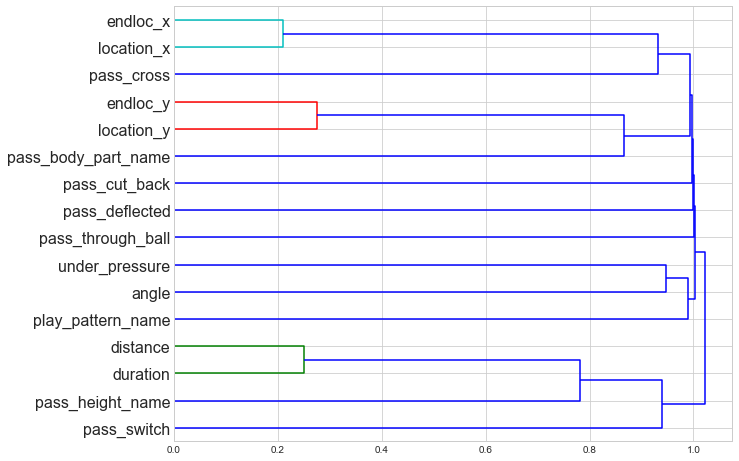

In [87]:
# Make a dendrogram for correlated features
from numpy.random import rand
from numpy.random import seed
import scipy  
from scipy.cluster import hierarchy as hc
seed(42)
copyX = X + rand(*X.shape) / 100000.0
def dendrogram(X):
    corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(10,8))
    dendrogram = hc.dendrogram(z, labels=X.columns, 
          orientation='right', leaf_font_size=16)
    plt.show()
    return
dendrogram(copyX)

In [88]:
# Remove the correlated features and check if the Brier loss reduces.
feats = ['location_x', 'endloc_x',
         'location_y', 'endloc_y',
         'distance', 'duration']
print('original', "{0:.5f}".format(loss))
for feat in feats:
    loss_feats = get_loss(X=X.drop(feat, axis=1))   
    print(feat, "{0:.5f}".format(loss_feats))

original 0.08349
location_x 0.08352
endloc_x 0.08468
location_y 0.08430
endloc_y 0.08890
distance 0.08581
duration 0.08862


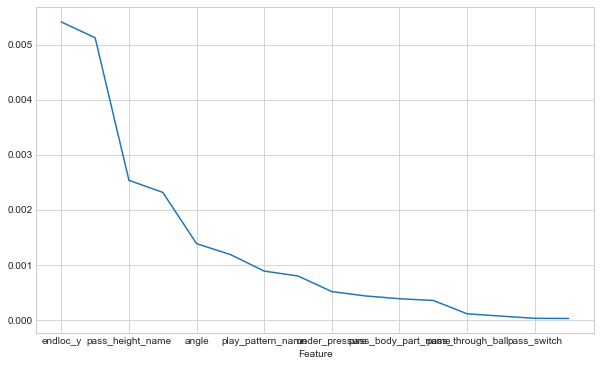

In [89]:
# Feature importance extraction

## Define a function to get feature importance using the drop-column method
def get_imp(X, y=y, m=m, cv=cv):
    baseline = get_loss(X=X, y=y, m=m, cv=cv)
    imp = []
    for col in X.columns:
        s = get_loss(X=X.drop(col, axis=1), y=y, m=m, cv=cv)
        change_in_score = s - baseline
        imp.append(change_in_score)
    imp_df = pd.DataFrame(data={'Feature': X.columns, 'Importance': np.array(imp)})
    imp_df = imp_df.set_index('Feature').sort_values('Importance', ascending=False)
    return imp_df

imp1 = get_imp(X=X)
imp1.reset_index().plot('Feature', 'Importance', figsize=(10,6), legend=False);

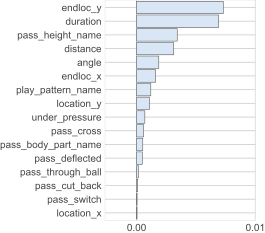

In [90]:
plot_importances(imp1, imp_range=(min(imp1.values), max(imp1.values)))

In [91]:
# Drop the least 3 important features and check Brier loss again.
X2 = X.drop(['location_x','pass_cut_back','pass_switch'], axis=1)
loss2 = get_loss(X=X2)
print('Brier loss:', "{0:.5f}".format(loss2))

Brier loss: 0.08320


In [92]:
# Improvement !! Ok...now do a train-test split. Then use an XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, shuffle=True, stratify=y, random_state=42)

In [93]:
%%time

xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='brier_score_loss')
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: 0.08034
CPU times: user 22.5 s, sys: 149 ms, total: 22.7 s
Wall time: 21.7 s


In [94]:
# Do a grid search for the best choice of parameters.

## Create the parameter grid
# # Define function to print the results of the grid search
def print_gs_results(gs, print_all=True):
    if print_all == True:
        print('Grid scores:')
        means = gs.cv_results_['mean_test_score']*-1
        stds = gs.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, gs.cv_results_['params']):
            print("%0.5f (+/-%0.05f) for %r"
                  % (mean, std * 2, params))
        print()
        print('Best:', "{0:.5f}".format(gs.best_score_*-1),'using %s' % gs.best_params_)
    else:
        print('Best:', "{0:.5f}".format(gs.best_score_*-1),'using %s' % gs.best_params_)
    return

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_depth': [i for i in range(3, 5)],
}

## Create the randomised grid search model
## See http://scikit-learn.sourceforge.net/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html
## "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=20, cv=cv, random_state=42, n_jobs=-1,
                         scoring='brier_score_loss', return_train_score=True)

# Fit rgs
rgs.fit(X_train, y_train)

# Print results
print_gs_results(gs=rgs, print_all=False)

Best: 0.07912 using {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.3}


In [95]:
# Some tests of the model

## Define a function to help fit models and print the results
def print_results(xgb, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Fit model
    xgb.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

    # Print results
    print('Actual passes:', sum(y_test))
    print('Predicted passes (xgb):', '{0:.2f}'.format(sum(y_pred_proba_xgb)))
    print('Brier loss (xgb):', '{0:.5f}'.format(brier_score_loss(y_test, y_pred_proba_xgb)))
    return

# Evaluate best models on the hold-out set
best_xgb = rgs.best_estimator_

print_results(xgb=best_xgb)
print_results(xgb=xgb)

Actual passes: 9415.0
Predicted passes (xgb): 9376.12
Brier loss (xgb): 0.07536
Actual passes: 9415.0
Predicted passes (xgb): 9388.38
Brier loss (xgb): 0.07703


In [96]:
calibrated_xgb = CalibratedClassifierCV(rgs.best_estimator_, cv=cv, method='sigmoid')
print_results(xgb=calibrated_xgb)

Actual passes: 9415.0
Predicted passes (xgb): 9374.71
Brier loss (xgb): 0.07647


In [98]:
filename = 'final_model.sav'
pickle.dump(best_xgb, open(filename, 'wb'))

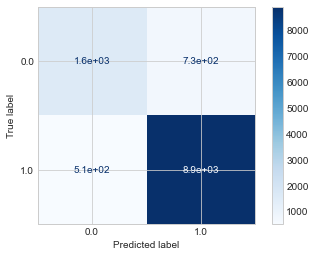

In [100]:
plot_confusion_matrix(best_xgb, X_test, y_test, cmap=plt.cm.Blues)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

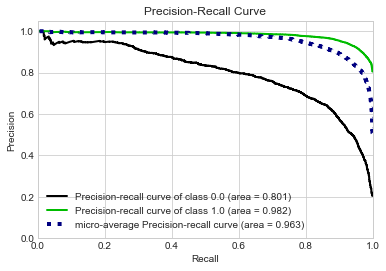

In [102]:
skplt.metrics.plot_precision_recall(y_test, calibrated_xgb.predict_proba(X_test))

In [103]:
len(X2),len(passes)

(58677, 58677)

In [104]:
# Fit the model to the entire dataset
best_xgb.fit(X2, y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [105]:
pass_final['xp'] = best_xgb.predict_proba(X2)[:,1]
pass_final['name'] = passes['player_name']
pass_final

,duration,angle,pass_body_part_name,location_x,location_y,endloc_x,endloc_y,pass_cross,pass_cut_back,pass_deflected,pass_height_name,distance,pass_switch,pass_through_ball,play_pattern_name,under_pressure,success,xp,name
3,2.960,0.418224,Right Foot,36.0,40.0,90.0,16.0,0,0,0,High Pass,59.093156,0,0,From Kick Off,0,0.0,0.178090,Abdullah Ibrahim Otayf
5,3.000,0.393451,Right Foot,39.0,36.0,92.0,58.0,0,0,0,High Pass,57.384676,0,0,From Kick Off,0,0.0,0.100032,Sergei Ignashevich
7,1.879,0.785397,NaN,38.0,68.0,45.0,75.0,0,0,0,High Pass,9.899502,0,0,From Kick Off,1,0.0,0.152248,Ilya Kutepov
8,1.200,0.000000,Left Foot,76.0,6.0,91.0,6.0,0,0,0,High Pass,15.000010,0,0,From Kick Off,0,1.0,0.501722,Salman Mohammed Al Faraj
9,1.373,0.244979,Head,29.0,23.0,45.0,27.0,0,0,0,High Pass,16.492432,0,0,Regular Play,0,1.0,0.627503,Yasir Gharsan Al Shahrani
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138130,2.400,0.063743,Right Foot,42.0,17.0,89.0,20.0,0,0,0,High Pass,47.095657,0,0,Regular Play,0,0.0,0.268625,Domagoj Vida
138133,2.480,0.474400,Left Foot,31.0,61.0,68.0,80.0,0,0,0,High Pass,41.593278,0,0,Regular Play,0,0.0,0.059521,Raphaël Varane
138136,1.440,0.321750,Right Foot,58.0,14.0,94.0,2.0,0,0,0,Ground Pass,37.947341,0,0,From Throw In,0,1.0,0.927100,Ivan Rakitić
138138,2.600,1.262743,Left Foot,102.0,4.0,116.0,48.0,1,0,0,High Pass,46.173589,1,0,From Throw In,1,0.0,0.095442,Ivan Perišić


In [106]:
# Groupby to get actual and expected pass success
df_sb_events_grouped_pass_completion = pass_final.groupby('name').agg({'duration':'count','success':'sum','xp':'sum'}).reset_index()

df_sb_events_grouped_pass_completion.rename(columns={'duration':'Open Play Passes',
                             'success':'Successful Open Play Passes',
                             'xp':'Expected Pass Success',
                             'name':'player_name'},inplace=True)

df_sb_events_grouped_pass_completion

,player_name,Open Play Passes,Successful Open Play Passes,Expected Pass Success
0,Aaron Mooy,184,155.0,161.915192
1,Abdalla Mahmoud El Said Bekhit,138,105.0,108.786072
2,Abdiel Arroyo Molinar,5,4.0,3.050349
3,Abdullah Ibrahim Al Maiouf,29,13.0,15.958708
4,Abdullah Ibrahim Otayf,252,228.0,224.603424
...,...,...,...,...
595,İlkay Gündoğan,51,47.0,46.452042
596,Łukasz Fabiański,23,16.0,17.056103
597,Łukasz Piszczek,94,63.0,68.658150
598,Łukasz Teodorczyk,8,6.0,5.460523


In [107]:
# Define 'Pass Completed Above Expected'
df_sb_events_grouped_pass_completion['Pass Completed Above Expected'] = df_sb_events_grouped_pass_completion['Successful Open Play Passes']/df_sb_events_grouped_pass_completion['Expected Pass Success']

df_sb_events_grouped_pass_completion

,player_name,Open Play Passes,Successful Open Play Passes,Expected Pass Success,Pass Completed Above Expected
0,Aaron Mooy,184,155.0,161.915192,0.957291
1,Abdalla Mahmoud El Said Bekhit,138,105.0,108.786072,0.965197
2,Abdiel Arroyo Molinar,5,4.0,3.050349,1.311325
3,Abdullah Ibrahim Al Maiouf,29,13.0,15.958708,0.814602
4,Abdullah Ibrahim Otayf,252,228.0,224.603424,1.015123
...,...,...,...,...,...
595,İlkay Gündoğan,51,47.0,46.452042,1.011796
596,Łukasz Fabiański,23,16.0,17.056103,0.938081
597,Łukasz Piszczek,94,63.0,68.658150,0.917590
598,Łukasz Teodorczyk,8,6.0,5.460523,1.098796


---

<a id='section6'></a>

## <a id='#section6'>6. Unify Data for Final Dataset</a>

Derived DataFrames from the original `df_sb_events` DataFrame are:
- `df_sb_player_positions`
- `df_sb_player_minutes`
- `df_sb_events_grouped_passing_carrying_carrying`
- `df_sb_events_grouped_xt`
- `df_sb_events_grouped_xg`
- `df_sb_events_grouped_defending`
- `df_sb_events_grouped_pass_completion`

<a id='section6.0'></a>

### <a id='#section6.0'>6.0. Import Previous Saved Datasets</a>
Temporary step to bring in previously saved DataFrames with correct data (currently a bug in the notebook).

In [423]:
#df_sb_player_positions
#df_sb_player_minutes
#df_sb_market_value
df_sb_events_grouped_passing_carrying_carrying = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_passing.csv')
df_sb_events_grouped_xt = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_xt.csv')
df_sb_events_grouped_xg = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_xg.csv')
df_sb_events_grouped_defending = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_defending.csv')
df_sb_events_grouped_pass_completion = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_pass_completion.csv')

<a id='section6.1'></a>

### <a id='#section6.1'>6.1. Join Datasets</a>

In [ ]:
defenders = df.player_name.unique()
#defenders = df[df.position_name.isin(['Left Center Back','Right Center Back', 'Center Back'])].player_name.unique()
#flagnames = ['Francisco Javier Calvo Quesada','Joshua Kimmich',
#             'Luis Carlos Tejada Hansell',
#             'Michael Lang','Nicolás Alejandro Tagliafico',
#             'Gabriel Iván Mercado','Hörður Björgvin Magnússon','Birkir Már Sævarsson',
#             'Fedor Kudryashov','Éver Maximiliano David Banega','Edson Omar Álvarez Velázquez',
#             'Marcus Rashford', 'İlkay Gündoğan', 'Dylan Bronn']
#defenders = list(set(defenders) - set(flagnames))

defenders

Collecting team open play shots

In [424]:
teams = df[df.player_name.isin(defenders)].team_name.unique()
teamOPSdf = df[(df.team_name.isin(teams))&(df.shot_type_name=='Open Play')].groupby('team_name').agg({'player_name':'count'}).reset_index()
teamOPSdf.rename(columns={'team_name':'team','player_name':'Open Play Shots'},inplace=True)
teamOPSdf

,team,Open Play Shots
0,Argentina,52
1,Australia,30
2,Belgium,103
3,Brazil,101
4,Colombia,38
5,Costa Rica,27
6,Croatia,107
7,Denmark,38
8,Egypt,30
9,England,86


Combine the separate, aggregrated DataFrames into a single dataframe.

In [607]:
# Join the Matches DataFrame to the Events DataFrame
df_sb_events_grouped_combined = pd.merge(df_sb_player_minutes, df_sb_player_positions, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_market_value, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_passing_carrying_carrying, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_xt, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_xg, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_defending, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_pass_completion, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = df_sb_events_grouped_combined.sort_values(['player_name', 'team_name', 'mins_total'], ascending=[True, True, True])
df_sb_events_grouped_combined.head()

,player_name,mins_total,team_name,primary_position_name,primary_position_name_grouped,outfielder_goalkeeper,age,dob,pob,cob,second_citizenship,current_club,current_club_country,height,foot,market_value_euros,market_value_pounds,joined,age_when_joining,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,Successful Passes,Successful Open Play Passes_x,Successful Long Passes,Successful Final Third Passes,Successful Under Pressure Passes,Successful Progressive Passes,Total Pass Length,Carries,Carry Distance,Final Third Entries,Progressive Moves,Passes Success %,Open Play Passes Success %,Long Passes Success %,Under Pressure Passes Success %,Progressive Passes Success %,PPF,CPF,xT,xT Facilitated,xGBuildup,xGChain,team,Padj_Defensive Acts,Turnovers,Aerial Challenges,Aerial Win %,True Tackle Win%,Padj_Pressures,Padj_Successful Pressures,Dribbles,Padj_Tackles and Interceptions,Tack/DP %,Open Play Passes,Successful Open Play Passes_y,Expected Pass Success,Pass Completed Above Expected
198,Aaron Mooy,267,Australia,Left Center Midfield,Midfield,Outfielder,30.0,1990-09-15,Sydney,Australia,Netherlands,shanghai port,china,174.0,right,8500000.0,7650000.0,2020-09-01,29.0,0.0,2023-07-31,2.0,NaN,NaN,NaN,NaN,ICM Stellar Sports,168,146,20,12,44,21,4119.687152,136,806.365384,15,23,81.553398,87.951807,50.000000,91.666667,50.000000,0.361447,0.409857,1.383681,0.139509,0.585616,1.158689,Australia,37.441565,3,2,16.666667,23.148148,52.806865,8.384650,1,6.828258,27.777778,184,155.0,161.915190,0.957291
259,Abdalla Mahmoud El Said Bekhit,230,Egypt,Center Attacking Midfield,Midfield,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,100,9,12,32,15,2683.655368,88,556.268219,19,19,76.870748,77.519380,47.368421,80.000000,44.117647,0.411817,0.558888,0.766249,0.390763,0.677549,0.824822,Egypt,14.222637,6,7,40.000000,27.777778,46.533785,6.577041,0,3.050130,33.333333,138,105.0,108.786070,0.965197
575,Abdiel Arroyo Molinar,11,Panama,Left Center Midfield,Midfield,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,1,0,3,2,115.952544,3,28.077687,0,2,83.333333,80.000000,50.000000,75.000000,66.666667,0.474814,0.896784,0.273524,0.004789,0.063533,0.239129,Panama,2.151531,1,2,50.000000,16.666667,4.545831,0.000000,1,1.075766,25.000000,5,4.0,3.050349,1.311325
471,Abdullah Ibrahim Al Maiouf,84,Saudi Arabia,Goalkeeper,Goalkeeper,Goalkeeper,34.0,1987-01-23,Al-Riyadh,Saudi Arabia,NaN,al-hilal riyadh,saudi arabia,187.0,right,100000.0,90000.0,2016-07-12,29.0,5.0,2023-06-30,1.0,NaN,NaN,NaN,NaN,NaN,15,10,9,0,1,6,1973.003456,19,89.902562,0,6,42.857143,41.666667,31.034483,50.000000,23.076923,0.726195,0.655843,0.047125,0.013178,0.030863,0.030863,Saudi Arabia,5.848469,0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,29,13.0,15.958708,0.814602
242,Abdullah Ibrahim Otayf,246,Saudi Arabia,Center Defensive Midfield,Midfield,Outfielder,28.0,1992-08-03,NaN,Saudi Arabia,NaN,al-hilal riyadh,saudi arabia,177.0,right,500000.0,450000.0,2013-02-11,20.0,8.0,2023-06-30,1.0,NaN,NaN,NaN,NaN,NaN,233,213,24,25,49,15,4571.793110,219,1081.211689,33,17,90.661479,91.810345,68.571429,89.090909,60.000000,0.330431,0.478650,0.419859,0.472333,0.316491,0.340030,Saudi Arabia,41.242734,7,1,0.000000,25.000000,60.619547,19.205832,4,16.235016,22.222222,252,228.0,224.603420,1.015123


In [609]:
df_sb_events_grouped_combined[df_sb_events_grouped_combined['player_name'] == 'Harry Maguire']

,player_name,mins_total,team_name,primary_position_name,primary_position_name_grouped,outfielder_goalkeeper,age,dob,pob,cob,second_citizenship,current_club,current_club_country,height,foot,market_value_euros,market_value_pounds,joined,age_when_joining,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,Successful Passes,Successful Open Play Passes_x,Successful Long Passes,Successful Final Third Passes,Successful Under Pressure Passes,Successful Progressive Passes,Total Pass Length,Carries,Carry Distance,Final Third Entries,Progressive Moves,Passes Success %,Open Play Passes Success %,Long Passes Success %,Under Pressure Passes Success %,Progressive Passes Success %,PPF,CPF,xT,xT Facilitated,xGBuildup,xGChain,team,Padj_Defensive Acts,Turnovers,Aerial Challenges,Aerial Win %,True Tackle Win%,Padj_Pressures,Padj_Successful Pressures,Dribbles,Padj_Tackles and Interceptions,Tack/DP %,Open Play Passes,Successful Open Play Passes_y,Expected Pass Success,Pass Completed Above Expected
2,Harry Maguire,653,England,Left Center Back,Defender,Outfielder,28.0,1993-03-05,Sheffield,England,NaN,manchester united,england,194.0,right,50000000.0,45000000.0,2019-08-05,26.0,1.0,2025-06-30,3.0,Option for a further year,NaN,NaN,NaN,Triple S Sports,381,335,53,23,64,32,8693.521261,335,2145.273274,40,52,87.788018,92.286501,74.647887,80.0,60.377358,0.3694,0.538604,1.243528,0.824355,1.84191,2.357932,England,72.362245,7,34,90.816327,31.428571,48.5278,13.210241,5,14.437891,7.142857,424,372.0,363.06793,1.024602


In [610]:
df_sb_player_positions.shape

(600, 5)

In [611]:
df_sb_events_grouped_combined.shape

(600, 64)

In [621]:
#df_sb_player_positions
#df_sb_player_minutes
df_sb_events_grouped_passing_carrying_carrying = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_passing.csv')
df_sb_events_grouped_xt = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_xt.csv')
df_sb_events_grouped_xg = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_xg.csv')
df_sb_events_grouped_defending = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_defending.csv')
df_sb_events_grouped_pass_completion = pd.read_csv(data_dir_sb + '/engineered/combined/wc2018/' + 'sb_events_grouped_pass_completion.csv')

In [622]:
df_sb_events_grouped_passing_carrying_carrying = df_sb_events_grouped_passing_carrying_carrying[df_sb_events_grouped_passing_carrying_carrying.player_name.isin(defenders)]
df_sb_events_grouped_passing_carrying_carrying['Final Third Entries'] = df_sb_events_grouped_passing_carrying_carrying['Successful Final Third Passes'] + df_sb_events_grouped_passing_carrying_carrying['Final Third Carries']
df_sb_events_grouped_passing_carrying_carrying['Progressive Moves'] = df_sb_events_grouped_passing_carrying_carrying['Successful Progressive Passes'] + df_sb_events_grouped_passing_carrying_carrying['Progressive Carries']

cols = ['Passes',
        'Successful Passes',
        'Open Play Passes',
        'Successful Open Play Passes',
        'Long Passes',
        'Successful Long Passes',
        'Successful Final Third Passes',
        'Under Pressure Passes',
        'Successful Under Pressure Passes',
        'Progressive Passes',
        'Successful Progressive Passes',
        'Total Pass Length', 'Carries',
        'Pass Progressive Distance',
        'Carry Distance',
        'Carry Progressive Distance',
        'Final Third Entries',
        'Progressive Moves'
       ]

df_sb_events_grouped_passing_carrying_carrying = df_sb_events_grouped_passing_carrying_carrying[['player_name']+cols]

for c in ['Successful Passes','Successful Open Play Passes','Successful Long Passes','Successful Under Pressure Passes',
          'Successful Progressive Passes']:
    if 'Successful' in c:
        cplayer_name = ' '.join(c.split(' ')[1:])
        df_sb_events_grouped_passing_carrying_carrying[cplayer_name+' Success %'] = df_sb_events_grouped_passing_carrying_carrying[c]*100/df_sb_events_grouped_passing_carrying_carrying[cplayer_name]
        df_sb_events_grouped_passing_carrying_carrying = df_sb_events_grouped_passing_carrying_carrying.drop(columns=cplayer_name)

df_sb_events_grouped_passing_carrying_carrying['PPF'] = df_sb_events_grouped_passing_carrying_carrying['Pass Progressive Distance']/df_sb_events_grouped_passing_carrying_carrying['Total Pass Length']
df_sb_events_grouped_passing_carrying_carrying['CPF'] = df_sb_events_grouped_passing_carrying_carrying['Carry Progressive Distance']/df_sb_events_grouped_passing_carrying_carrying['Carry Distance']
df_sb_events_grouped_passing_carrying_carrying = df_sb_events_grouped_passing_carrying_carrying.drop(columns=['Pass Progressive Distance','Carry Progressive Distance'])
df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(df_sb_events_grouped_passing_carrying_carrying[df_sb_events_grouped_passing_carrying_carrying.player_name.isin(defenders)],how='left')
df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(teamOPSdf,how='left')
# df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(passangles,how='left')
# df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(ppassangles,how='left')
df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(xpdf,how='left')
df_sb_events_grouped_combined['Successful Passes and Carries'] = df_sb_events_grouped_combined['Successful Passes'] + df_sb_events_grouped_combined['Carries']

for cols in ['xT', 'xT Facilitated']:
    df_sb_events_grouped_combined[cols] = df_sb_events_grouped_combined[cols]*100/df_sb_events_grouped_combined['Successful Passes and Carries']

for cols in ['xGBuildup', 'xGChain']:
    df_sb_events_grouped_combined[cols] = df_sb_events_grouped_combined[cols]*10/df_sb_events_grouped_combined['Open Play Shots']

per90cols = ['Padj_Defensive Acts',
             'Turnovers',
             'Aerial Challenges',
             'Dribbles',
             'Padj_Pressures',
             'Padj_Successful Pressures',
             'Successful Passes',
             'Successful Long Passes',
             'Successful Final Third Passes',
             'Successful Under Pressure Passes',
             'Successful Progressive Passes',
             'Total Pass Length',
             'Carries',
             'Carry Distance',
             'Final Third Entries',
            #'Progressive Passes',
            #'Progressive Carries',
             'Progressive Moves',
             'Successful Passes',
             'Successful Open Play Passes',
             'Successful Carries',
             'Successful Progressive Carries',
             'Successful Passes and Carries',
            ]

for col in per90cols:
    df_sb_events_grouped_combined[col] = df_sb_events_grouped_combined[col]/df_sb_events_grouped_combined['mins_total']*90
    df_sb_events_grouped_combined[col+'_p90'] = df_sb_events_grouped_combined[col]

df_sb_events_grouped_combined.drop(columns='Open Play Shots',inplace=True)
df_sb_events_grouped_combined['Turnovers per 100 Touches'] = df_sb_events_grouped_combined['Turnovers']*100/(df_sb_events_grouped_combined['Carries'] + df_sb_events_grouped_combined['Dribbles'])

for c in df_sb_events_grouped_combined.columns.tolist()[3:]:
    df_sb_events_grouped_combined['Percentile '+c] = df_sb_events_grouped_combined[c].rank(pct = True)

df_sb_events_grouped_combined.head()

KeyError: 'Successful Carries'

In [ ]:
# Temporary step: Importing an previously saved version
#df_sb_events_grouped_combined = pd.read_csv(data_dir + '/sb/engineered/combined/wc2018/' + 'sb_wc2018_events_agg_all.csv')

In [432]:
len(df_sb_events_grouped_combined)

600

<a id='section6.3'></a>

### <a id='#section6.3'>6.3. Rename Columns</a>
Final cleaning of dataset by renaming the columns

In [433]:
df_sb_events_grouped_combined.head()

,player_name,mins_total,team_name,primary_position_name,Passes,Successful Passes,Open Play Passes_x,Successful Open Play Passes_x,Short Passes,Successful Short Passes,Medium Passes,Successful Medium Passes,Long Passes,Successful Long Passes,Final Third Passes,Successful Final Third Passes,Penalty Area Passes,Successful Penalty Area Passes,Under Pressure Passes,Successful Under Pressure Passes,Throughballs,Successful Throughballs,Switches,Successful Switches,Crosses,Successful Crosses,Penalty Area Crosses,Successful Penalty Area Crosses,Progressive Passes,Successful Progressive Passes,Total Pass Length,Pass Progressive Distance,Carries,Successful Carries,Final Third Carries,Successful Final Third Carries,Progressive Carries,Successful Progressive Carries,Carry Distance,Carry Progressive Distance,xT,xT Facilitated,xGBuildup,xGChain,team,Padj_Defensive Acts,Turnovers,Aerial Challenges,Aerial Win %,True Tackle Win%,Padj_Pressures,Padj_Successful Pressures,Dribbles,Padj_Tackles and Interceptions,Tack/DP %,Open Play Passes_y,Successful Open Play Passes_y,Expected Pass Success,Pass Completed Above Expected,Successful Open Play Passes,Final Third Entries,Progressive Moves,Passes Success %,Open Play Passes Success %,Long Passes Success %,Under Pressure Passes Success %,Progressive Passes Success %,PPF,CPF,Open Play Passes,Successful Passes and Carries,Padj_Defensive Acts_p90,Turnovers_p90,Aerial Challenges_p90,Dribbles_p90,Padj_Pressures_p90,Padj_Successful Pressures_p90,Successful Passes_p90,Successful Long Passes_p90,Successful Final Third Passes_p90,Successful Under Pressure Passes_p90,Successful Progressive Passes_p90,Total Pass Length_p90,Carries_p90,Carry Distance_p90,Final Third Entries_p90,Progressive Passes_p90,Progressive Carries_p90,Progressive Moves_p90,Successful Open Play Passes_p90,Successful Carries_p90,Successful Progressive Carries_p90,Successful Passes and Carries_p90,Turnovers per 100 Touches,Percentile primary_position_name,Percentile Passes,Percentile Successful Passes,Percentile Open Play Passes_x,Percentile Successful Open Play Passes_x,Percentile Short Passes,Percentile Successful Short Passes,Percentile Medium Passes,Percentile Successful Medium Passes,Percentile Long Passes,Percentile Successful Long Passes,Percentile Final Third Passes,Percentile Successful Final Third Passes,Percentile Penalty Area Passes,Percentile Successful Penalty Area Passes,Percentile Under Pressure Passes,Percentile Successful Under Pressure Passes,Percentile Throughballs,Percentile Successful Throughballs,Percentile Switches,Percentile Successful Switches,Percentile Crosses,Percentile Successful Crosses,Percentile Penalty Area Crosses,Percentile Successful Penalty Area Crosses,Percentile Progressive Passes,Percentile Successful Progressive Passes,Percentile Total Pass Length,Percentile Pass Progressive Distance,Percentile Carries,Percentile Successful Carries,Percentile Final Third Carries,Percentile Successful Final Third Carries,Percentile Progressive Carries,Percentile Successful Progressive Carries,Percentile Carry Distance,Percentile Carry Progressive Distance,Percentile xT,Percentile xT Facilitated,Percentile xGBuildup,Percentile xGChain,Percentile team,Percentile Padj_Defensive Acts,Percentile Turnovers,Percentile Aerial Challenges,Percentile Aerial Win %,Percentile True Tackle Win%,Percentile Padj_Pressures,Percentile Padj_Successful Pressures,Percentile Dribbles,Percentile Padj_Tackles and Interceptions,Percentile Tack/DP %,Percentile Open Play Passes_y,Percentile Successful Open Play Passes_y,Percentile Expected Pass Success,Percentile Pass Completed Above Expected,Percentile Successful Open Play Passes,Percentile Final Third Entries,Percentile Progressive Moves,Percentile Passes Success %,Percentile Open Play Passes Success %,Percentile Long Passes Success %,Percentile Under Pressure Passes Success %,Percentile Progressive Passes Success %,Percentile PPF,Percentile CPF,Percentile Open Play Passes,Percentile Successful Pas

In [434]:
df_sb_events_grouped_combined.shape

(600, 185)

In [435]:
df_sb_events_grouped_combined.columns

Index(['player_name', 'mins_total', 'team_name', 'primary_position_name',
       'Passes', 'Successful Passes', 'Open Play Passes_x',
       'Successful Open Play Passes_x', 'Short Passes',
       'Successful Short Passes',
       ...
       'Percentile Carry Distance_p90', 'Percentile Final Third Entries_p90',
       'Percentile Progressive Passes_p90',
       'Percentile Progressive Carries_p90',
       'Percentile Progressive Moves_p90',
       'Percentile Successful Open Play Passes_p90',
       'Percentile Successful Carries_p90',
       'Percentile Successful Progressive Carries_p90',
       'Percentile Successful Passes and Carries_p90',
       'Percentile Turnovers per 100 Touches'],
      dtype='object', length=185)

In [ ]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_sb_events_grouped_combined.dtypes)

In [ ]:
# To add
#age	dob	pob	cob	second_citizenship	current_club	current_club_country	height	foot	market_value_euros	market_value_pounds	joined	age_when_joining	years_since_joining	contract_expires	years_until_contract_expiry	contract_option	on_loan_from	on_loan_from_country	loan_contract_expiry	player_agent

In [436]:
# Rename columns
df_sb_events_grouped_combined = (df_sb_events_grouped_combined
                                     .rename(columns={'player_name': 'player',
                                                      'mins_total': 'mins_total',
                                                      'team_name': 'team',
                                                      'primary_position_name': 'position',
                                                      'Passes': 'passes',
                                                      'Successful Passes': 'completed_passes',
                                                      'Open Play Passes_x': 'open_play_passes',
                                                      'Successful Open Play Passes_x': 'completed_open_play_passes',
                                                      'Short Passes': 'short_passes',
                                                      'Successful Short Passes': 'completed_short_passes',
                                                      'Medium Passes': 'medium_passes',
                                                      'Successful Medium Passes': 'completed_medium_passes',
                                                      'Long Passes': 'long_passes',
                                                      'Successful Long Passes': 'completed_long_passes',
                                                      'Final Third Passes': 'final_third_pass',
                                                      'Successful Final Third Passes': 'completed_final_third_pass',
                                                      'Penalty Area Passes': 'penalty_area_passes',
                                                      'Successful Penalty Area Passes': 'completed_penalty_area_passes',
                                                      'Under Pressure Passes': 'under_pressure_passes',
                                                      'Successful Under Pressure Passes': 'completed_under_pressure_passes',
                                                      'Throughballs': 'throughballs',
                                                      'Successful Throughballs': 'completed_throughballs',
                                                      'Switches': 'switches',
                                                      'Successful Switches': 'completed_switches',
                                                      'Crosses': 'crosses',
                                                      'Successful Crosses': 'completed_crosses',
                                                      'Penalty Area Crosses': 'penalty_area_crosses',
                                                      'Successful Penalty Area Crosses': 'completed_penalty_area_crosses',
                                                      'Progressive Passes': 'progressive_passes',
                                                      'Successful Progressive Passes': 'completed_progressive_passes',
                                                      'Total Pass Length': 'total_pass_distance',
                                                      'Pass Progressive Distance': 'progressive_pass_distance',
                                                      'Carries': 'carries',
                                                      'Successful Carries': 'completed_carries',
                                                      'Final Third Carries': 'final_third_carries',
                                                      'Successful Final Third Carries': 'completed_final_third_carries',
                                                      'Progressive Carries': 'progressive_Carries',
                                                      'Successful Progressive Carries': 'completed_progressive_carries',
                                                      'Carry Distance': 'carry_distance',
                                                      'Carry Progressive Distance': 'progressive_carry_distance',
                                                      'xT': 'xt',
                                                      'xT Facilitated': 'xt_faciliated',
                                                      'xGBuildup': 'xgbuildup',
                                                      'xGChain': 'xgchain',
                                                      'Padj_Defensive Acts': 'padj_defensive_acts',
                                                      'Turnovers': 'turnovers',
                                                      'Aerial Challenges': 'aerial_challenges',
                                                      'Aerial Win %': 'aerial_win_%',
                                                      'True Tackle Win%': 'true_tackle_win_%',
                                                      'Padj_Pressures': 'padj_pressures',
                                                      'Padj_Successful Pressures': 'padj_completed_pressures',
                                                      'Dribbles': 'dribbles',
                                                      'Padj_Tackles and Interceptions': 'padj_tackles_and_interceptions',
                                                      'Tack/DP %': 'tackle/dp_%',
                                                      'Expected Pass Success': 'completed_expected_passes',
                                                      'Pass Completed Above Expected': 'passes_completed_above_expected',
                                                      'Successful Open Play Passes': 'completed_open_play_passes',
                                                      'Final Third Entries': 'final_third_entries',
                                                      'Progressive Moves': 'progressive_moves',
                                                      'Passes Success %': 'completed_passes_%',
                                                      'Open Play Passes Success %': 'completed_open_play_passes_%',
                                                      'Long Passes Success %': 'completed_long_passes_%',
                                                      'Under Pressure Passes Success %': 'completed_under_pressure_passes_%',
                                                      'Progressive Passes Success %': 'completed_progressive_passes_%',
                                                      'PPF': 'ppf',
                                                      'CPF': 'cpf',
                                                      'Open Play Passes': 'open_play_passes',
                                                      'Successful Passes and Carries': 'completed_passes_and_carries',                                         
                                                      'Padj_Defensive Acts_p90': 'padj_defensive_acts_p90',
                                                      'Turnovers_p90': 'turnovers_p90',
                                                      'Aerial Challenges_p90': 'aerial_challenges_p90',
                                                      'Dribbles_p90': 'dribbles_p90',
                                                      'Padj_Pressures_p90': 'padj_presures_p90',
                                                      'Padj_Successful Pressures_p90': 'padj_completed_pressures_p90',
                                                      'Successful Passes_p90': 'completed_passes_p90',
                                                      'Successful Long Passes_p90': 'completed_long_passes_p90',
                                                      'Successful Final Third Passes_p90': 'completed_final_thirdpasses_p90',
                                                      'Successful Under Pressure Passes_p90': 'completed_under_pressure_passes_p90',                                           
                                                      'Successful Progressive Passes_p90': 'completed_progressive_passes_p90',
                                                      'Total Pass Length_p90': 'total_pass_length_p90',
                                                      'Carries_p90': 'carries_p90',                                             
                                                      'Carry Distance_p90': 'carry_distance_p90',
                                                      'Final Third Entries_p90': 'final_third_entries_p90',
                                                      'Progressive Moves_p90': 'progressive_moves_p90',
                                                      'Successful Open Play Passes_p90': 'completed_open_play_passes_p90',
                                                      'Successful Carries_p90': 'completed_carries_p90',
                                                      'Successful Progressive Carries_p90': 'completed_progressive_carries_p90',
                                                      'Successful Passes and Carries_p90': 'completed_passes_and_carries_p90',
                                                      'Turnovers per 100 Touches': 'turnovers_per_100_touches',
                                                      'Percentile primary_position_name': 'percentile_primary_position_name',
                                                      'Percentile Passes': 'percentile_passes',                                                
                                                      'Percentile Successful Passes': 'percentile_completed_passes',
                                                      'Percentile Open Play Passes_x': 'percentile_open_play_Passes',
                                                      'Percentile Successful Open Play Passes_x': 'percentile_completed_open_play_passes',                                             
                                                      'Percentile Short Passes': 'percentile_short_passes',
                                                      'Percentile Successful Short Passes': 'percentile_completed_short_passes',
                                                      'Percentile Medium Passes': 'percentile_medium_passes',
                                                      'Percentile Successful Medium Passes': 'percentile_completed_medium_passes',
                                                      'Percentile Long Passes': 'percentile_long_passes',
                                                      'Percentile Successful Long Passes': 'percentile_completed_long_passes',
                                                      'Percentile Final Third Passes': 'percentile_final_third_passes',
                                                      'Percentile Successful Final Third Passes': 'percentile_completed_final_third_passes',
                                                      'Percentile Penalty Area Passes': 'percentile_penalty_area_passes',
                                                      'Percentile Successful Penalty Area Passes': 'percentile_completed_penalty_area_passes',
                                                      'Percentile Under Pressure Passes': 'percentile_under_pressure_passes',
                                                      'Percentile Successful Under Pressure Passes': 'percentile_completed_under_pressure_passes',
                                                      'Percentile Throughballs': 'percentile_throughballs',
                                                      'Percentile Successful Throughballs': 'percentile_completed_throughballs',
                                                      'Percentile Switches': 'percentile_switches',
                                                      'Percentile Successful Switches': 'percentile_completed_switches',
                                                      'Percentile Crosses': 'percentile_crosses',
                                                      'Percentile Successful Crosses': 'percentile_completes_crosses',
                                                      'Percentile Penalty Area Crosses': 'percentile_penalty_area_crosses',
                                                      'Percentile Successful Penalty Area Crosses': 'percentile_completed_penalty_area_crosses',                                           
                                                      'Percentile Progressive Passes': 'percentile_progressive_passes',
                                                      'Percentile Successful Progressive Passes': 'percentile_completed_progressive_passes',
                                                      'Percentile Total Pass Length': 'percentile_total_pass_length',                                             
                                                      'Percentile Pass Progressive Distance': 'percentile_pass_progressive_distance',
                                                      'Percentile Carries': 'percentile_carries',
                                                      'Percentile Successful Carries': 'percentile_completed_carries',
                                                      'Percentile Final Third Carries': 'percentile_final_third_carries',
                                                      'Percentile Successful Final Third Carries': 'percentile_completed_final_third_Carries',
                                                      'Percentile Progressive Carries': 'percentile_progressive_carries',
                                                      'Percentile Successful Progressive Carries': 'percentile_completed_progressive_carries',
                                                      'Percentile Carry Distance': 'percentile_carry_distance',
                                                      'Percentile Carry Progressive Distance': 'percentile_progressive_carry_distance',
                                                      'Percentile xT': 'percentile_xt',                                                
                                                      'Percentile xT Facilitated': 'percentile_xt_facilitated',
                                                      'Percentile xGBuildup': 'percentile_xgbuildup',
                                                      'Percentile xGChain': 'percentile_xgchain',                                             
                                                      'Percentile team': 'percentile_team',
                                                      'Percentile Padj_Defensive Acts': 'percentile_padj_defensive_acts',
                                                      'Percentile Turnovers': 'percentile_turnovers',
                                                      'Percentile Aerial Challenges': 'percentile_aerial_challenges',
                                                      'Percentile Aerial Win %': 'percentile_aerial_win_%',
                                                      'Percentile True Tackle Win%': 'percentile_true_tackle_win_%',
                                                      'Percentile Padj_Pressures': 'percentile_padj_pressures',
                                                      'Percentile Padj_Successful Pressures': 'percentile_padj_completed_pressures',
                                                      'Percentile Dribbles': 'percentile_dribbles',
                                                      'Percentile Padj_Tackles and Interceptions': 'percentile_padj_tackles_and_interceptions',
                                                      'Percentile Tack/DP %': 'percentile_tack/dp_%',
                                                      'Percentile Open Play Passes_y': 'percentile_',
                                                      'Percentile Successful Open Play Passes_y': 'percentile_completed_open_play_passes',
                                                      'Percentile Expected Pass Success': 'percentile_completed_expected_pass',
                                                      'Percentile Pass Completed Above Expected': 'percentile_pass_completed_above_expected',
                                                      'Percentile Successful Open Play Passes': 'percentile_open_play_passes',
                                                      'Percentile Final Third Entries': 'percentile_final_third_entries',
                                                      'Percentile Progressive Moves': 'percentile_progressive_moves',
                                                      'Percentile Passes Success %': 'percentile_completed_passes_%',
                                                      'Percentile Open Play Passes Success %': 'percentile_completed_open_play_passes_%',                                           
                                                      'Percentile Long Passes Success %': 'percentile_completedlong_passes_%_',
                                                      'Percentile Under Pressure Passes Success %': 'percentile_completed_under_Pressure_passes_%',
                                                      'Percentile Progressive Passes Success %': 'percentile_completed_progressive_passes_%',
                                                      'Percentile PPF': 'percentile_ppf',
                                                      'Percentile CPF': 'percentile_cpf',
                                                      'Percentile Open Play Passes': 'percentile_open_play_passes',
                                                      'Percentile Successful Passes and Carries': 'percentile_completed_passes_and_carries',
                                                      'Percentile Padj_Defensive Acts_p90': 'percentile_padj_defensive_acts_p90',                                                
                                                      'Percentile Turnovers_p90': 'percentile_turnovers_p90',
                                                      'Percentile Aerial Challenges_p90': 'percentile_aerial_challenges_p90',
                                                      'Percentile Dribbles_p90': 'percentile_dribbles_p90',                                             
                                                      'Percentile Padj_Pressures_p90': 'percentile_padj_pressures_p90',
                                                      'Percentile Padj_Successful Pressures_p90': 'percentile_padj_completed_pressures_p90',
                                                      'Percentile Successful Passes_p90': 'percentile_completed_passes_p90',
                                                      'Percentile Successful Long Passes_p90': 'percentile_completed_long_passes_p90',
                                                      'Percentile Successful Final Third Passes_p90': 'percentile_completed_final_third_passes_p90',
                                                      'Percentile Successful Under Pressure Passes_p90': 'percentile_percentile_completed_under_pressure_passes_p90',
                                                      'Percentile Successful Progressive Passes_p90': 'percentile_completed_progressive_passes_p90',
                                                      'Percentile Total Pass Length_p90': 'percentile_total_pass_distance_p90',
                                                      'Percentile Carries_p90': 'percentile_carries_p90',
                                                      'Percentile Carry Distance_p90': 'percentile_carry_distance_p90',
                                                      'Percentile Final Third Entries_p90': 'percentile_final_third_entries_p90',
                                                      'Percentile Progressive Moves_p90': 'percentile_progressive_moves_p90',
                                                      'Percentile Successful Open Play Passes_p90': 'percentile_completed_open_play_passes_p90',
                                                      'Percentile Successful Carries_p90': 'percentile_completed_completed_carries_p90',
                                                      'Percentile Successful Progressive Carries_p90': 'percentile_completed_progressive_carries_p90',
                                                      'Percentile Successful Passes and Carries_p90': 'percentile_completed_passes_and_carries_p90',
                                                      'Percentile Turnovers per 100 Touches': 'percentile_turnovers_per_100_touches'
                                                     }
                                            )
                                )

# Display DataFrame
df_sb_events_grouped_combined.head()

,player,mins_total,team,position,passes,completed_passes,open_play_passes,completed_open_play_passes,short_passes,completed_short_passes,medium_passes,completed_medium_passes,long_passes,completed_long_passes,final_third_pass,completed_final_third_pass,penalty_area_passes,completed_penalty_area_passes,under_pressure_passes,completed_under_pressure_passes,throughballs,completed_throughballs,switches,completed_switches,crosses,completed_crosses,penalty_area_crosses,completed_penalty_area_crosses,progressive_passes,completed_progressive_passes,total_pass_distance,progressive_pass_distance,carries,completed_carries,final_third_carries,completed_final_third_carries,progressive_Carries,completed_progressive_carries,carry_distance,progressive_carry_distance,xt,xt_faciliated,xgbuildup,xgchain,team,padj_defensive_acts,turnovers,aerial_challenges,aerial_win_%,true_tackle_win_%,padj_pressures,padj_completed_pressures,dribbles,padj_tackles_and_interceptions,tackle/dp_%,Open Play Passes_y,Successful Open Play Passes_y,completed_expected_passes,passes_completed_above_expected,completed_open_play_passes,final_third_entries,progressive_moves,completed_passes_%,completed_open_play_passes_%,completed_long_passes_%,completed_under_pressure_passes_%,completed_progressive_passes_%,ppf,cpf,open_play_passes,completed_passes_and_carries,padj_defensive_acts_p90,turnovers_p90,aerial_challenges_p90,dribbles_p90,padj_presures_p90,padj_completed_pressures_p90,completed_passes_p90,completed_long_passes_p90,completed_final_thirdpasses_p90,completed_under_pressure_passes_p90,completed_progressive_passes_p90,total_pass_length_p90,carries_p90,carry_distance_p90,final_third_entries_p90,Progressive Passes_p90,Progressive Carries_p90,progressive_moves_p90,completed_open_play_passes_p90,completed_carries_p90,completed_progressive_carries_p90,completed_passes_and_carries_p90,turnovers_per_100_touches,percentile_primary_position_name,percentile_passes,percentile_completed_passes,percentile_open_play_Passes,percentile_completed_open_play_passes,percentile_short_passes,percentile_completed_short_passes,percentile_medium_passes,percentile_completed_medium_passes,percentile_long_passes,percentile_completed_long_passes,percentile_final_third_passes,percentile_completed_final_third_passes,percentile_penalty_area_passes,percentile_completed_penalty_area_passes,percentile_under_pressure_passes,percentile_completed_under_pressure_passes,percentile_throughballs,percentile_completed_throughballs,percentile_switches,percentile_completed_switches,percentile_crosses,percentile_completes_crosses,percentile_penalty_area_crosses,percentile_completed_penalty_area_crosses,percentile_progressive_passes,percentile_completed_progressive_passes,percentile_total_pass_length,percentile_pass_progressive_distance,percentile_carries,percentile_completed_carries,percentile_final_third_carries,percentile_completed_final_third_Carries,percentile_progressive_carries,percentile_completed_progressive_carries,percentile_carry_distance,percentile_progressive_carry_distance,percentile_xt,percentile_xt_facilitated,percentile_xgbuildup,percentile_xgchain,percentile_team,percentile_padj_defensive_acts,percentile_turnovers,percentile_aerial_challenges,percentile_aerial_win_%,percentile_true_tackle_win_%,percentile_padj_pressures,percentile_padj_completed_pressures,percentile_dribbles,percentile_padj_tackles_and_interceptions,percentile_tack/dp_%,percentile_,percentile_completed_open_play_passes,percentile_completed_expected_pass,percentile_pass_completed_above_expected,percentile_open_play_passes,percentile_final_third_entries,percentile_progressive_moves,percentile_completed_passes_%,percentile_completed_open_play_passes_%,percentile_completedlong_passes_%_,percentile_completed_under_Pressure_passes_%,percentile_completed_progressive_passes_%,percentile_ppf,percentile_cpf,percentile_open_play_passes,percentile_completed_passes_and_carries,percentile_padj_defensive_acts_p90,percentile_turnovers_p90,percent

In [437]:
# Drop columns
df_sb_events_grouped_combined = (df_sb_events_grouped_combined
                                     .drop(['Open Play Passes_y',
                                            'Successful Open Play Passes_y',
                                            'percentile_team'
                                           ], axis=1
                                          )
                                )

# Display DataFrame
df_sb_events_grouped_combined.head()

,player,mins_total,team,position,passes,completed_passes,open_play_passes,completed_open_play_passes,short_passes,completed_short_passes,medium_passes,completed_medium_passes,long_passes,completed_long_passes,final_third_pass,completed_final_third_pass,penalty_area_passes,completed_penalty_area_passes,under_pressure_passes,completed_under_pressure_passes,throughballs,completed_throughballs,switches,completed_switches,crosses,completed_crosses,penalty_area_crosses,completed_penalty_area_crosses,progressive_passes,completed_progressive_passes,total_pass_distance,progressive_pass_distance,carries,completed_carries,final_third_carries,completed_final_third_carries,progressive_Carries,completed_progressive_carries,carry_distance,progressive_carry_distance,xt,xt_faciliated,xgbuildup,xgchain,team,padj_defensive_acts,turnovers,aerial_challenges,aerial_win_%,true_tackle_win_%,padj_pressures,padj_completed_pressures,dribbles,padj_tackles_and_interceptions,tackle/dp_%,completed_expected_passes,passes_completed_above_expected,completed_open_play_passes,final_third_entries,progressive_moves,completed_passes_%,completed_open_play_passes_%,completed_long_passes_%,completed_under_pressure_passes_%,completed_progressive_passes_%,ppf,cpf,open_play_passes,completed_passes_and_carries,padj_defensive_acts_p90,turnovers_p90,aerial_challenges_p90,dribbles_p90,padj_presures_p90,padj_completed_pressures_p90,completed_passes_p90,completed_long_passes_p90,completed_final_thirdpasses_p90,completed_under_pressure_passes_p90,completed_progressive_passes_p90,total_pass_length_p90,carries_p90,carry_distance_p90,final_third_entries_p90,Progressive Passes_p90,Progressive Carries_p90,progressive_moves_p90,completed_open_play_passes_p90,completed_carries_p90,completed_progressive_carries_p90,completed_passes_and_carries_p90,turnovers_per_100_touches,percentile_primary_position_name,percentile_passes,percentile_completed_passes,percentile_open_play_Passes,percentile_completed_open_play_passes,percentile_short_passes,percentile_completed_short_passes,percentile_medium_passes,percentile_completed_medium_passes,percentile_long_passes,percentile_completed_long_passes,percentile_final_third_passes,percentile_completed_final_third_passes,percentile_penalty_area_passes,percentile_completed_penalty_area_passes,percentile_under_pressure_passes,percentile_completed_under_pressure_passes,percentile_throughballs,percentile_completed_throughballs,percentile_switches,percentile_completed_switches,percentile_crosses,percentile_completes_crosses,percentile_penalty_area_crosses,percentile_completed_penalty_area_crosses,percentile_progressive_passes,percentile_completed_progressive_passes,percentile_total_pass_length,percentile_pass_progressive_distance,percentile_carries,percentile_completed_carries,percentile_final_third_carries,percentile_completed_final_third_Carries,percentile_progressive_carries,percentile_completed_progressive_carries,percentile_carry_distance,percentile_progressive_carry_distance,percentile_xt,percentile_xt_facilitated,percentile_xgbuildup,percentile_xgchain,percentile_padj_defensive_acts,percentile_turnovers,percentile_aerial_challenges,percentile_aerial_win_%,percentile_true_tackle_win_%,percentile_padj_pressures,percentile_padj_completed_pressures,percentile_dribbles,percentile_padj_tackles_and_interceptions,percentile_tack/dp_%,percentile_,percentile_completed_open_play_passes,percentile_completed_expected_pass,percentile_pass_completed_above_expected,percentile_open_play_passes,percentile_final_third_entries,percentile_progressive_moves,percentile_completed_passes_%,percentile_completed_open_play_passes_%,percentile_completedlong_passes_%_,percentile_completed_under_Pressure_passes_%,percentile_completed_progressive_passes_%,percentile_ppf,percentile_cpf,percentile_open_play_passes,percentile_completed_passes_and_carries,percentile_padj_defensive_acts_p90,percentile_turnovers_p90,percentile_aerial_challenges_p90,percentile_dribbles_p90,percentile_padj

<a id='section6.2'></a>

### <a id='#section6.2'>6.2. Filter for Center Backs</a>
Filter for only defenders

In [438]:
#F ilter for Center Backs
df_sb_events_grouped_combined_center_backs = df_sb_events_grouped_combined[(df_sb_events_grouped_combined['position'] == 'Left Center Back') | (df_sb_events_grouped_combined['position'] == 'Center Back') | (df_sb_events_grouped_combined['position'] == 'Right Center Back')]

# Display DataFrame
df_sb_events_grouped_combined_center_backs.head()

,player,mins_total,team,position,passes,completed_passes,open_play_passes,completed_open_play_passes,short_passes,completed_short_passes,medium_passes,completed_medium_passes,long_passes,completed_long_passes,final_third_pass,completed_final_third_pass,penalty_area_passes,completed_penalty_area_passes,under_pressure_passes,completed_under_pressure_passes,throughballs,completed_throughballs,switches,completed_switches,crosses,completed_crosses,penalty_area_crosses,completed_penalty_area_crosses,progressive_passes,completed_progressive_passes,total_pass_distance,progressive_pass_distance,carries,completed_carries,final_third_carries,completed_final_third_carries,progressive_Carries,completed_progressive_carries,carry_distance,progressive_carry_distance,xt,xt_faciliated,xgbuildup,xgchain,team,padj_defensive_acts,turnovers,aerial_challenges,aerial_win_%,true_tackle_win_%,padj_pressures,padj_completed_pressures,dribbles,padj_tackles_and_interceptions,tackle/dp_%,completed_expected_passes,passes_completed_above_expected,completed_open_play_passes,final_third_entries,progressive_moves,completed_passes_%,completed_open_play_passes_%,completed_long_passes_%,completed_under_pressure_passes_%,completed_progressive_passes_%,ppf,cpf,open_play_passes,completed_passes_and_carries,padj_defensive_acts_p90,turnovers_p90,aerial_challenges_p90,dribbles_p90,padj_presures_p90,padj_completed_pressures_p90,completed_passes_p90,completed_long_passes_p90,completed_final_thirdpasses_p90,completed_under_pressure_passes_p90,completed_progressive_passes_p90,total_pass_length_p90,carries_p90,carry_distance_p90,final_third_entries_p90,Progressive Passes_p90,Progressive Carries_p90,progressive_moves_p90,completed_open_play_passes_p90,completed_carries_p90,completed_progressive_carries_p90,completed_passes_and_carries_p90,turnovers_per_100_touches,percentile_primary_position_name,percentile_passes,percentile_completed_passes,percentile_open_play_Passes,percentile_completed_open_play_passes,percentile_short_passes,percentile_completed_short_passes,percentile_medium_passes,percentile_completed_medium_passes,percentile_long_passes,percentile_completed_long_passes,percentile_final_third_passes,percentile_completed_final_third_passes,percentile_penalty_area_passes,percentile_completed_penalty_area_passes,percentile_under_pressure_passes,percentile_completed_under_pressure_passes,percentile_throughballs,percentile_completed_throughballs,percentile_switches,percentile_completed_switches,percentile_crosses,percentile_completes_crosses,percentile_penalty_area_crosses,percentile_completed_penalty_area_crosses,percentile_progressive_passes,percentile_completed_progressive_passes,percentile_total_pass_length,percentile_pass_progressive_distance,percentile_carries,percentile_completed_carries,percentile_final_third_carries,percentile_completed_final_third_Carries,percentile_progressive_carries,percentile_completed_progressive_carries,percentile_carry_distance,percentile_progressive_carry_distance,percentile_xt,percentile_xt_facilitated,percentile_xgbuildup,percentile_xgchain,percentile_padj_defensive_acts,percentile_turnovers,percentile_aerial_challenges,percentile_aerial_win_%,percentile_true_tackle_win_%,percentile_padj_pressures,percentile_padj_completed_pressures,percentile_dribbles,percentile_padj_tackles_and_interceptions,percentile_tack/dp_%,percentile_,percentile_completed_open_play_passes,percentile_completed_expected_pass,percentile_pass_completed_above_expected,percentile_open_play_passes,percentile_final_third_entries,percentile_progressive_moves,percentile_completed_passes_%,percentile_completed_open_play_passes_%,percentile_completedlong_passes_%_,percentile_completed_under_Pressure_passes_%,percentile_completed_progressive_passes_%,percentile_ppf,percentile_cpf,percentile_open_play_passes,percentile_completed_passes_and_carries,percentile_padj_defensive_acts_p90,percentile_turnovers_p90,percentile_aerial_challenges_p90,percentile_dribbles_p90,percentile_padj

In [439]:
len(df_sb_events_grouped_combined_defenders)

102

---

<a id='section7'></a>

## <a id='#section7'>7. Export Final DataFrames</a>

In [440]:
# Export DataFrames
df_sb_events.to_csv(data_dir + '/export/' + '/sb_wc2018_events.csv', index=None, header=True)
df_sb_events_grouped_combined.to_csv(data_dir + '/export/' + '/sb_wc2018_events_agg_all.csv', index=None, header=True)
df_sb_events_grouped_combined_center_backs.to_csv(data_dir + '/export/' + '/sb_wc2018_events_agg_center_backs.csv', index=None, header=True)

---

<a id='section8'></a>

## <a id='#section8'>8. Subset DataFrames</a>
The following code creates DataFrames for additional Tableau visualisation that are not the focus of this task submission, but are included for reference and may be used if there is sufficient time.

These DataFrames include bespoke datasets for the following visualisations:
- Radar
- Passing Matrix
- Passing Network

### <a id='#section8.1'>8.1. Radar Data</a>

In [548]:
df_sb_radar = df_sb_events_grouped_combined

In [549]:
df_sb_radar.head()

,player,mins_total,team,position,passes,completed_passes,open_play_passes,completed_open_play_passes,short_passes,completed_short_passes,medium_passes,completed_medium_passes,long_passes,completed_long_passes,final_third_pass,completed_final_third_pass,penalty_area_passes,completed_penalty_area_passes,under_pressure_passes,completed_under_pressure_passes,throughballs,completed_throughballs,switches,completed_switches,crosses,completed_crosses,penalty_area_crosses,completed_penalty_area_crosses,progressive_passes,completed_progressive_passes,total_pass_distance,progressive_pass_distance,carries,completed_carries,final_third_carries,completed_final_third_carries,progressive_Carries,completed_progressive_carries,carry_distance,progressive_carry_distance,xt,xt_faciliated,xgbuildup,xgchain,team,padj_defensive_acts,turnovers,aerial_challenges,aerial_win_%,true_tackle_win_%,padj_pressures,padj_completed_pressures,dribbles,padj_tackles_and_interceptions,tackle/dp_%,completed_expected_passes,passes_completed_above_expected,completed_open_play_passes,final_third_entries,progressive_moves,completed_passes_%,completed_open_play_passes_%,completed_long_passes_%,completed_under_pressure_passes_%,completed_progressive_passes_%,ppf,cpf,open_play_passes,completed_passes_and_carries,padj_defensive_acts_p90,turnovers_p90,aerial_challenges_p90,dribbles_p90,padj_presures_p90,padj_completed_pressures_p90,completed_passes_p90,completed_long_passes_p90,completed_final_thirdpasses_p90,completed_under_pressure_passes_p90,completed_progressive_passes_p90,total_pass_length_p90,carries_p90,carry_distance_p90,final_third_entries_p90,Progressive Passes_p90,Progressive Carries_p90,progressive_moves_p90,completed_open_play_passes_p90,completed_carries_p90,completed_progressive_carries_p90,completed_passes_and_carries_p90,turnovers_per_100_touches,percentile_primary_position_name,percentile_passes,percentile_completed_passes,percentile_open_play_Passes,percentile_completed_open_play_passes,percentile_short_passes,percentile_completed_short_passes,percentile_medium_passes,percentile_completed_medium_passes,percentile_long_passes,percentile_completed_long_passes,percentile_final_third_passes,percentile_completed_final_third_passes,percentile_penalty_area_passes,percentile_completed_penalty_area_passes,percentile_under_pressure_passes,percentile_completed_under_pressure_passes,percentile_throughballs,percentile_completed_throughballs,percentile_switches,percentile_completed_switches,percentile_crosses,percentile_completes_crosses,percentile_penalty_area_crosses,percentile_completed_penalty_area_crosses,percentile_progressive_passes,percentile_completed_progressive_passes,percentile_total_pass_length,percentile_pass_progressive_distance,percentile_carries,percentile_completed_carries,percentile_final_third_carries,percentile_completed_final_third_Carries,percentile_progressive_carries,percentile_completed_progressive_carries,percentile_carry_distance,percentile_progressive_carry_distance,percentile_xt,percentile_xt_facilitated,percentile_xgbuildup,percentile_xgchain,percentile_padj_defensive_acts,percentile_turnovers,percentile_aerial_challenges,percentile_aerial_win_%,percentile_true_tackle_win_%,percentile_padj_pressures,percentile_padj_completed_pressures,percentile_dribbles,percentile_padj_tackles_and_interceptions,percentile_tack/dp_%,percentile_,percentile_completed_open_play_passes,percentile_completed_expected_pass,percentile_pass_completed_above_expected,percentile_open_play_passes,percentile_final_third_entries,percentile_progressive_moves,percentile_completed_passes_%,percentile_completed_open_play_passes_%,percentile_completedlong_passes_%_,percentile_completed_under_Pressure_passes_%,percentile_completed_progressive_passes_%,percentile_ppf,percentile_cpf,percentile_open_play_passes,percentile_completed_passes_and_carries,percentile_padj_defensive_acts_p90,percentile_turnovers_p90,percentile_aerial_challenges_p90,percentile_dribbles_p90,percentile_padj

#### Filter for Center Backs¶

In [550]:
# Filter for Center Backs
df_sb_radar = df_sb_radar[(df_sb_radar['position'] == 'Left Center Back') | (df_sb_radar['position'] == 'Center Back') | (df_sb_radar['position'] == 'Right Center Back')]

#### Determine Min and Max of Selected Attributes

In [551]:
#

## Min
min_completed_op_passes_p90 = df_sb_radar['completed_open_play_passes_p90'].min()
min_completed_progressive_passes_p90 = df_sb_radar['completed_progressive_passes_p90'].min()
min_completed_pass_percentage_completion = df_sb_radar['completed_passes_%'].min()
min_completed_pressure_pass_percentage_completion = df_sb_radar['completed_under_pressure_passes_%'].min()
min_completed_carries_p90 = df_sb_radar['completed_carries_p90'].min()
min_completed_progressive_carries_p90 = df_sb_radar['completed_progressive_carries_p90'].min()
min_carry_distance_p90 = df_sb_radar['carry_distance_p90'].min()
min_xgbuildup = df_sb_radar['xgbuildup'].min()
min_xt = df_sb_radar['xt'].min()
min_padj_tackles_and_interceptions = df_sb_radar['padj_tackles_and_interceptions'].min()
min_tack_dp_percentage_completion = df_sb_radar['tackle/dp_%'].min()
min_aerial_win_percentage_completion = df_sb_radar['aerial_win_%'].min()

## Max
max_completed_op_passes_p90 = df_sb_radar['completed_open_play_passes_p90'].max()
max_completed_progressive_passes_p90 = df_sb_radar['completed_progressive_passes_p90'].max()
max_completed_pass_percentage_completion = df_sb_radar['completed_passes_%'].max()
max_completed_pressure_pass_percentage_completion = df_sb_radar['completed_under_pressure_passes_%'].max()
max_completed_carries_p90 = df_sb_radar['completed_carries_p90'].max()
max_completed_progressive_carries_p90 = df_sb_radar['completed_progressive_carries_p90'].max()
max_carry_distance_p90 = df_sb_radar['carry_distance_p90'].max()
max_xgbuildup = df_sb_radar['xgbuildup'].max()
max_xt = df_sb_radar['xt'].max()
max_padj_tackles_and_interceptions = df_sb_radar['padj_tackles_and_interceptions'].max()
max_tack_dp_percentage_completion = df_sb_radar['tackle/dp_%'].max()
max_aerial_win_percentage_completion = df_sb_radar['aerial_win_%'].max()

## Manual Max Changes - for normalisation
# max_completed_op_passes_p90 = 102.857
# max_completed_carries_p90 = 123.75
# max_carry_distance_p90 = 1574.36


"""
## All custom max - not used
max_completed_op_passes_p90 = 25.0
max_completed_pass_percentage_completion = 100.0
max_completed_pressure_pass_percentage_completion = 100.0
max_completed_carries_p90 = 100.0
max_completed_progressive_carries_p90 = 50.0
max_carry_distance_p90 = 850.0
max_xgbuildup = 0.5 
max_xt = 4.0
max_padj_tackles_and_interceptions = 40.0
max_tack_dp_percentage_completion = 100.0
max_aerial_win_percentage_completion = 100.0
"""

'\n## All custom max - not used\nmax_completed_op_passes_p90 = 25.0\nmax_completed_pass_percentage_completion = 100.0\nmax_completed_pressure_pass_percentage_completion = 100.0\nmax_completed_carries_p90 = 100.0\nmax_completed_progressive_carries_p90 = 50.0\nmax_carry_distance_p90 = 850.0\nmax_xgbuildup = 0.5 \nmax_xt = 4.0\nmax_padj_tackles_and_interceptions = 40.0\nmax_tack_dp_percentage_completion = 100.0\nmax_aerial_win_percentage_completion = 100.0\n'

In [552]:
## Print statements
print(f'completed_op_passes_p90 is {min_completed_op_passes_p90:.1f} and the maximum value is {max_completed_op_passes_p90:.1f}')
print(f'completed_pass_% is {min_completed_pass_percentage_completion:.1f} and the maximum value is {max_completed_pass_percentage_completion:.1f}')
print(f'completed_pressure_pass_% is {min_completed_pressure_pass_percentage_completion:.1f} and the maximum value is {max_completed_pressure_pass_percentage_completion:.1f}')
print(f'completed_carries_p90 is {min_completed_carries_p90:.1f} and the maximum value is {max_completed_carries_p90:.1f}')
print(f'completed_progressive_carries_p90 is {min_completed_progressive_carries_p90:.1f} and the maximum value is {max_completed_progressive_carries_p90:.1f}')
print(f'carry_distance_p90 is {min_carry_distance_p90:.1f} and the maximum value is {max_carry_distance_p90:.1f}')
print(f'xgbuildup is {min_xgbuildup:.1f} and the maximum value is {max_xgbuildup:.1f}')
print(f'xt is {min_xt:.1f} and the maximum value is {max_xt:.1f}')
print(f'padj_tackles_and_interceptions is {min_padj_tackles_and_interceptions:.1f} and the maximum value is {max_padj_tackles_and_interceptions:.1f}')
print(f'tack_dp_percentage_completion is {min_tack_dp_percentage_completion:.1f} and the maximum value is {max_tack_dp_percentage_completion:.1f}')
print(f'aerial_win_percentage_completion is {min_aerial_win_percentage_completion:.1f} and the maximum value is {max_aerial_win_percentage_completion:.1f}')

completed_op_passes_p90 is 9.2 and the maximum value is 97.4
completed_pass_% is 56.0 and the maximum value is 100.0
completed_pressure_pass_% is 25.0 and the maximum value is 100.0
completed_carries_p90 is 6.1 and the maximum value is 87.4
completed_progressive_carries_p90 is 0.0 and the maximum value is 11.1
carry_distance_p90 is 57.3 and the maximum value is 830.7
xgbuildup is 0.0 and the maximum value is 0.5
xt is -0.1 and the maximum value is 0.7
padj_tackles_and_interceptions is 0.0 and the maximum value is 23.5
tack_dp_percentage_completion is 0.0 and the maximum value is 100.0
aerial_win_percentage_completion is 0.0 and the maximum value is 100.0


#### Determine Normalise Columns

In [553]:
# Normalise columns
df_sb_radar['completed_open_play_passes_p90_normalised'] = df_sb_radar['completed_open_play_passes_p90'].apply(lambda x: (x - min_completed_op_passes_p90) / (max_completed_op_passes_p90 - min_completed_op_passes_p90))
df_sb_radar['completed_progressive_passes_p90_normalised'] = df_sb_radar['completed_progressive_passes_p90'].apply(lambda x: (x - min_completed_progressive_passes_p90) / (max_completed_progressive_passes_p90 - min_completed_progressive_passes_p90))
df_sb_radar['completed_passes_%_normalised'] = df_sb_radar['completed_passes_%'].apply(lambda x: (x - min_completed_pass_percentage_completion) / (max_completed_pass_percentage_completion - min_completed_pass_percentage_completion))
df_sb_radar['completed_under_pressure_passes_%_normalised'] = df_sb_radar['completed_under_pressure_passes_%'].apply(lambda x: (x - min_completed_pressure_pass_percentage_completion) / (max_completed_pressure_pass_percentage_completion - min_completed_pressure_pass_percentage_completion))
df_sb_radar['completed_carries_p90_normalised'] = df_sb_radar['completed_carries_p90'].apply(lambda x: (x - min_completed_carries_p90) / (max_completed_carries_p90 - min_completed_carries_p90))
df_sb_radar['completed_progressive_carries_p90_normalised'] = df_sb_radar['completed_progressive_carries_p90'].apply(lambda x: (x - min_completed_progressive_carries_p90) / (max_completed_progressive_carries_p90 - min_completed_progressive_carries_p90))
df_sb_radar['carry_distance_p90_normalised'] = df_sb_radar['carry_distance_p90'].apply(lambda x: (x - min_carry_distance_p90) / (max_carry_distance_p90 - min_carry_distance_p90))
df_sb_radar['xgbuildup_normalised'] = df_sb_radar['xgbuildup'].apply(lambda x: (x - min_xgbuildup) / (max_xgbuildup - min_xgbuildup))
df_sb_radar['xt_normalised'] = df_sb_radar['xt'].apply(lambda x: (x - min_xt) / (max_xt - min_xt))
df_sb_radar['padj_tackles_and_interceptions_normalised'] = df_sb_radar['padj_tackles_and_interceptions'].apply(lambda x: (x - min_padj_tackles_and_interceptions) / (max_padj_tackles_and_interceptions - min_padj_tackles_and_interceptions))
df_sb_radar['tackle/dp_%_normalised'] = df_sb_radar['tackle/dp_%'].apply(lambda x: (x - min_tack_dp_percentage_completion) / (max_tack_dp_percentage_completion - min_tack_dp_percentage_completion))
df_sb_radar['aerial_win_%_normalised'] = df_sb_radar['aerial_win_%'].apply(lambda x: (x - min_aerial_win_percentage_completion) / (max_aerial_win_percentage_completion - min_aerial_win_percentage_completion))

In [554]:
df_sb_radar[df_sb_radar['player'] == 'Sergio Ramos García']

,player,mins_total,team,position,passes,completed_passes,open_play_passes,completed_open_play_passes,short_passes,completed_short_passes,medium_passes,completed_medium_passes,long_passes,completed_long_passes,final_third_pass,completed_final_third_pass,penalty_area_passes,completed_penalty_area_passes,under_pressure_passes,completed_under_pressure_passes,throughballs,completed_throughballs,switches,completed_switches,crosses,completed_crosses,penalty_area_crosses,completed_penalty_area_crosses,progressive_passes,completed_progressive_passes,total_pass_distance,progressive_pass_distance,carries,completed_carries,final_third_carries,completed_final_third_carries,progressive_Carries,completed_progressive_carries,carry_distance,progressive_carry_distance,xt,xt_faciliated,xgbuildup,xgchain,team,padj_defensive_acts,turnovers,aerial_challenges,aerial_win_%,true_tackle_win_%,padj_pressures,padj_completed_pressures,dribbles,padj_tackles_and_interceptions,tackle/dp_%,completed_expected_passes,passes_completed_above_expected,completed_open_play_passes,final_third_entries,progressive_moves,completed_passes_%,completed_open_play_passes_%,completed_long_passes_%,completed_under_pressure_passes_%,completed_progressive_passes_%,ppf,cpf,open_play_passes,completed_passes_and_carries,padj_defensive_acts_p90,turnovers_p90,aerial_challenges_p90,dribbles_p90,padj_presures_p90,padj_completed_pressures_p90,completed_passes_p90,completed_long_passes_p90,completed_final_thirdpasses_p90,completed_under_pressure_passes_p90,completed_progressive_passes_p90,total_pass_length_p90,carries_p90,carry_distance_p90,final_third_entries_p90,Progressive Passes_p90,Progressive Carries_p90,progressive_moves_p90,completed_open_play_passes_p90,completed_carries_p90,completed_progressive_carries_p90,completed_passes_and_carries_p90,turnovers_per_100_touches,percentile_primary_position_name,percentile_passes,percentile_completed_passes,percentile_open_play_Passes,percentile_completed_open_play_passes,percentile_short_passes,percentile_completed_short_passes,percentile_medium_passes,percentile_completed_medium_passes,percentile_long_passes,percentile_completed_long_passes,percentile_final_third_passes,percentile_completed_final_third_passes,percentile_penalty_area_passes,percentile_completed_penalty_area_passes,percentile_under_pressure_passes,percentile_completed_under_pressure_passes,percentile_throughballs,percentile_completed_throughballs,percentile_switches,percentile_completed_switches,percentile_crosses,percentile_completes_crosses,percentile_penalty_area_crosses,percentile_completed_penalty_area_crosses,percentile_progressive_passes,percentile_completed_progressive_passes,percentile_total_pass_length,percentile_pass_progressive_distance,percentile_carries,percentile_completed_carries,percentile_final_third_carries,percentile_completed_final_third_Carries,percentile_progressive_carries,percentile_completed_progressive_carries,percentile_carry_distance,percentile_progressive_carry_distance,percentile_xt,percentile_xt_facilitated,percentile_xgbuildup,percentile_xgchain,percentile_padj_defensive_acts,percentile_turnovers,percentile_aerial_challenges,percentile_aerial_win_%,percentile_true_tackle_win_%,percentile_padj_pressures,percentile_padj_completed_pressures,percentile_dribbles,percentile_padj_tackles_and_interceptions,percentile_tack/dp_%,percentile_,percentile_completed_open_play_passes,percentile_completed_expected_pass,percentile_pass_completed_above_expected,percentile_open_play_passes,percentile_final_third_entries,percentile_progressive_moves,percentile_completed_passes_%,percentile_completed_open_play_passes_%,percentile_completedlong_passes_%_,percentile_completed_under_Pressure_passes_%,percentile_completed_progressive_passes_%,percentile_ppf,percentile_cpf,percentile_open_play_passes,percentile_completed_passes_and_carries,percentile_padj_defensive_acts_p90,percentile_turnovers_p90,percentile_aerial_challenges_p90,percentile_dribbles_p90,percentile_padj

#### Select Columns of Interest

In [555]:
#

## Define columns
cols = ['player',
        'mins_total',
        'team',
        'position',
        'completed_open_play_passes_p90', 
        'completed_progressive_passes_p90',
        'completed_passes_%',
        'completed_under_pressure_passes_%',
        'completed_carries_p90',
        'completed_progressive_carries_p90',
        'carry_distance_p90',
        'xgbuildup',
        'xt',
        'padj_tackles_and_interceptions',
        'tackle/dp_%',
        'aerial_win_%',
        'completed_open_play_passes_p90_normalised', 
        'completed_progressive_passes_p90_normalised',
        'completed_passes_%_normalised',
        'completed_under_pressure_passes_%_normalised',
        'completed_carries_p90_normalised',
        'completed_progressive_carries_p90_normalised',
        'carry_distance_p90_normalised',
        'xgbuildup_normalised',
        'xt_normalised',
        'padj_tackles_and_interceptions_normalised',
        'tackle/dp_%_normalised',
        'aerial_win_%_normalised'
       ]

## Select columns of interest
df_sb_radar_select = df_sb_radar[cols]

## Drop duplicate column (duplicate 'team', temporary solution, needs to be moved up)
df_sb_radar_select = df_sb_radar_select.loc[:,~df_sb_radar_select.columns.duplicated()]

## 
df_sb_radar_select.head()

,player,mins_total,team,position,completed_open_play_passes_p90,completed_progressive_passes_p90,completed_passes_%,completed_under_pressure_passes_%,completed_carries_p90,completed_progressive_carries_p90,carry_distance_p90,xgbuildup,xt,padj_tackles_and_interceptions,tackle/dp_%,aerial_win_%,completed_open_play_passes_p90_normalised,completed_progressive_passes_p90_normalised,completed_passes_%_normalised,completed_under_pressure_passes_%_normalised,completed_carries_p90_normalised,completed_progressive_carries_p90_normalised,carry_distance_p90_normalised,xgbuildup_normalised,xt_normalised,padj_tackles_and_interceptions_normalised,tackle/dp_%_normalised,aerial_win_%_normalised
13,Ahmed Hegazi,277,Egypt,Left Center Back,26.967509,3.574007,74.400000,65.217391,29.891697,0.32491,196.933056,0.110213,0.106962,6.713979,66.666667,33.333333,0.201474,0.261177,0.418182,0.536232,0.292438,0.029397,0.180569,0.214937,0.275965,0.285850,0.666667,0.333333
18,Alberto Junior Rodríguez Valdelomar,134,Peru,Left Center Back,26.194030,1.343284,87.500000,80.000000,24.179104,0.00000,152.364618,0.049507,0.104927,2.199336,0.000000,40.000000,0.192701,0.098163,0.715909,0.733333,0.222114,0.000000,0.122946,0.096547,0.273324,0.093638,0.000000,0.400000
30,Ali Albulayhi,93,Saudi Arabia,Left Center Back,30.967742,1.935484,85.714286,66.666667,30.967742,0.00000,204.493313,0.011709,0.112546,4.595540,50.000000,0.000000,0.246846,0.141439,0.675325,0.555556,0.305684,0.000000,0.190344,0.022834,0.283213,0.195657,0.500000,0.000000
31,Ali Gabr,273,Egypt,Right Center Back,19.120879,1.318681,75.609756,56.250000,17.142857,0.00000,71.724537,0.079345,0.063684,2.891181,50.000000,44.444444,0.112474,0.096365,0.445676,0.416667,0.135494,0.000000,0.018686,0.154737,0.219789,0.123093,0.500000,0.444444
38,Anderson Santamaría Bardales,141,Peru,Left Center Back,41.489362,1.276596,93.243243,71.428571,38.936170,0.00000,211.371551,0.067963,0.074805,3.282186,33.333333,16.666667,0.366186,0.093290,0.846437,0.619048,0.403779,0.000000,0.199236,0.132540,0.234225,0.139740,0.333333,0.166667


#### Melt DataFrame

In [556]:
df_sb_radar_melt = pd.melt(df_sb_radar_select, id_vars=['player', 'mins_total', 'team', 'position'], var_name='attribute_name', value_name='value')

In [557]:
df_sb_radar_melt.head()

,player,mins_total,team,position,attribute_name,value
0,Ahmed Hegazi,277,Egypt,Left Center Back,completed_open_play_passes_p90,26.967509
1,Alberto Junior Rodríguez Valdelomar,134,Peru,Left Center Back,completed_open_play_passes_p90,26.194030
2,Ali Albulayhi,93,Saudi Arabia,Left Center Back,completed_open_play_passes_p90,30.967742
3,Ali Gabr,273,Egypt,Right Center Back,completed_open_play_passes_p90,19.120879
4,Anderson Santamaría Bardales,141,Peru,Left Center Back,completed_open_play_passes_p90,41.489362


In [558]:
df_sb_radar_melt.shape

(2448, 6)

In [559]:
df_sb_radar.shape

(102, 194)

#### Export Final Dataset

In [560]:
# Export DataFrames
df_sb_radar_melt.to_csv(data_dir + '/export/' + '/sb_wc2018_events_agg_all_long.csv', index=None, header=True)

### <a id='#section8.2'>8.2. Passing Matrix Data</a>

##### Copy the Events DataFrame

In [335]:
df1 = df_sb_events.copy()

##### Isolate In-Play Events
Remove Non-Event rows to only include player's actions i.e. removing line ups, halves, etc.

In [336]:
# List unique values in the df_sb['type.name'] column
df1['type_name'].unique()

array(['Pass'], dtype=object)

In [337]:
lst_events = ['Pass', 'Ball Receipt*', 'Carry', 'Duel', 'Miscontrol', 'Pressure', 'Ball Recovery', 'Dribbled Past', 'Dribble', 'Shot', 'Block', 'Goal Keeper', 'Clearance', 'Dispossessed', 'Foul Committed', 'Foul Won', 'Interception', 'Shield', 'Half End', 'Substitution', 'Tactical Shift', 'Injury Stoppage', 'Player Off', 'Player On', 'Offside', 'Referee Ball-Drop', 'Error']

In [338]:
df1= df1[df1['type_name'].isin(lst_events)]

In [339]:
df1['df_name'] = 'df1'

In [340]:
df2 = df_sb_events.copy()

In [341]:
df2['df_name'] = 'df2'

##### Concatanate DataFrames

In [342]:
df_sb_events_passing = pd.concat([df1, df2])

In [343]:
df_sb_events_passing.shape

(117354, 236)

##### ...

In [359]:
df_sb_events_passing['Pass_X'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_x'], df_sb_events_passing['pass_end_location_x'])
df_sb_events_passing['Pass_Y'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_y'], df_sb_events_passing['pass_end_location_y'])
df_sb_events_passing['Carry_X'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_x'], df_sb_events_passing['carry_end_location_x'])
df_sb_events_passing['Carry_Y'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_y'], df_sb_events_passing['carry_end_location_y'])

##### Export Dataset

In [360]:
# Export 
#df_sb_events_passing.to_csv(data_dir_sb + '/events/engineered/' + '/sb_wc2018_events_passing_matrix.csv', index=None, header=True)

# Export 
df_sb_events_passing.to_csv(data_dir + '/export/' + '/sb_wc2018_events_passing_matrix.csv', index=None, header=True)

### <a id='#section8.3'>8.3. Create Passing Network Data</a>

See: https://community.tableau.com/s/question/0D54T00000C6YbE/football-passing-network

In [361]:
df_sb_pass_network = df_sb_events_passing.copy()

In [362]:
df_sb_pass_network = df_sb_pass_network[df_sb_pass_network['type_name'] == 'Pass']

In [363]:
df_sb_pass_network['player_recipient'] = np.where(df_sb_pass_network['df_name'] == 'df1', df_sb_pass_network['player_name'], df_sb_pass_network['pass_recipient_name'])

In [364]:
df_sb_pass_network.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,under_pressure,carry_end_location,pass_outcome_id,pass_outcome_name,pass_aerial_won,duel_type_id,duel_type_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_technique_id,goalkeeper_technique_name,shot_first_time,counterpress,foul_committed_offensive,foul_won_defensive,pass_cross,goalkeeper_end_location,clearance_aerial_won,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_deflected,block_offensive,block_deflection,dribble_overrun,pass_shot_assist,interception_outcome_id,interception_outcome_name,miscontrol_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,shot_aerial_won,pass_backheel,50_50_outcome_id,50_50_outcome_name,ball_recovery_offensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_type_id,foul_committed_type_name,pass_through_ball,pass_technique_id,pass_technique_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,match_id,pass_cut_back,injury_stoppage_in_chain,shot_one_on_one,block_save_block,pass_miscommunication,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,shot_deflected,shot_redirect,shot_follows_dribble,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available,Full_Fixture_Date,position_name_grouped,outfielder_goalkeeper,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y,Team,Opponent,next_event,previous_event,next_team_possession,previous_team_possession,possession_retained,endloc_x,endloc_y,dist1,dist2,diffdist,Passes,Successful Passes,Short Passes,Successful Short Passes,Medium Passes,Successful Medium Passes,Long Passes,Successful Long Passes,Final Third Passes,Successful Final Third Passes,Penalty Area Passes,Successful Penalty Area Passes,Under Pressure Passes,Successful Under Pressure Passes,Throughballs,Successful Throughballs,Switches,Successful Switches,Crosses,Successful Crosses,Penalty Area Crosses,Successful Penalty Area Crosses,Progressive Passes,Successful Progressive Passes,Pass Progressive Distance,Carries,Final Third Carries,Progressive Carries,Carry Distance,C

In [366]:
sorted(df_sb_pass_network.columns)

['50_50_outcome_id',
 '50_50_outcome_name',
 'Carries',
 'Carry Distance',
 'Carry Progressive Distance',
 'Carry_X',
 'Carry_Y',
 'Crosses',
 'Final Third Carries',
 'Final Third Passes',
 'Full_Fixture_Date',
 'Long Passes',
 'Medium Passes',
 'Opponent',
 'Pass Progressive Distance',
 'Pass_X',
 'Pass_Y',
 'Passes',
 'Penalty Area Crosses',
 'Penalty Area Passes',
 'Progressive Carries',
 'Progressive Passes',
 'Short Passes',
 'Successful Crosses',
 'Successful Final Third Passes',
 'Successful Long Passes',
 'Successful Medium Passes',
 'Successful Passes',
 'Successful Penalty Area Crosses',
 'Successful Penalty Area Passes',
 'Successful Progressive Passes',
 'Successful Short Passes',
 'Successful Switches',
 'Successful Throughballs',
 'Successful Under Pressure Passes',
 'Switches',
 'Team',
 'Throughballs',
 'Under Pressure Passes',
 'away_score',
 'away_team_away_team_gender',
 'away_team_away_team_group',
 'away_team_away_team_id',
 'away_team_away_team_name',
 'away_team_

In [367]:
df_sb_pass_network.shape

(117354, 241)

In [379]:
# Select columns of interest

## Define columns
cols = ['df_name',
        'id',
        'index',
        'competition_name',
        'season_name',
        'match_date',
        'kick_off',
        'Full_Fixture_Date',
        'Team',
        'Opponent',
        'home_team_home_team_name',
        'away_team_away_team_name',
        'home_score',
        'away_score',
        'player_recipient',
        'player_name',
        'pass_recipient_name',
        'position_id',
        'position_name',
        'type_name',
        'pass_type_name',
        'pass_outcome_name',
        'location_x',
        'location_y', 
        'pass_end_location_x',
        'pass_end_location_y', 
        'carry_end_location_x',
        'carry_end_location_y',
        'Pass_X',
        'Pass_Y',
        'Carry_X',
        'Carry_Y'
       ]

##
df_sb_pass_network_select = df_sb_pass_network[cols]

In [380]:
df_sb_pass_network_select['pass_to_from'] = df_sb_pass_network_select['player_name'] + ' - ' + df_sb_pass_network_select['pass_recipient_name']

In [381]:
# List unique values in the df_sb_pass_network_select['pass.outcome.name'] column
df_sb_pass_network_select['pass_outcome_name'].unique()

array(['Incomplete', nan, 'Out', 'Unknown', 'Pass Offside',
       'Injury Clearance'], dtype=object)

In [382]:
df_sb_pass_network_select = df_sb_pass_network_select[df_sb_pass_network_select['pass_outcome_name'].isnull()]

In [383]:
df_sb_pass_network_select.shape

(94144, 33)

In [384]:
df_sb_pass_network_select = df_sb_pass_network_select.sort_values(['season_name', 'match_date', 'kick_off', 'Full_Fixture_Date', 'index', 'id', 'df_name'], ascending=[True, True, True, True, True, True, True])

In [385]:
df_sb_pass_network_select['Pass_X'] = df_sb_pass_network_select['Pass_X'].astype(str).astype(float)
df_sb_pass_network_select['Pass_Y'] = df_sb_pass_network_select['Pass_Y'].astype(str).astype(float)
df_sb_pass_network_select['Carry_X'] = df_sb_pass_network_select['Carry_X'].astype(str).astype(float)
df_sb_pass_network_select['Carry_Y'] = df_sb_pass_network_select['Carry_Y'].astype(str).astype(float)
df_sb_pass_network_select['location_x'] = df_sb_pass_network_select['location_x'].astype(str).astype(float)
df_sb_pass_network_select['location_y'] = df_sb_pass_network_select['location_y'].astype(str).astype(float)
df_sb_pass_network_select['pass_end_location_x'] = df_sb_pass_network_select['pass_end_location_x'].astype(str).astype(float)
df_sb_pass_network_select['pass_end_location_y'] = df_sb_pass_network_select['pass_end_location_y'].astype(str).astype(float)
df_sb_pass_network_select['carry_end_location_x'] = df_sb_pass_network_select['carry_end_location_x'].astype(str).astype(float)
df_sb_pass_network_select['carry_end_location_y'] = df_sb_pass_network_select['carry_end_location_y'].astype(str).astype(float)

In [386]:
df_sb_pass_network_select.dtypes

df_name                      object
id                           object
index                         int64
competition_name             object
season_name                   int64
match_date                   object
kick_off                     object
Full_Fixture_Date            object
Team                         object
Opponent                     object
home_team_home_team_name     object
away_team_away_team_name     object
home_score                    int64
away_score                    int64
player_recipient             object
player_name                  object
pass_recipient_name          object
position_id                 float64
position_name                object
type_name                    object
pass_type_name               object
pass_outcome_name            object
location_x                  float64
location_y                  float64
pass_end_location_x         float64
pass_end_location_y         float64
carry_end_location_x        float64
carry_end_location_y        

In [387]:
df_sb_pass_network_select.head()

,df_name,id,index,competition_name,season_name,match_date,kick_off,Full_Fixture_Date,Team,Opponent,home_team_home_team_name,away_team_away_team_name,home_score,away_score,player_recipient,player_name,pass_recipient_name,position_id,position_name,type_name,pass_type_name,pass_outcome_name,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,Pass_X,Pass_Y,Carry_X,Carry_Y,pass_to_from
8,df1,eedccd29-1635-4d8c-96d9-2d9639ce40a2,12,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Saudi Arabia,Russia,Russia,Saudi Arabia,5,0,Salman Mohammed Al Faraj,Salman Mohammed Al Faraj,Salem Mohammed Al Dawsari,15.0,Left Center Midfield,Pass,Recovery,NaN,76.0,6.0,91.0,6.0,NaN,NaN,76.0,6.0,76.0,6.0,Salman Mohammed Al Faraj - Salem Mohammed Al D...
8,df2,eedccd29-1635-4d8c-96d9-2d9639ce40a2,12,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Saudi Arabia,Russia,Russia,Saudi Arabia,5,0,Salem Mohammed Al Dawsari,Salman Mohammed Al Faraj,Salem Mohammed Al Dawsari,15.0,Left Center Midfield,Pass,Recovery,NaN,76.0,6.0,91.0,6.0,NaN,NaN,91.0,6.0,NaN,NaN,Salman Mohammed Al Faraj - Salem Mohammed Al D...
12,df1,32d4e496-0a1d-43df-a431-416fb0ccdb32,15,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Saudi Arabia,Russia,Russia,Saudi Arabia,5,0,Salem Mohammed Al Dawsari,Salem Mohammed Al Dawsari,Salman Mohammed Al Faraj,16.0,Left Midfield,Pass,NaN,NaN,91.0,8.0,104.0,3.0,NaN,NaN,91.0,8.0,91.0,8.0,Salem Mohammed Al Dawsari - Salman Mohammed Al...
12,df2,32d4e496-0a1d-43df-a431-416fb0ccdb32,15,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Saudi Arabia,Russia,Russia,Saudi Arabia,5,0,Salman Mohammed Al Faraj,Salem Mohammed Al Dawsari,Salman Mohammed Al Faraj,16.0,Left Midfield,Pass,NaN,NaN,91.0,8.0,104.0,3.0,NaN,NaN,104.0,3.0,NaN,NaN,Salem Mohammed Al Dawsari - Salman Mohammed Al...
16,df1,98982a06-3bf7-4dae-87f5-7b6f21b72975,19,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Saudi Arabia,Russia,Russia,Saudi Arabia,5,0,Salman Mohammed Al Faraj,Salman Mohammed Al Faraj,Yasir Gharsan Al Shahrani,15.0,Left Center Midfield,Pass,NaN,NaN,107.0,20.0,105.0,16.0,NaN,NaN,107.0,20.0,107.0,20.0,Salman Mohammed Al Faraj - Yasir Gharsan Al Sh...


In [388]:
#

##
df_sb_pass_network_grouped = (df_sb_pass_network_select
                                  .groupby(['competition_name',
                                            'season_name',
                                            'match_date',
                                            'kick_off',
                                            'Full_Fixture_Date',
                                            'Team',
                                            'Opponent',
                                            'home_team_home_team_name',
                                            'away_team_away_team_name',
                                            'home_score',
                                            'away_score',
                                            'pass_to_from',
                                            'player_name',
                                            'pass_recipient_name',
                                            'player_recipient'
                                           ])
                                  .agg({'pass_to_from': ['count']
                                       })
                             )

##
df_sb_pass_network_grouped.columns = df_sb_pass_network_grouped.columns.droplevel(level=0)

##
df_sb_pass_network_grouped = df_sb_pass_network_grouped.reset_index()

## 
df_sb_pass_network_grouped.columns = ['competition_name',
                                      'season_name',
                                      'match_date',
                                      'kick_off',
                                      'full_fixture_date',
                                      'team',
                                      'opponent',
                                      'home_team_name',
                                      'away_team_name',
                                      'home_score',
                                      'away_score',
                                      'pass_to_from',
                                      'player_name',
                                      'pass_recipient_name',
                                      'player_recipient',
                                      'count_passes',
                                     ]

##
#df_sb_pass_network_grouped['count_passes'] = df_sb_pass_network_grouped['count_passes'] / 2

##
df_sb_pass_network_grouped = df_sb_pass_network_grouped.sort_values(['season_name', 'match_date', 'kick_off', 'full_fixture_date', 'team', 'opponent', 'pass_to_from'], ascending=[True, True, True, True, True, True, True])

##
df_sb_pass_network_grouped.head()

,competition_name,season_name,match_date,kick_off,full_fixture_date,team,opponent,home_team_name,away_team_name,home_score,away_score,pass_to_from,player_name,pass_recipient_name,player_recipient,count_passes
0,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Aleksandr Golovin,Alan Dzagoev,Aleksandr Golovin,Alan Dzagoev,1
1,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Aleksandr Golovin,Alan Dzagoev,Aleksandr Golovin,Aleksandr Golovin,1
2,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Aleksandr Samedov,Alan Dzagoev,Aleksandr Samedov,Alan Dzagoev,1
3,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Aleksandr Samedov,Alan Dzagoev,Aleksandr Samedov,Aleksandr Samedov,1
4,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Fyodor Smolov,Alan Dzagoev,Fyodor Smolov,Alan Dzagoev,2


In [389]:
df_sb_pass_network_grouped.shape

(26120, 16)

In [392]:
# Select columns of interest

## Define columns
cols = ['Full_Fixture_Date',
        'player_name',
        'position_id',
        'position_name',
        'Pass_X',
        'Pass_Y'
       ]

##
df_sb_pass_network_avg_pass = df_sb_pass_network_select[cols]

In [393]:
df_sb_pass_network_avg_pass 

,Full_Fixture_Date,player_name,position_id,position_name,Pass_X,Pass_Y
8,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Salman Mohammed Al Faraj,15.0,Left Center Midfield,76.0,6.0
8,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Salman Mohammed Al Faraj,15.0,Left Center Midfield,91.0,6.0
12,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Salem Mohammed Al Dawsari,16.0,Left Midfield,91.0,8.0
12,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Salem Mohammed Al Dawsari,16.0,Left Midfield,104.0,3.0
16,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Salman Mohammed Al Faraj,15.0,Left Center Midfield,107.0,20.0
...,...,...,...,...,...,...
138120,2018-07-15 France 4 vs. 2 Croatia,Domagoj Vida,5.0,Left Center Back,71.0,8.0
138122,2018-07-15 France 4 vs. 2 Croatia,Ivan Rakitić,15.0,Left Center Midfield,75.0,17.0
138122,2018-07-15 France 4 vs. 2 Croatia,Ivan Rakitić,15.0,Left Center Midfield,88.0,16.0
138136,2018-07-15 France 4 vs. 2 Croatia,Ivan Rakitić,15.0,Left Center Midfield,58.0,14.0


In [395]:
#

##
df_sb_pass_network_avg_pass_grouped = (df_sb_pass_network_avg_pass 
                                          .groupby(['Full_Fixture_Date',
                                                    'player_name',
                                                    'position_id',
                                                    'position_name',
                                                   ])
                                          .agg({'Pass_X': ['mean'],
                                                'Pass_Y': ['mean']
                                               })
                                     )

##
df_sb_pass_network_avg_pass_grouped.columns = df_sb_pass_network_avg_pass_grouped .columns.droplevel(level=0)

##
df_sb_pass_network_avg_pass_grouped = df_sb_pass_network_avg_pass_grouped.reset_index()

## 
df_sb_pass_network_avg_pass_grouped.columns = ['full_fixture_date',
                                               'player_name',
                                               'position_id',
                                               'position_name',
                                               'avg_location_pass_x',
                                               'avg_location_pass_y'
                                     ]

##
df_sb_pass_network_avg_pass_grouped['avg_location_pass_x'] = df_sb_pass_network_avg_pass_grouped['avg_location_pass_x'].round(decimals=1)
df_sb_pass_network_avg_pass_grouped['avg_location_pass_y'] = df_sb_pass_network_avg_pass_grouped['avg_location_pass_y'].round(decimals=1)

##
df_sb_pass_network_avg_pass_grouped = df_sb_pass_network_avg_pass_grouped.sort_values(['full_fixture_date', 'player_name'], ascending=[True, True])

##
df_sb_pass_network_avg_pass_grouped.head()

,full_fixture_date,player_name,position_id,position_name,avg_location_pass_x,avg_location_pass_y
0,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Abdullah Ibrahim Al Maiouf,1.0,Goalkeeper,29.9,30.4
1,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Abdullah Ibrahim Otayf,10.0,Center Defensive Midfield,58.0,39.6
2,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Alan Dzagoev,19.0,Center Attacking Midfield,73.1,33.9
3,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Aleksandr Golovin,16.0,Left Midfield,82.7,21.5
4,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Aleksandr Golovin,19.0,Center Attacking Midfield,79.1,34.3


In [396]:
# Join the Events DataFrame to the Matches DataFrame
df_sb_pass_network_final = pd.merge(df_sb_pass_network_grouped, df_sb_pass_network_avg_pass_grouped, left_on=['full_fixture_date', 'player_recipient'], right_on=['full_fixture_date', 'player_name'])

In [397]:
## Rename columns
df_sb_pass_network_final = df_sb_pass_network_final.rename(columns={'player_name_x': 'player_name',
                                                                   #'player_name_x': 'player_name'
                                                                   }
                                                          )

In [398]:
df_sb_pass_network_final.head()

,competition_name,season_name,match_date,kick_off,full_fixture_date,team,opponent,home_team_name,away_team_name,home_score,away_score,pass_to_from,player_name,pass_recipient_name,player_recipient,count_passes,player_name_y,position_id,position_name,avg_location_pass_x,avg_location_pass_y
0,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Aleksandr Golovin,Alan Dzagoev,Aleksandr Golovin,Alan Dzagoev,1,Alan Dzagoev,19.0,Center Attacking Midfield,73.1,33.9
1,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Aleksandr Samedov,Alan Dzagoev,Aleksandr Samedov,Alan Dzagoev,1,Alan Dzagoev,19.0,Center Attacking Midfield,73.1,33.9
2,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Fyodor Smolov,Alan Dzagoev,Fyodor Smolov,Alan Dzagoev,2,Alan Dzagoev,19.0,Center Attacking Midfield,73.1,33.9
3,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Mário Figueira Fernandes,Alan Dzagoev,Mário Figueira Fernandes,Alan Dzagoev,1,Alan Dzagoev,19.0,Center Attacking Midfield,73.1,33.9
4,FIFA World Cup,2018,2018-06-14,17:00:00.000,2018-06-14 Russia 5 vs. 0 Saudi Arabia,Russia,Saudi Arabia,Russia,Saudi Arabia,5,0,Alan Dzagoev - Roman Zobnin,Alan Dzagoev,Roman Zobnin,Alan Dzagoev,1,Alan Dzagoev,19.0,Center Attacking Midfield,73.1,33.9


In [399]:
df_sb_pass_network_final.shape

(31552, 21)

##### Export Dataset

In [400]:
# Export 
df_sb_pass_network_final.to_csv(data_dir_sb + '/engineered/events/' + 'sb_wc2018_events_passing_network.csv', index=None, header=True)

# Export 
df_sb_pass_network_final.to_csv(data_dir + '/export/' + 'sb_wc2018_events_passing_network.csv', index=None, header=True)

### <a id='#section8.4'>8.4. Extract Lineups from DataFrame</a>

In [ ]:
# List unique values in the df_sb['type.name'] column
df_sb['type.name'].unique()

The starting XI players and formation can be found in the rows where `type.name` is 'Starting XI'.

In [ ]:
df_lineup = df_sb[df_sb['type.name'] == 'Starting XI']

In [ ]:
df_lineup

In [ ]:
# Streamline DataFrame to include just the columns of interest

## Define columns
cols = ['id', 'type.name', 'match_date', 'kick_off', 'Full_Fixture_Date', 'team.id', 'team.name', 'tactics.formation', 'tactics.lineup', 'competition_name', 'season_name', 'home_team.home_team_name', 'away_team.away_team_name', 'Team', 'Opponent', 'home_score', 'away_score']

## Select only columns of interest
df_lineup_select = df_lineup[cols]

In [ ]:
df_lineup_select

We can see from the extracted lineup data so far. To get the stating XI players, we need to breakdown the `tactics.lineup` attribute.

In [ ]:
# Normalize tactics.lineup - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame

## explode all columns with lists of dicts
df_lineup_select_normalize = df_lineup_select.apply(lambda x: x.explode()).reset_index(drop=True)

## list of columns with dicts
cols_to_normalize = ['tactics.lineup']

## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix
normalized = list()

for col in cols_to_normalize:
    d = pd.json_normalize(df_lineup_select_normalize[col], sep='_')
    d.columns = [f'{col}_{v}' for v in d.columns]
    normalized.append(d.copy())

## combine df with the normalized columns
df_lineup_select_normalize = pd.concat([df_lineup_select_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)

## display(df_lineup_select_normalize)
df_lineup_select_normalize.head(30)

In [ ]:
df_lineup_engineered = df_lineup_select_normalize

In [ ]:
# Streamline DataFrame to include just the columns of interest

## Define columns
cols = ['id', 'match_date', 'kick_off', 'Full_Fixture_Date', 'type.name', 'season_name', 'competition_name', 'home_team.home_team_name', 'away_team.away_team_name', 'Team', 'Opponent', 'home_score', 'away_score', 'tactics.formation', 'tactics.lineup_jersey_number', 'tactics.lineup_position_id', 'tactics.lineup_player_name', 'tactics.lineup_position_name']

## Select only columns of interest
df_lineup_engineered_select = df_lineup_engineered[cols]

In [ ]:
df_lineup_engineered_select['tactics.formation'] = df_lineup_engineered_select['tactics.formation'].astype('Int64')
df_lineup_engineered_select['tactics.lineup_jersey_number'] = df_lineup_engineered_select['tactics.lineup_jersey_number'].astype('Int64')

In [ ]:
df_lineup_engineered_select.head(5)

In [ ]:
df_lineup_engineered_select.columns

In [ ]:
## Rename columns
df_lineup_engineered_select = df_lineup_engineered_select.rename(columns={'id': 'Match_Id',
                                                                          'match_date': 'Match_Date',
                                                                          'kick_off': 'Kick_Off',
                                                                          'type.name': 'Type_Name',
                                                                          'season_name': 'Season',
                                                                          'competition_name': 'Competition',
                                                                          'home_team.home_team_name': 'Home_Team',
                                                                          'away_team.away_team_name': 'Away_Team',
                                                                          'home_score': 'Home_Score',
                                                                          'away_score': 'Away_Score',
                                                                          'tactics.formation': 'Formation',
                                                                          'tactics.lineup_jersey_number': 'Shirt_Number',
                                                                          'tactics.lineup_position_id': 'Position_Number',
                                                                          'tactics.lineup_player_name': 'Player_Name',
                                                                          'tactics.lineup_position_name': 'Position_Name'
                                                                         }
                                                                         
                                                                )

## Display DataFrame
df_lineup_engineered_select.head()

In [ ]:
# Convert Match_Date from string to datetime64[ns]
df_lineup_engineered_select['Match_Date']= pd.to_datetime(df_lineup_engineered_select['Match_Date'])

In [ ]:
"""
# THIS IS NOT WORKING ATM

# Convert Kick_Off from string to datetime64[ns]
df_lineup_engineered_select['Kick_Off']= pd.to_datetime(df_lineup_engineered_select['Kick_Off'], format='%H:%M', errors='ignore')
df_lineup_engineered_select['Kick_Off'] = df_lineup_engineered_select['Kick_Off'].dt.time
"""

In [ ]:
df_lineup_engineered_select.dtypes

In [ ]:
# Put hyphens between numbers in Formation attribute

## Convert Formation attribute from Integer to String
df_lineup_engineered_select['Formation'] = df_lineup_engineered_select['Formation'].astype(str)

## Define custom function to add hyphen between letters: StackOverflow: https://stackoverflow.com/questions/29382285/python-making-a-function-that-would-add-between-letters
def f(s):
        m = s[0]
        for i in s[1:]:
             m += '-' + i
        return m
    
## Apply custom function
df_lineup_engineered_select['Formation'] = df_lineup_engineered_select.apply(lambda row: f(row['Formation']),axis=1)

In [ ]:
lst_formation = df_lineup_engineered_select['Formation'].unique().tolist()

In [ ]:
lst_formation

##### Add Position Coordinates

In [ ]:
df_formations_coords = pd.read_csv(data_dir_sb + '/sb_formation_coordinates.csv')

In [ ]:
#df_formations_coords['Id'] = df_formations_coords['Id'].astype('Int8')
#df_formations_coords['Player_Number'] = df_formations_coords['Player_Number'].astype('Int8')

In [ ]:
df_lineup_engineered_select = pd.merge(df_lineup_engineered_select, df_formations_coords, how='left', left_on=['Formation', 'Position_Number'], right_on=['Formation', 'Player_Number'])

In [ ]:
#df_lineup_engineered_select = df_lineup_engineered_select.drop(['Player_Number'], axis=1)
df_lineup_engineered_select = df_lineup_engineered_select.drop(['Id'], axis=1)
df_lineup_engineered_select = df_lineup_engineered_select.drop(['Player_Position'], axis=1)

In [ ]:
df_lineup_engineered_select.head()

##### Add Opponent Data to Each Row

In [ ]:
# Select columns of interest

## Define columns
cols = ['Match_Date',
        'Competition',
        'Full_Fixture_Date',
        'Team',
        'Formation'
       ]

##
df_lineup_opponent = df_lineup_engineered_select[cols]

##
df_lineup_opponent = df_lineup_opponent.drop_duplicates()

##
df_lineup_opponent.head()

In [ ]:
# Join DataFrame to itself on 'Date', 'Fixture', 'Team'/'Opponent', and 'Event', to join Team and Opponent together
df_lineup_engineered_opponent_select = pd.merge(df_lineup_engineered_select, df_lineup_opponent,  how='left', left_on=['Match_Date', 'Competition', 'Full_Fixture_Date', 'Opponent'], right_on = ['Match_Date', 'Competition', 'Full_Fixture_Date', 'Team'])

In [ ]:
# Clean Data

## Drop columns
df_lineup_engineered_opponent_select = df_lineup_engineered_opponent_select.drop(columns=['Team_y'])


## Rename columns
df_lineup_engineered_opponent_select = df_lineup_engineered_opponent_select.rename(columns={'Team_x': 'Team',
                                                                                            'Formation_x': 'Formation',
                                                                                            'Formation_y': 'Opponent_Formation'
                                                                                           }
                                                                                      )

## Display DataFrame
df_lineup_engineered_opponent_select.head()

##### Export DataFrame

In [ ]:
# Export 
df_lineup_engineered_opponent_select.to_csv(data_dir_sb + '/lineups/engineered/' + '/sb_lineups_wc2018.csv', index=None, header=True)

In [ ]:
# Export 
df_lineup_engineered_opponent_select.to_csv(data_dir + '/export/' + '/sb_wc2018_lineups.csv', index=None, header=True)

### <a id='#section8.5'>8.5. Tactical Shifts</a>

In [ ]:
df_tactics = df_sb[df_sb['type.name'] == 'Tactical Shift']

In [ ]:
df_tactics

In [ ]:
# Select columns of interest

##
cols = ['id', 'type.name', 'team.id', 'team.name', 'tactics.formation', 'tactics.lineup']

##
df_tactics_select = df_tactics[cols]

In [ ]:
df_tactics_select

In [ ]:
# Normalize tactics.lineup - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame

## explode all columns with lists of dicts
df_tactics_select_normalize = df_tactics_select.apply(lambda x: x.explode()).reset_index(drop=True)

## list of columns with dicts
cols_to_normalize = ['tactics.lineup']

## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix
normalized = list()
for col in cols_to_normalize:
    
    d = pd.json_normalize(df_tactics_select_normalize[col], sep='_')
    d.columns = [f'{col}_{v}' for v in d.columns]
    normalized.append(d.copy())

## combine df with the normalized columns
df_tactics_select_normalize = pd.concat([df_tactics_select_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)

## display(df_lineup_select_normalize)
df_tactics_select_normalize.head(10)

## <a id='#section9'>9. Summary</a>
This notebook parses and engineers 2018 FIFA World Cup JSON data from the [StatsBomb Open Data GitHub repository](https://github.com/statsbomb/open-data) using [pandas](http://pandas.pydata.org/), to create several datasets for visualisation in [Tableau](https://public.tableau.com/profile/edd.webster).

## <a id='#section10'>10. Next Steps</a>
The next stage is to visualise this data in Tableau.

## <a id='#section11'>11. References</a>

#### Data
*    [StatsBomb](https://statsbomb.com/) data
*    [StatsBomb](https://github.com/statsbomb/open-data/tree/master/data) open data GitHub repository

#### Visualisation
*    [Passing networks](https://community.tableau.com/s/question/0D54T00000C6YbE/football-passing-network)

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)